In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

a = var("a")
b = var("b")

m = var("m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(a, "real")
assume(a > 0)
assume(b, "real")
assume(b > 0)

assume(m, "real")
assume(m >= 0)

#Propulsion and Energy Forum
#July 28-30, 2014, Cleveland, OH
#50th AIAA/ASME/SAE/ASEE Joint Propulsion Conference
#Anomalous Thrust Production from an RF Test Device
#Measured on a Low-Thrust Torsion Pendulum
#David A. Brady * , Harold G. White † , Paul March ‡ , James T. Lawrence § , and Frank J. Davies **
#NASA Lyndon B. Johnson Space Center, Houston, Texas 77058


#Tapered Cavity RF Evaluation and Testing, TE012 mode
#Prior to the TM211 evaluations, COMSOL® analysis indicated that the TE012 was an effective thrust generation
#mode for the tapered cavity thruster being evaluated, so this mode was explored early in the evaluation process.
#Figure 22 shows a test run at the TE012 mode with an operating frequency of 1880.4 MHz. The measured quality
#factor was ~22,000, with a COMSOL prediction of 21,817. The measured power applied to the test article was
#measured to be 2.6 watts, and the (net) measured thrust was 55.4 micronewtons. With an input power of 2.6 watts,
#correcting for the quality factor, the predicted thrust is 50 micronewtons. However, since the TE012 mode had
#numerous other RF modes in very close proximity, it was impractical to repeatedly operate the system in this mode,
#so the decision was made to evaluate the TM211 modes instead.

#E. Tapered Cavity Testing: Summary of Results
# Mode 
# Frequency (MHz)
# Quality Factor, Q 

# Input Power (W) 
# Peak Thrust (μN) 
# Mean Thrust (μN) 
# Number of Test Runs
# TM211 1932.6   7320  16.9  116.0   91.2  5
# TM211 1936.7 18,100  16.7   54.1   50.1  2
# TE012 1880.4 22,000   2.6   55.4   55.4  1

# Harrington, Roger F. (1961). Time-Harmonic Electromagnetic Fields. McGraw-Hill. ISBN 9780070267459.

# EEE TRANSACTIONS ON MICROWAVE THEORY AND TECHNIQUES, VOL. 54, NO. 4, APRIL 2006
# Two-Resonator Method for Measurement of Dielectric Anisotropy in Multilayer SamplesPlamen I. Dankov, Member, IEEE
# https://www.researchgate.net/publication/3131333_Two-resonator_method_for_measurement_of_dielectric_anisotropy_in_multilayer_samples

m_val = 0
n_val = 0
h_val = 0

E_mode = True
n_layers = 2

a_val = 5
amplitude_variable_d = 1
phi_arr = [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4, 2*pi]

In [4]:
def m_bessel_J_div_x (m, x):
    if 0 == x:
        if 1 == m:
            return 1/2
        return 0
    return m * bessel_J(m, x)/(x)

def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
def find_newton_root(f,x,xn):
    df = f.diff(x)
    #print ("f", f)
    #print ("df", df)
    #print ("f/df", f/df)
    step = 1.0
    #NewtonIt = lambda x_, step : x_-step*(f/df).subs(x == x_)
    #xn=(a+b)/2;                      # initial guess
    
    def NewtonIt(_x, step):
        #print("_x", _x)
        delta = (f/df).subs(x == _x)
        #print("delta", delta)
        #print("step", step)
        step_delta = step*delta
        #print("step_delta", step_delta)

        res = _x-step_delta
        #print ("_x-step_delta", _x-step_delta)
        #print ("res", res)
        return res

    #print (xn)
    for i in range(20):
        #xn=N(NewtonIt(xn, step), digits=32)
        xn=NewtonIt(xn, step)
        #print ("xn", xn)
        
        f_n = f.subs(x == xn)
        #print ("f_n",f_n)
        #step *= 0.999

    return xn

In [7]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001):
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    #print("free_variable", free_variable)
    #print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        #print ("a = ", a, "b = ", b)
        #print (func(free_variable=a), func(free_variable=b))
        
        x0 = find_root(func,a,b)
        #print ("x0 =", x0, "f(x0)=", func(x=x0))

        x0_newton_prec = find_newton_root(f=func, x=free_variable, xn=x0)
        #print ("x0_newton_prec =", x0_newton_prec, "f(x0_newton_prec)=", func(x=x0_newton_prec))
        
        L.append(x0_newton_prec)
        
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        if 'f appears to have no zero on the interval' != str(ex):
            print(str(ex))
            print ("a = ", a, "b = ", b)
            print (func(free_variable=a), func(free_variable=b))
            exec("print(func(" + preparse(str(free_variable)) + "=a))")
            exec("print(func(" + preparse(str(free_variable)) + "=b))")
            plot(func, (free_variable, a, b)).show()
            
            xn = (a + b) / 2
            print("xn =", xn)
            x0 = find_newton_root(func, free_variable, xn)
            print("x0 found by Newton method =", x0)
            L.append(x0)
        pass
    return L

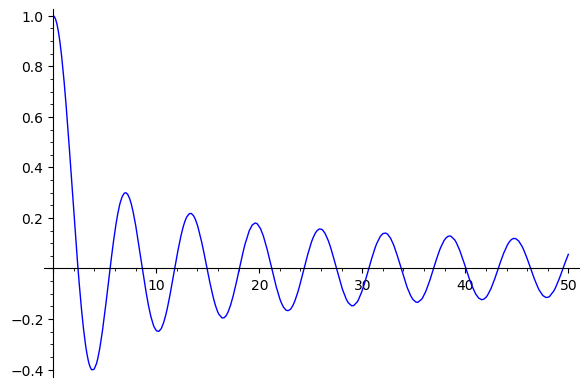

[2.40482555769577,
 5.52007811028631,
 8.65372791291101,
 11.7915344390143,
 14.9309177084878,
 18.0710639679109,
 21.2116366298793,
 24.3524715307493,
 27.4934791320403,
 30.6346064684320,
 33.7758202135736,
 36.9170983536640,
 40.0584257646282,
 43.1997917131767,
 46.3411883716618,
 49.4826098973978]

In [8]:
plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

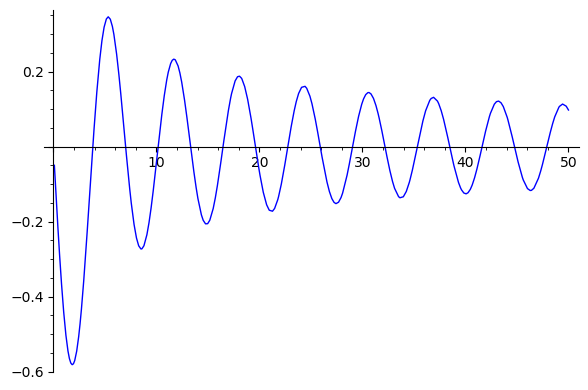

[3.83170597020751,
 7.01558666981562,
 10.1734681350627,
 13.3236919363142,
 16.4706300508776,
 19.6158585104682,
 22.7600843805928,
 25.9036720876184,
 29.0468285349169,
 32.1896799109744,
 35.3323075500839,
 38.4747662347716,
 41.6170942128145,
 44.7593189976528,
 47.9014608871855]

In [9]:
plot(bessel_J_d(m_val,x),0.1,50).show()
first_bessel_d_roots = find_root_recursive(bessel_J_d(m_val,x),0.1,50)
first_bessel_d_roots.sort()
first_bessel_d_roots

In [10]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("assume(mu_" + str(i) + " > 0)")
    exec("mu += [mu_" + str(i) +"]")

In [11]:
epsilon_z_z = []
for i in range(n_layers):
    exec("epsilon_z_z_" + str(i) + "= var('epsilon_z_z_" + str(i) + "')")
    exec("assume(epsilon_z_z_" + str(i) + ", 'real')")
    exec("assume(epsilon_z_z_" + str(i) + " > 0)")
    exec("epsilon_z_z += [epsilon_z_z_" + str(i) +"]")

In [12]:
epsilon_rh_ph = []
for i in range(n_layers):
    exec("epsilon_rh_ph" + str(i) + "= var('epsilon_rh_ph_" + str(i) + "')")
    exec("assume(epsilon_rh_ph_" + str(i) + ", 'real')")
    exec("assume(epsilon_rh_ph_" + str(i) + " > 0)")
    exec("epsilon_rh_ph += [epsilon_rh_ph_" + str(i) +"]")

In [13]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("assume(sigma_" + str(i) + " > 0)")
    exec("sigma += [sigma_" + str(i) +"]")

In [14]:
g = []
for i in range(n_layers):
    exec("g_" + str(i) + "= var('g_" + str(i) + "')")
    exec("assume(g_" + str(i) + ", 'real')")
    exec("assume(g_" + str(i) + " > 0)")
    exec("g += [g_" + str(i) +"]")

In [15]:
h = []
for i in range(n_layers):
    exec("h_" + str(i) + "= var('h_" + str(i) + "')")
    exec("assume(h_" + str(i) + ", 'real')")
    exec("assume(h_" + str(i) + " > 0)")
    exec("h += [h_" + str(i) +"]")

In [16]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [17]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [18]:
C_z = []
for i in range(n_layers):
    exec("C_z_" + str(i) + "= var('C_z_" + str(i) + "')")
    exec("assume(C_z_" + str(i) + ", 'real')")
    exec("C_z += [C_z_" + str(i) +"]")

In [19]:
D_z = []
for i in range(n_layers):
    exec("D_z_" + str(i) + "= var('D_z_" + str(i) + "')")
    exec("assume(D_z_" + str(i) + ", 'real')")
    exec("D_z += [D_z_" + str(i) +"]")

In [20]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

In [21]:
sigma_m = []
for i in range(2):
    exec("sigma_m" + str(i) + "= var('sigma_m" + str(i) + "')")
    exec("assume(sigma_m" + str(i) + ", 'real')")
    exec("assume(sigma_m" + str(i) + " > 0)")
    exec("sigma_m += [sigma_m" + str(i) +"]")

In [22]:
k_m = []
for i in range(2):
    exec("k_m" + str(i) + "= var('k_m" + str(i) + "')")
    exec("assume(k_m" + str(i) + ", 'real')")
    exec("k_m += [k_m" + str(i) +"]")

In [23]:
s_m = []
for i in range(2):
    exec("s_m" + str(i) + "= var('s_m" + str(i) + "')")
    exec("assume(s_m" + str(i) + ", 'real')")
    exec("s_m += [s_m" + str(i) +"]")

Let's we have the following field's depending on time

$$\vec{E} = \vec{E}\,e^{-i\,\omega\,t}$$

$$\vec{H} = \vec{H}\,e^{-i\,\omega\,t}$$

Starting from Maxwell equations

$$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$$

Let's we have $\vec D = \epsilon_{\alpha\,\beta} \vec{E}$

Let's our dielectric permittivity tenzor is diagonal, so

$$D_{z} = \epsilon_{z,z} {E}_z$$

$$D_{\rho} = \epsilon_{\rho, \rho} {E}_\rho$$

$$D_{\phi} = \epsilon_{\phi, \phi} {E}_\phi$$

$$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$$

$$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$$

in components

$$rot\,{H}_{z} = - \frac{i\,\omega}{c} \epsilon_{z\,z} {E}_{z} + \frac{4\pi}{c} \sigma {E}_{z}$$

$$rot\,{H}_{\rho} = - \frac{i\,\omega}{c} \epsilon_{\rho,\rho} {E}_{\rho} + \frac{4\pi}{c} \sigma {E}_{\rho}$$

$$rot\,{H}_{\phi} = - \frac{i\,\omega}{c} \epsilon_{\phi\,\phi} {E}_{\phi}+ \frac{4\pi}{c} \sigma {E}_{\phi}$$

or summarising

$$rot\,\vec{H} = - \frac{i\,\omega}{c} \vec{D} + \frac{4\pi}{c} \sigma \vec{E}$$


$$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$$

$$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E}\right)$$

$$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$$

$$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left(\epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}\right) \vec{E} $$

in components

$$rot\,rot\,{E}_{z} = \mu\,\frac{\omega^2}{c^2} \left(\epsilon_{z,z} + 4\pi\,i\frac{\sigma}{\omega}\right) {E}_{z} $$

$$rot\,rot\,{E}_{\rho} = \mu\,\frac{\omega^2}{c^2} \left(\epsilon_{\rho,\rho} + 4\pi\,i\frac{\sigma}{\omega}\right) {E}_{\rho} $$

$$rot\,rot\,{E}_{\phi} = \mu\,\frac{\omega^2}{c^2} \left(\epsilon_{\phi,\phi} + 4\pi\,i\frac{\sigma}{\omega}\right) {E}_{\phi} $$


$$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} rot\, \vec{D}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$$

In [24]:
# подставляя в исходное уравнение 
if True:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    epsilon_rho = var("epsilon_rho")
    epsilon_phi = var("epsilon_phi")
    epsilon_z   = var("epsilon_z")
    
    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    D = ES.vector_field(
        epsilon_rho * function('E_rho')(rho,phi,zz),
        epsilon_phi * function('E_phi')(rho,phi,zz),
        epsilon_z * function('E_z')(rho,phi,zz),
        name='D')
    
    from sage.manifolds.operators import curl, laplacian
    rot_D = curl(D)
    display(Math(latex(rot_D[1].expr())))
    display(Math(latex(rot_D[2].expr())))
    display(Math(latex(rot_D[3].expr())))
    
    
    print(latex(rot_D[1].expr()))
    print("")
    print(latex(rot_D[2].expr()))
    print("")
    print(latex(rot_D[3].expr()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-\frac{\epsilon_{\phi} {\rho} \frac{\partial}{\partial \mathit{zz}}E_{\phi}\left({\rho}, {\phi}, \mathit{zz}\right) - \epsilon_{z} \frac{\partial}{\partial {\phi}}E_{z}\left({\rho}, {\phi}, \mathit{zz}\right)}{{\rho}}

\epsilon_{\rho} \frac{\partial}{\partial \mathit{zz}}E_{\rho}\left({\rho}, {\phi}, \mathit{zz}\right) - \epsilon_{z} \frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{zz}\right)

\frac{\epsilon_{\phi} {\rho} \frac{\partial}{\partial {\rho}}E_{\phi}\left({\rho}, {\phi}, \mathit{zz}\right) + \epsilon_{\phi} E_{\phi}\left({\rho}, {\phi}, \mathit{zz}\right) - \epsilon_{\rho} \frac{\partial}{\partial {\phi}}E_{\rho}\left({\rho}, {\phi}, \mathit{zz}\right)}{{\rho}}


$$rot D_{\rho}=-\frac{\epsilon_{\phi,\phi} {\rho} \frac{\partial}{\partial \mathit{z}}E_{\phi}\left({\rho}, {\phi}, \mathit{z}\right) - \epsilon_{z,z} \frac{\partial}{\partial {\phi}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}}$$

$$rot D_{\phi}=\epsilon_{\rho_,\rho} \frac{\partial}{\partial \mathit{z}}E_{\rho}\left({\rho}, {\phi}, \mathit{z}\right) - \epsilon_{z_,z} \frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)$$

$$rot D_{z}=\frac{\epsilon_{\phi,\phi} {\rho} \frac{\partial}{\partial {\rho}}E_{\phi}\left({\rho}, {\phi}, \mathit{z}\right) + \epsilon_{\phi,\phi} E_{\phi}\left({\rho}, {\phi}, \mathit{z}\right) - \epsilon_{\rho,\rho} \frac{\partial}{\partial {\phi}}E_{\rho}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}}$$

% And here is the problem: how to substitute $rot D_{z}$ with $\vec{H}$ using Maxwell equation

И вот проблема: как заменить $rot D_{z}$ with $\vec{H}$, используя уравнение Максвелла

$$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$$

In case if

$$\epsilon_{\rho, \rho} = \epsilon_{\phi, \phi} = \epsilon_{\rho\phi, \rho\phi}$$


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\rho\phi,\rho\phi} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\rho\phi,\rho\phi} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\rho\phi,\rho\phi} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\rho\phi,\rho\phi} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\rho\phi,\rho\phi} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

Ищем решение в виде

$E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = E_{z}(\rho)\,E_{z}(\phi)\,E_{z}(z)$

$H_{z}\left({\rho}, {\phi}, \mathit{z}\right) = H_{z}(\rho)\,H_{z}(\phi)\,H_{z}(z)$


подставляя в исходное уравнение

In [25]:
# подставляя в исходное уравнение 
if True:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    H = ES.vector_field(
        function('H_rho')(rho,phi,zz),
        function('H_phi')(rho,phi,zz),
        function('H_z')(rho,phi,zz),
        name='H')
    
    from sage.manifolds.operators import curl, laplacian
    
    rot_rot_E = curl(curl(E))
    rot_rot_H = curl(curl(H))
    laplacian_E = laplacian(E)
    laplacian_H = laplacian(H)

    #print (rot_rot_E.display())
    #print (rot_rot_H.display())
    #print (laplacian_E.display())
    
    #eq_z = (rot_rot_E[3] - mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand()
    #display(Math(latex(eq_z.expr())))

    eq_zE = (laplacian_E[3] + mu[0] * epsilon_z_z[0] * omega^2 / c^2 * E[3]).expand().expr() == 0
    display(Math(latex(eq_zE)))

    eq_zH = (laplacian_H[3] + mu[0] * epsilon_rh_ph[0] * omega^2 / c^2 * H[3]).expand().expr() == 0
    display(Math(latex(eq_zH)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Using above equation for $rot\,rot\,{E}_{z}$ we can write for E mode: 

$$\frac{\epsilon_{z,z} \mu \omega^{2} E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = 0$$


$$\frac{\epsilon_{z,z} \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$$

assuming

$$E_{z}(\phi) = sin(m\,\varphi + \psi_{m})$$

and

$$E_{z}(z) = e^{i\,k\,z}$$

or

$$E_{z}(z) = cos\left(k\,z\right)$$
or
$$E_{z}(z) = sin\left(k\,z\right)$$

приходим к обыкновенному дифференциальному уравнению

we arrive to the ordinary differential equation


$$\frac{\epsilon_{z,z} \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{{\partial {\rho}}^{2}}E_{z}
- k^2\,E_{z} = 0$$

assuming

$$\kappa^2 = \frac{\mu \, \epsilon_{z,z} \, \omega^2}{c^2} - k^2$$

we will receive equation of Bessel type

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$


In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ we have in E mode

$$\frac{\left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$$

assuming for metals

$$E_{z}(z) = e^{i\,k_z'\,z}$$

with complex $k_z' = k_z + i\,s_z$

$$E_{z}(z) = e^{i\,k_z\,z} \, e^{-s_z\,z}$$

$$\frac{\left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} - \frac{m^{2}\,E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} - k_z'^2\,E_{z} = 0$$

we will receive

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \left(\frac{\mu \, \left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k_z'^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$

$$k_z'^2 = \left(k_z + i\,s_z \right)^2 = k_z^2 - s_z^2 + 2\,i\,k_z\,s_z$$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \left(\frac{\mu \, \left(\epsilon_{z,z} \right) \, \omega^2}{c^2} + \frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k_z^2 + s_z^2 - 2\,i\,k_z\,s_z - \frac{m^{2}}{{\rho}^{2}}\right) \, E_{z} = 0$

$- 2\,i\,k_z\,s_z +\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} = 0 $

$2\,k_z\,s_z = \frac{4\pi\,\mu\,\sigma\,\omega}{c^2}$

assuming now

$\kappa^2 = \frac{\mu \, \left(\epsilon_{z,z} \right) \, \omega^2}{c^2} - k_z^2 + s_z^2$

$s_z = \frac{2\pi\,\mu\,\sigma\,\omega}{k_z\,c^2}$

$\kappa^2 = \frac{\mu \, \left(\epsilon_{z,z} \right) \, \omega^2}{c^2} - k_z^2 + \left(\frac{2\pi\,\mu\,\sigma\,\omega}{k_z\,c^2}\right)^2$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

Dielectrics in E mode

assuming for dielectrics

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega'\,t}$

with complex $\omega' = \omega - i\,\alpha$

$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega\,t} \, e^{-\alpha\,t}$

In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega'}\,i$ we have

$\frac{\left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$



$\frac{\left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$

we will receive

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{z,z} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \, \omega'^2}{c^2} - k^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

$\omega'^2 
= \left(\omega - i\,\alpha \right)^2
= \omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha$

expanding

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{z,z} \right) \, \omega'^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\omega'}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\omega - i\,\alpha \right)}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\alpha^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(2\,\omega\,\alpha\right)}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\left(\omega\right)}{c^2}\,i = 0$

$2\pi\,\sigma = \epsilon_{z,z}\,\alpha$

$\alpha = \frac{2\,\pi\,\sigma}{\epsilon_{z,z}}$


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\omega^2\right)}{c^2}
-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\alpha^2\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\alpha \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{z,z}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}}\right)^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}} \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \left(\epsilon_{z,z} \right) \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}}\right)^2}{c^2}
+\frac{2\,\mu \,\epsilon_{z,z} \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{z,z}\omega^2}{c^2}
+\frac{\mu \,\epsilon_{z,z} \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{z,z}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}} \right)^2\right)
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$

assuming now

$
\kappa^2 = \frac{\mu \, \epsilon_{z,z}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{z,z}} \right)^2\right)
- k^2
$

we again have equation of Bessel type


$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$

In [26]:
# исходя из вида дифференциальных уравнений для metal
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_metal = []
eq_s_metal = []
for i in range(2):
    eq_kappa_metal += [omega^2 / c^2 - k_m[i]^2 + s_m[i]^2 == kappa^2]
    eq_s_metal     += [4 * pi * sigma_m[i] * omega / c^2 == 2 * k_m[i] * s_m[i]]

display(Math(latex(eq_kappa_metal)))
display(Math(latex(eq_s_metal)))

eq_kappa_metal_s = []
for i in range(2):
    eq_kappa_metal_s += [eq_kappa_metal[i].subs(solve(eq_s_metal[i],s_m[i]))]

display(Math(latex(eq_kappa_metal_s)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    if E_mode:
        eq_kappa += [mu[i] * epsilon_z_z[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
    else:
        eq_kappa += [mu[i] * epsilon_rh_ph[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
        

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

In [28]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_dielectric = []
for i in range(n_layers):
    if E_mode:
        eq_kappa_dielectric += [mu[i] * epsilon_z_z[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon_z_z[i])^2) - k[i]^2 == kappa^2]
    else:
        eq_kappa_dielectric += [mu[i] * epsilon_rh_ph[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon_rh_ph[i])^2) - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa_dielectric)))

<IPython.core.display.Math object>

In [29]:
if True:
    i_layer = 0
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    kk = var("kk")
    assume(kk, "real")
    
    assume(rho, "real")
    assume(phi, "real")
    assume(zz, "real")
    
    E1 = ES.vector_field(
        function('E1_rho')(rho,phi) * e^(I*kk*zz),
        function('E1_phi')(rho,phi) * e^(I*kk*zz),
        function('E1_z')  (rho,phi) * e^(I*kk*zz),
        name='E1')
    
    H1 = ES.vector_field(
        function('H1_rho')(rho,phi) * e^(I*kk*zz),
        function('H1_phi')(rho,phi) * e^(I*kk*zz),
        function('H1_z')  (rho,phi) * e^(I*kk*zz),
        name='H1')
    
    print("E1[1] =", E1[1].expr())
    print("E1[2] =", E1[2].expr())
    print("E1[3] =", E1[3].expr())
    print("")

    print("H1[1] =", H1[1].expr())
    print("H1[2] =", H1[2].expr())
    print("H1[3] =", H1[3].expr())
    print("")
    
    from sage.manifolds.operators import curl, laplacian
    rot_E1 = curl(E1)
    rot_H1 = curl(H1)
    
    print("rot_E1[1] =", rot_E1[1].expr())
    print("rot_E1[2] =", rot_E1[2].expr())
    print("rot_E1[3] =", rot_E1[3].expr())
    print("")
    
    print("rot_H1[1] =", rot_H1[1].expr())
    print("rot_H1[2] =", rot_H1[2].expr())
    print("rot_H1[3] =", rot_H1[3].expr())
    print("")
    
    eq_rot_E1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_E1 += [ (I * omega * mu[i_layer] / c * H1[j].expr() == rot_E1[j].expr()).expand() ]
    display(Math(latex(eq_rot_E1)))
    
    eq_rot_H1 = []
    #for j in ES.irange():
        #if j != 3:
        #    eq_rot_H1 += [ (- I * omega / c * epsilon[i_layer] * E1[j].expr() == rot_H1[j].expr()).expand() ]
        
    # eq_rot_H1 += [ (- I * omega / c * epsilon_rho_rho[i_layer] * E1[1].expr() == rot_H1[1].expr()).expand() ]
    # eq_rot_H1 += [ (- I * omega / c * epsilon_phi_phi[i_layer] * E1[2].expr() == rot_H1[2].expr()).expand() ]

    # epsilon_rho_rho = epsilon_phi_phi = epsilon_rh_ph
    eq_rot_H1 += [ (- I * omega / c * epsilon_rh_ph[i_layer] * E1[1].expr() == rot_H1[1].expr()).expand() ]
    eq_rot_H1 += [ (- I * omega / c * epsilon_rh_ph[i_layer] * E1[2].expr() == rot_H1[2].expr()).expand() ]
    
    display(Math(latex(eq_rot_H1)))

E1[1] = E1_rho(rho, phi)*e^(I*kk*zz)
E1[2] = E1_phi(rho, phi)*e^(I*kk*zz)
E1[3] = E1_z(rho, phi)*e^(I*kk*zz)

H1[1] = H1_rho(rho, phi)*e^(I*kk*zz)
H1[2] = H1_phi(rho, phi)*e^(I*kk*zz)
H1[3] = H1_z(rho, phi)*e^(I*kk*zz)

rot_E1[1] = -(I*kk*rho*E1_phi(rho, phi) - diff(E1_z(rho, phi), phi))*e^(I*kk*zz)/rho
rot_E1[2] = -(-I*kk*E1_rho(rho, phi) + diff(E1_z(rho, phi), rho))*e^(I*kk*zz)
rot_E1[3] = (rho*diff(E1_phi(rho, phi), rho) + E1_phi(rho, phi) - diff(E1_rho(rho, phi), phi))*e^(I*kk*zz)/rho

rot_H1[1] = -(I*kk*rho*H1_phi(rho, phi) - diff(H1_z(rho, phi), phi))*e^(I*kk*zz)/rho
rot_H1[2] = -(-I*kk*H1_rho(rho, phi) + diff(H1_z(rho, phi), rho))*e^(I*kk*zz)
rot_H1[3] = (rho*diff(H1_phi(rho, phi), rho) + H1_phi(rho, phi) - diff(H1_rho(rho, phi), phi))*e^(I*kk*zz)/rho



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
E_phi_sol_1 = solve(eq_rot_E1[0], function('E1_phi')(rho,phi))
display(Math(latex(E_phi_sol_1)))
E_phi_sol_2 = solve(eq_rot_H1[1], function('E1_phi')(rho,phi))
display(Math(latex(E_phi_sol_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [31]:
H_rho_sol_1 = solve(eq_rot_E1[0], function('H1_rho')(rho,phi))
display(Math(latex(H_rho_sol_1)))
H_rho_sol_2 = solve(eq_rot_H1[1], function('H1_rho')(rho,phi))
display(Math(latex(H_rho_sol_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
E_phi_solution = solve(E_phi_sol_1[0].subs(H_rho_sol_2),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))
E_phi_solution = solve(E_phi_sol_2[0].subs(H_rho_sol_1),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [33]:
H_rho_solution = solve(H_rho_sol_1[0].subs(E_phi_sol_2),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))
H_rho_solution = solve(H_rho_sol_2[0].subs(E_phi_sol_1),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
E_rho_sol_1 = solve(eq_rot_E1[1], function('E1_rho')(rho,phi))
display(Math(latex(E_rho_sol_1)))
E_rho_sol_2 = solve(eq_rot_H1[0], function('E1_rho')(rho,phi))
display(Math(latex(E_rho_sol_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [35]:
H_phi_sol_1 = solve(eq_rot_E1[1], function('H1_phi')(rho,phi))
display(Math(latex(H_phi_sol_1)))
H_phi_sol_2 = solve(eq_rot_H1[0], function('H1_phi')(rho,phi))
display(Math(latex(H_phi_sol_2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [36]:
E_rho_solution = solve(E_rho_sol_1[0].subs(H_phi_sol_2),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))
E_rho_solution = solve(E_rho_sol_2[0].subs(H_phi_sol_1),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
H_phi_solution = solve(H_phi_sol_1[0].subs(E_rho_sol_2),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))
H_phi_solution = solve(H_phi_sol_2[0].subs(E_rho_sol_1),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
H_z = []
H_z_a = [] # sin(k[i]*z) = imag_part()
H_z_b = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        H_z   += [lambda rh,ph,z, i=i : 0]
        H_z_a += [lambda rh,ph,z, i=i : 0]
        H_z_b += [lambda rh,ph,z, i=i : 0]
        pass
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]
        H_z_a += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        H_z_b += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(B_z[i]*e^(I*k[i]*z)) * cos(m*ph)]

In [39]:
E_z = [] 
E_z_c = [] # sin(k[i]*z) = imag_part()
E_z_d = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        E_z   += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*sin(k[i]*z) + D_z[i]*cos(k[i]*z)) * cos(m*ph)]
        E_z_c += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        E_z_d += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]
        E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: 0]
        pass

In [40]:
var("B")*(e^(I * kk * z)).real_part()

B*cos(kk*z)

In [41]:
# + pi/2
var("B")*(I*e^(I * kk * z)).real_part()

-B*sin(kk*z)

In [42]:
# - pi/2
var("B")*(-I*e^(I * kk * z)).real_part()

B*sin(kk*z)

In [43]:
var("A")*(e^(I * kk * z)).imag_part()

A*sin(kk*z)

In [44]:
# + pi/2
var("A")*(I*e^(I * kk * z)).imag_part()

A*cos(kk*z)

In [45]:
# - pi/2
var("A")*(-I*e^(I * kk * z)).imag_part()

-A*cos(kk*z)

In [46]:
def expand_re_im_operands(s, expand_real_operands, expand_imag_operands):
    from sage.symbolic.operators import add_vararg, mul_vararg
    s_factor = s.factor()
    #print("s_factor", s_factor)
    s_factor_operator = s_factor.operator()
    #print("s_factor.operator()", s_factor_operator)
    if mul_vararg != s_factor_operator:
        print("mul_vararg != s_factor.operator()", s_factor_operator)
        print("re_im(v_expanded)", v_expanded)
        raise ("mul_vararg != s_factor.operator()", s_factor_operator)

    current_s_has_image_part = False
    current_s_has_exp_of_image_part = False

    s_factor_real_operands = ()
    s_factor_imag_operands = ()
    s_factor_complex_exp_operands = ()
    for m in s_factor.operands():
        #print("operand", m, m.operator())
        if bessel_J == m.operator():
            #print("bessel_J == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (m,)
        elif 'bessel_j' == str(m.operator()):
            #print("bessel_j == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (bessel_J(*m.operands()),)
        elif exp == m.operator():
            #print("exp == m.operator() m.operands():",m, m.operands())
            current_exp_has_image_part = False
            for m_operand in m.operands():
                #print("m_operand", m_operand)
                m_operand_imag_part = m_operand.imag_part()
                #print("m_operand_imag_part", m_operand_imag_part)
                #print("type(m_operand_imag_part)", type(m_operand_imag_part))
                #print("type(0)", type(0))
                m_operand_imag_part_is_0 = 0 is m_operand_imag_part
                #print("m_operand_imag_part_is_0", m_operand_imag_part_is_0)
                m_operand_imag_part_eq_0 = 0 == m_operand_imag_part
                bool_m_operand_imag_part_eq_0 = bool(m_operand_imag_part_eq_0)
                #print("m_operand_imag_part_eq_0", m_operand_imag_part_eq_0)
                #print("type(m_operand_imag_part_eq_0)", type(m_operand_imag_part_eq_0))
                if False == bool_m_operand_imag_part_eq_0:
                    #print("current_s_has_exp_of_image_part")
                    current_s_has_exp_of_image_part = True
                    current_exp_has_image_part = True
            if True == current_exp_has_image_part:
                #print("True == current_exp_has_image_part")
                s_factor_complex_exp_operands += (m,)
            else:
                #print("not True == current_exp_has_image_part")
                s_factor_real_operands += (m,)
        else:
            #print("not bessel, not exp", m)
            m_imag_part = m.imag_part()
            #print("m_imag_part", m_imag_part)
            #print("type(m_imag_part)", type(m_imag_part))
            #print("type(0)", type(0))
            m_imag_part_is_0 = 0 is m_imag_part
            #print("m_imag_part_is_0", m_imag_part_is_0)
            m_imag_part_eq_0 = 0 == m_imag_part
            bool_m_imag_part_eq_0 = bool(m_imag_part_eq_0)
            #print("m_imag_part_eq_0", m_imag_part_eq_0)
            #print("bool(m_imag_part_eq_0)", bool(m_imag_part_eq_0))
            #print("type(m_imag_part_eq_0)", type(m_imag_part_eq_0))
            if False == bool_m_imag_part_eq_0:
                #print("current_s_has_image_part = True")
                current_s_has_image_part = True
                s_factor_imag_operands += (I,)
                s_factor_real_operands += (m/I,)
            else:
                #print("not current_s_has_image_part = True")
                s_factor_real_operands += (m,)

    if True == current_s_has_exp_of_image_part:
        #print("current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul_complex_exp = mul_vararg(*(s_factor_imag_operands + s_factor_complex_exp_operands))
            re_out = mul_vararg(*((imag_part_mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((imag_part_mul_complex_exp.imag_part(),) + s_factor_real_operands))
        else:
            #print("not True == current_s_has_image_part")
            mul_complex_exp = mul_vararg(*(s_factor_complex_exp_operands))
            re_out = mul_vararg(*((mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((mul_complex_exp.imag_part(),) + s_factor_real_operands))
    else:
        #print("not current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul = mul_vararg(*(s_factor_imag_operands))
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            #print("imag_part_mul", imag_part_mul)
            #print("real_part_mul", real_part_mul)
            re_out = 0
            im_out = (imag_part_mul/I) * real_part_mul
        else:
            #print("not True == current_s_has_image_part")
            im_out = 0
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            re_out = real_part_mul
    #print("re_out", re_out)
    #print("im_out", im_out)
    expand_real_operands += (re_out,)
    expand_imag_operands += (im_out,)
    
    return (expand_real_operands, expand_imag_operands)


def re_im(v_expanded):
    from sage.symbolic.operators import add_vararg, mul_vararg
    expand_real_operands = ()
    expand_imag_operands = ()
    v_expanded_operator = v_expanded.operator()
    if None == v_expanded_operator:
        return (v_expanded.real_part(), v_expanded.imag_part())
    elif add_vararg == v_expanded_operator:
        for s in v_expanded.operands():
            (expand_real_operands, expand_imag_operands) = expand_re_im_operands(s, expand_real_operands, expand_imag_operands)
    elif mul_vararg == v_expanded_operator:
        (expand_real_operands, expand_imag_operands) = expand_re_im_operands(v_expanded, expand_real_operands, expand_imag_operands)
    else:
        print("add_vararg, mul_vararg and None != v_expanded.operator()", v_expanded.operator())
        print("re_im(v_expanded)", v_expanded)
        return (v_expanded.real_part(), v_expanded.imag_part())

    if 0 == len(expand_real_operands) and  0 == len(expand_imag_operands):
        return (0, 0)
    if 0 == len(expand_real_operands) and  0 != len(expand_imag_operands):
        return (0, (add_vararg(*expand_imag_operands)).factor())
    if 0 != len(expand_real_operands) and  0 == len(expand_imag_operands):
        return ((add_vararg(*expand_real_operands)).factor(), 0)
    return ((add_vararg(*expand_real_operands)), (add_vararg(*expand_imag_operands)))

def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v
    #return v.real_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return re

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0
    #return v.imag_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return im

In [47]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [48]:
def make_field_formula(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        s = s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]') \
            .replace('bessel_j', 'bessel_J')

        s = s.replace(str(epsilon_z_z[i_layer]), 'epsilon_z_z[i]') \
            .replace(str(epsilon_z_z[i]), 'epsilon_z_z[i]')

        s = s.replace(str(epsilon_rh_ph[i_layer]), 'epsilon_rh_ph[i]') \
            .replace(str(epsilon_rh_ph[i]), 'epsilon_rh_ph[i]')

        return s

    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print("s =", s)
    
    s_im = s \
        .replace('H1_z(rh, ph)', 'H_z_a[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_c[i](rh,ph,z)')
    s_re = s \
        .replace('H1_z(rh, ph)', 'H_z_b[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_d[i](rh,ph,z)')
    s_all = s \
        .replace('H1_z(rh, ph)', 'H_z[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z[i](rh,ph,z)')
    #print("s_im =", s_im)
    #print("s_re =", s_re)
    #print("s_all =", s_all)
    #print(s)
    #print(i, i_layer)
    f_Im = []
    f_Re = []
    f_im = []
    f_re = []
    f = []
    exec("f_im += [" + preparse("(" + s_im + ").imag_part()") + "]")
    exec("f_re += [" + preparse("(" + s_re + ").real_part()") + "]")
    exec("f_Im += [" + Preparse("Im(" + s_im + ")") + "]")
    exec("f_Re += [" + Preparse("Re(" + s_re + ")") + "]")
    exec("f += [" + Preparse(s_all) + "]")
    #print(f)
    s1 = str_replacing(str(f[0]), i, i_layer)
    s2 = str_replacing(str((f_im[0]+f_re[0]).factor()), i, i_layer)
    s3 = str_replacing(str((f_Im[0]+f_Re[0]).factor()), i, i_layer)
    return (s1, s2, s3)

In [49]:
E_rh = []
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_rho_solution, i, i_layer)
    print("")
    print("E_rh += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    exec(preparse("E_rh += [lambda rh,ph,z, i=i: " + str(s2) + "]"))
    print("")
    print("E_rh += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    print("bessel_J_d(m,kappa*rh) =", bessel_J_d(m,kappa*rh))


E_rh += [lambda rh,ph,z, i=i:  1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c^2*k[i]*kappa*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i]) ]


E_rh += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*kappa*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2) ]

bessel_J_d(m,kappa*rh) = -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

E_rh += [lambda rh,ph,z, i=i:  1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c^2*k[i]*kappa*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i]) ]


E_rh += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*kappa*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(epsilon_rh_

In [50]:
E_ph = []
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_phi_solution, i, i_layer)
    print("E_ph += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    exec(preparse("E_ph += [lambda rh,ph,z, i=i: " + str(s2) + "]"))
    print("")
    print("E_ph += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

E_ph += [lambda rh,ph,z, i=i:  I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c^2*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/((c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i])*rh) ]


E_ph += [lambda rh,ph,z, i=i:  -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*rh) ]

E_ph += [lambda rh,ph,z, i=i:  I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c^2*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/((c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i])*rh) ]


E_ph += [lambda rh,ph,z, i=i:  -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*rh) ]



In [51]:
H_rh = []
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_rho_solution, i, i_layer)
    print("H_rh += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    exec(preparse("H_rh += [lambda rh,ph,z, i=i: " + str(s2) + "]"))
    print("")
    print("H_rh += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

H_rh += [lambda rh,ph,z, i=i:  -I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c*epsilon_rh_ph[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/((c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i])*rh) ]


H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*c*rh) ]

H_rh += [lambda rh,ph,z, i=i:  -I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c*epsilon_rh_ph[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/((c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i])*rh) ]


H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*c*rh) ]



In [52]:
H_ph = []
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_phi_solution, i, i_layer)
    print("H_ph += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    exec(preparse("H_ph += [lambda rh,ph,z, i=i: " + str(s2) + "]"))
    print("")
    print("H_ph += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

H_ph += [lambda rh,ph,z, i=i:  1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c*epsilon_rh_ph[i]*kappa*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i]) ]


H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*kappa*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*c) ]

H_ph += [lambda rh,ph,z, i=i:  1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*c*epsilon_rh_ph[i]*kappa*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c^2*k[i]^2 - (c^2*k[i]^2 + c^2*kappa^2)*epsilon_rh_ph[i]/epsilon_z_z[i]) ]


H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*kappa*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsi

In [53]:
r = var('r') #rho
p = var('p') #phi
assume(r, "real")
assume(r > 0)
assume(p, "real")

In [54]:
E_rh = []
for i in range(n_layers):
    if E_mode:
        #E_rh += [lambda r,p,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
        E_rh += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*kappa*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2) ]
    else:
        E_rh += [lambda r,p,z, i=i : -I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [55]:
E_ph = []
for i in range(n_layers):
    if E_mode:
        # E_ph += [lambda r,p,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
        E_ph += [lambda rh,ph,z, i=i:  -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon_z_z[i]*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*rh) ]
    else:
        E_ph += [lambda r,p,z, i=i : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*p)]


In [56]:
E_z = []
for i in range(n_layers):
    if E_mode:
        E_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*p)]
    else:
        E_z += [lambda r,p,z, i=i: 0]

In [57]:
H_rh = []
for i in range(n_layers):
    if E_mode:
        # H_rh += [lambda r,p,z, i=i : I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
        H_rh += [lambda rh,ph,z, i=i:  I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*c*rh) ]
    else:
        H_rh += [lambda r,p,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z)) * cos(m*p)]


In [58]:
H_ph = []
for i in range(n_layers):
    if E_mode:
        #H_ph += [lambda r,p,z, i=i : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
        H_ph += [lambda rh,ph,z, i=i:  -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon_rh_ph[i]*epsilon_z_z[i]*kappa*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/((epsilon_rh_ph[i]*k[i]^2 - epsilon_z_z[i]*k[i]^2 + epsilon_rh_ph[i]*kappa^2)*c) ]
    else:
        H_ph += [lambda r,p,z, i=i: m*k[i]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k[i]*z) - A_z[i]*cos(k[i]*z)) * sin(m*p)]
        

In [59]:
H_z = []
for i in range(n_layers):
    if E_mode:
        H_z += [lambda r,p,z, i=i : 0]
    else:
        H_z += [lambda r,p,z, i=i: bessel_J  (m,kappa*r)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*p)]

In [60]:
# fields in the metal

In [61]:
Em_rh = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #E_rh += [lambda rh,ph,z, i=i: k[i]/kappa * bessel_J_d(m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * cos(m*ph)]
        Em_rh += [lambda r,p,z, j=j: -1/2*(C_z[i]*cos(k_m[j]*z) - D_z[i]*sin(k_m[j]*z))*k_m[j]*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa]
    else:
        #E_rh += [lambda rh,ph,z, i=i : I*m*omega*mu[i]/(c*kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*cos(k[i]*z) - A_z[i]*sin(k[i]*z)) * sin(m*ph)]
        Em_rh += [lambda r,p,z, j=j : -I*(B_z[i]*cos(k_m[j]*z) + A_z[i]*sin(k_m[j]*z))*m*mu[i]*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]

In [62]:
Em_ph = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #E_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*sin(k[i]*z) + C_z[i]*cos(k[i]*z)) * sin(m*ph)]
        Em_ph += [lambda r,p,z, j=j: -(C_z[i]*cos(k_m[i]*z) - D_z[i]*sin(k_m[i]*z))*k_m[i]*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)]
    else:
        # E_ph += [lambda rh,ph,z, i=i : I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*rh)*( B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # 1/2*I*(B_z[i]*cos(k[i]*z) + A_z[i]*sin(k[i]*z))*mu[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        Em_ph += [lambda r,p,z, j=j : - I*omega*mu[i]/(c*kappa) * bessel_J_d(m,kappa*r)*( B_z[i]*cos(k_m[i]*z) + A_z[i]*sin(k_m[i]*z)) * cos(m*p)]


In [63]:
Em_z = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        Em_z += [lambda r,p,z, j=j: bessel_J(m,kappa*r)*( D_z[i]*cos(k_m[i]*z) + C_z[i]*sin(k_m[i]*z)) * cos(m*p)]
    else:
        Em_z += [lambda r,p,z, j=j: 0]

In [64]:
Hm_rh = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #H_rh += [lambda rh,ph,z, i=i : I*m*omega*epsilon[i]/(kappa^2*c*rh) * bessel_J  (m,kappa*rh)*(-D_z[i]*cos(k[i]*z) - C_z[i]*sin(k[i]*z)) * sin(m*ph)]
        Hm_rh += [lambda r,p,z, j=j : I*(D_z[i]*cos(k_m[j]*z) + C_z[i]*sin(k_m[j]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)]
    else:
        Hm_rh += [lambda r,p,z, j=j: k_m[j]/kappa * bessel_J_d(m,kappa*r)*(A_z[i]*cos(k_m[j]*z) - B_z[i]*sin(k_m[j]*z)) * cos(m*p)]
        # -1/2*(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [65]:
Hm_ph = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        #H_ph += [lambda rh,ph,z, i=i : I*omega*epsilon[i]/(kappa*c) * bessel_J_d(m,kappa*rh)*( D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z)) * cos(m*ph)]
        # -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)
        # -1/2*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))
        Hm_ph += [lambda r,p,z, j=j : -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)]
    else:
        #H_ph += [lambda rh,ph,z, i=i: m*k[i]/(kappa^2*rh) * bessel_J  (m,kappa*rh)*(-B_z[i]*sin(k[i]*z) + A_z[i]*cos(k[i]*z)) * sin(m*ph)]
        # -(A_z[i]*cos(k[i]*z) - B_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)
        Hm_ph += [lambda r,p,z, j=j: m*k_m[j]/(kappa^2*r) * bessel_J  (m,kappa*r)*(B_z[i]*sin(k_m[j]*z) - A_z[i]*cos(k_m[j]*z)) * sin(m*p)]
        

In [66]:
Hm_z = []
for j in range(2):
    if 0 == j:
        i = 0
    else:
        i = n_layers - 1
    if E_mode:
        Hm_z += [lambda r,p,z, j=j : 0]
    else:
        Hm_z += [lambda r,p,z, j=j: bessel_J(m,kappa*r)*(A_z[i]*sin(k_m[j]*z) + B_z[i]*cos(k_m[i]*z)) * cos(m*p)]

In [67]:
E_rh[0](r,p,z)

-1/2*(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)

In [68]:
E_rh[0](r,p,z).subs(epsilon_rh_ph[0] == epsilon_z_z[0])

-1/2*(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa

In [69]:
# cyl_two_level_dielectric.ipynb E_rh[0](r,p,z)
# -1/2*(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/kappa

In [70]:
if 1 < n_layers:
    print(E_rh[1](rh,ph,z))

-1/2*(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)


In [71]:
if 1 < n_layers:
    print(E_rh[1](rh,ph,z).subs(epsilon_rh_ph[1] == epsilon_z_z[1]))

-1/2*(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa


In [72]:
# cyl_two_level_dielectric.ipynb E_rh[1](rh,ph,z)
# -1/2*(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa

In [73]:
E_ph[0](r,p,z)

-(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*epsilon_z_z_0*k_0*m*bessel_J(m, kappa*r)*sin(m*p)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*r)

In [74]:
E_ph[0](r,p,z).subs(epsilon_rh_ph[0] == epsilon_z_z[0])

-(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)

In [75]:
# cyl_two_level_dielectric.ipynb E_ph[0](r,p,z)
#-(C_z_0*cos(k_0*z) - D_z_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*r)*sin(m*p)/(kappa^2*r)

In [76]:
if 1 < n_layers:
    print(E_ph[1](rh,ph,z))

-(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*epsilon_z_z_1*k_1*m*bessel_J(m, kappa*rho)*sin(m*varphi)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*rho)


In [77]:
if 1 < n_layers:
    print(E_ph[1](rh,ph,z).subs(epsilon_rh_ph[1] == epsilon_z_z[1]))

-(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)


In [78]:
#-(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)

In [79]:
E_z[0](rh,ph,z)

(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*cos(m*varphi)

In [80]:
if 1 < n_layers:
    print(E_z[1](rh,ph,z))

(D_z_1*cos(k_1*z) + C_z_1*sin(k_1*z))*bessel_J(m, kappa*rho)*cos(m*varphi)


In [81]:
H_rh[0](r,p,z)

(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_rh_ph_0*epsilon_z_z_0*m*omega*bessel_J(m, kappa*r)*sin(m*p)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c*r)

In [82]:
H_rh[0](r,p,z).subs(epsilon_rh_ph[0] == epsilon_z_z[0])

(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_z_z_0*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [83]:
#(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_0*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [84]:
H_ph[0](r,p,z)

-1/2*(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c)

In [85]:
H_ph[0](r,p,z).subs(epsilon_rh_ph[0] == epsilon_z_z[0])

-1/2*(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_z_z_0*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)

In [86]:
#-1/2*(I*D_z_0*cos(k_0*z) + I*C_z_0*sin(k_0*z))*epsilon_0*omega*(bessel_J(m + 1, kappa*r) - bessel_J(m - 1, kappa*r))*cos(m*p)/(c*kappa)

In [87]:
make_test_with_maxwell_equations = False

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \left( \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

In [88]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl, laplacian
    rot_E0 = curl(E0)
    print("rot_E0 =")#, rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_E0[j].expr())))
        #display(Math(latex(mu[i_layer] * I * omega / c * H0[j].expr())))
        print("")
    
    rot_H0 = curl(H0)
    print("rot_H0 =")#, rot_H0.display())
    for j in ES.irange():
        display(Math(latex(rot_H0[j].expr())))
        print("")
    
    rot_rot_E0 = curl(rot_E0)
    print("rot_rot_E0 =")#, rot_rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_rot_E0[j].expr())))
        print("")
    
    rot_rot_H0 = curl(rot_H0)
    print("rot_rot_H0 =")#, rot_rot_H0.display())
    for j in ES.irange():
        display(Math(latex(rot_rot_H0[j].expr())))
        print("")

    laplacian_E0 = laplacian(E0)
    print("laplacian_E0 =")#, laplacian_E0.display())
    for j in ES.irange():
        display(Math(latex(laplacian_E0[j].expr())))
        print("")

    
    #mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    #mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    #print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    #print("")
    #print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    #print("")
    
    #eq_z = (laplacian_E0[3] + mu_epsilon_omega2_c2_E0[3]).expand().expr() == 0
    #print("eq_z")
    #display(Math(latex(eq_z)))
    #print("eq_z/E_z")
    #display(Math(latex((eq_z/E_z[i_layer](rho,phi,zz)).full_simplify().expand())))
    
    eq_rot_E = []
    eq_rot_H = []
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in [1]: # rho
        # eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon_rh_ph[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon_rh_ph[i_layer] * (omega^2 / c^2) * E0
        #mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0

        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    for j in [2]: # phi
        # eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon_rh_ph[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon_rh_ph[i_layer] * (omega^2 / c^2) * E0
        #mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    for j in [3]: # z
        # eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon_z_z[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon_z_z[i_layer] * (omega^2 / c^2) * E0
        #mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            #exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H)

In [89]:
if make_test_with_maxwell_equations:
    (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

In [90]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_E[j])))
        print("")
    if not E_mode:
        plot(eq_rot_E[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()        

In [91]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_H[j])))
        print("")
    if E_mode:
        plot(eq_rot_H[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1, epsilon_rh_ph_0 = 2, epsilon_z_z_0 = 3), rh).show()

In [92]:
if make_test_with_maxwell_equations:
    for j in range(3):
        print(eq_rot_rot_E[j])
        print("")

In [93]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

In [94]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

In [95]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

In [96]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [97]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

In [98]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

In [99]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

In [100]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [101]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

In [102]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

In [103]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

In [104]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [105]:
if make_test_with_maxwell_equations:
    display(Math(latex(eq_rot_rot_H)))

In [106]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

In [107]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

In [108]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

In [109]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

In [110]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

In [111]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [112]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

In [113]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [114]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

In [115]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

In [116]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

In [117]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [118]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda r,p,z, i=i: " + str(diff(E_z[i](r,p,z),p)/r - E_ph[i](r,p,z).diff(z)) +"]"))

In [119]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda r,p,z, i=i: " + str(E_rh[i](r,p,z).diff(z)-diff(E_z[i](r,p,z),rh)) +"]"))

In [120]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda r,p,z, i=i: " + str(((r*E_ph[i](r,p,z)).diff(r) - E_rh[i](r,p,z).diff(p))/r) +"]"))

In [121]:
rotE_ph[0](rh,ph,z)

1/2*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)

In [122]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [123]:
rotE_rh[0](rh,ph,z)

-(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*epsilon_z_z_0*k_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*rho) - (D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*sin(m*varphi)/rho

In [124]:
rotE_z[0](rh,ph,z)

0

In [125]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda r,p,z, i=i : rotE_rh[i](r,p,z)*c/(I*omega *mu[i])]

In [126]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda r,p,z, i=i : rotE_ph[i](r,p,z)*c/(I*omega *mu[i])]

In [127]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda r,p,z, i=i : rotE_z[i](r,p,z)*c/(I*omega *mu[i])]

In [128]:
H_rh_[0](rh,ph,z).factor()

I*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*c*epsilon_rh_ph_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*mu_0*omega*rho)

In [129]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [130]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [131]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*c*epsilon_z_z_0*k_0*kappa*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*mu_0*omega)

In [132]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [133]:
H_z_[0](rh,ph,z)

0

In [134]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [135]:
display(Math(latex(H_rh[1](rh,ph,z))))

<IPython.core.display.Math object>

In [136]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,sum(h)) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,sum(h)) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))

if E_mode:
    var_begin = C_z[0]
    var_end   = C_z[n_layers - 1]
else:
    var_begin = B_z[0]
    var_end   = B_z[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin + boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [137]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda r, p, z, i=i : " + str(E_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [138]:
E_phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda r, p, z, i=i : " + str(E_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [139]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda r, p, z, i=i : " + str(E_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [140]:
H_rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda r, p, z, i=i : " + str(H_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [141]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda r, p, z, i=i : " + str(H_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [142]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda r, p, z, i=i : " + str(H_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [143]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [144]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [145]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

In [146]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [147]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [148]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

In [149]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [150]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [151]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

In [152]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [153]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [154]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

In [155]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [156]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [157]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

In [158]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [159]:
all_vars = []
if E_mode:
    for i in range(n_layers):
        all_vars += [C_z[i], D_z[i]]
else:
    for i in range(n_layers):
        all_vars += [A_z[i], B_z[i]]
all_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [160]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    #print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [161]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [162]:
bch = []
bc =  []
bc_ =  []
for i  in range (n_layers-1):
    boundary_h = sum([h[j] for j in range(i+1)])
    print("i =", i, "boundary_h =", boundary_h)
    if E_mode:
        bc += [(E_rho[i](rh,ph, boundary_h) == E_rho[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
        bc_ += [(E_phi[i](rh,ph, boundary_h) == E_phi[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
        bc += [(epsilon_z_z[i] * E_z[i](rh,ph,boundary_h) == epsilon_z_z[i+1]*E_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,boundary_h) == H_phi [i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, boundary_h) == H_rho[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, boundary_h) == H_phi[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph, boundary_h) == mu[i+1]*H_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph, boundary_h) == E_phi [i+1](rh,ph, boundary_h)).subs(boundary_conductor)]

i = 0 boundary_h = h_0


In [163]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [164]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [165]:
all_eqs = bc \
        + boundary_conductor

display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

In [166]:
boundary_conductor

[C_z_0 == 0, C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)]

In [167]:
M = GenerateMatrix(all_eqs, all_vars)

In [168]:
all_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [169]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [170]:
M.nrows(), M.ncols(), len(all_vars)

(4, 4, 4)

In [171]:
#M.rank()

In [172]:
#reduced_M = reduceDependedRows(M)
reduced_M = M

In [173]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [174]:
#reduced_M.pivots()

In [175]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    #print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [176]:
#reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)

In [177]:
#reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

In [178]:
#reduced_vars

In [179]:
#display(Math(latex(reduced_reduced_M)))

In [180]:
#reduced_reduced_M

In [181]:
#type(reduced_reduced_M)

In [182]:
#reduced_reduced_M.det()

In [183]:
#exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [184]:
#display(Math(latex(reduced_reduced_M_det)))

In [185]:
#reduced_reduced_M_det

In [186]:
#M_det  = reduced_reduced_M_det
M_det = M.det()

In [187]:
M_det

1/2*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - 1/2*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) + 1/2*epsilon_z_z_0*epsilon_z_z_1*k_1*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_z_z_0*epsilon_z_z_1*k_1*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_z_z_0*epsilon_z_z_1*k_1*kappa*bessel_J(m + 1, kappa*rho)*bes

In [188]:
# display(Math(latex(M_det)))

In [189]:
M_det_num = M_det.numerator()

In [190]:
M_det_num

2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + 2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_

In [191]:
M_det_num.variables()

(epsilon_rh_ph_0,
 epsilon_rh_ph_1,
 epsilon_z_z_0,
 epsilon_z_z_1,
 h_0,
 h_1,
 k_0,
 k_1,
 kappa,
 m,
 rho,
 varphi)

In [192]:
M_det.full_simplify().numerator()

-(epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) - epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) - epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) + epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) - epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_1*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*epsilon_z_z_0*epsilon_z_z_1*k_0^2*k_1*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*sin(h_1*k_1) - epsilon_z_z_0^2*epsilon_z_z_1*k_0^2*k_1*kappa*bessel_J(m + 1, kappa*

In [193]:
M_det_num_expand = M_det_num.expand()

In [194]:
M_det_num_expand.operator()

<function add_vararg at 0x7f7a21f625e0>

In [195]:
for operand in M_det_num_expand.operands():
    print (operand)
    print ("")

2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*

In [196]:
M_det_num

2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + 2*epsilon_z_z_0*epsilon_z_z_1^2*k_0*k_1^2*kappa*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa^3*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_

In [197]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

2*(epsilon_rh_ph_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) - epsilon_z_z_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*k_0*kappa^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) + epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_z_z_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*kappa^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1))*epsilon_z_z_0*epsilon_z_z_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*bessel

In [198]:
M_det_num_factor.operator()

<function mul_vararg at 0x7f7a21f62700>

In [199]:
M_det_num_factor.operands()

[epsilon_rh_ph_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) - epsilon_z_z_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*k_0*kappa^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) + epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_z_z_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*kappa^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),
 epsilon_z_z_0,
 epsilon_z_z_1,
 kappa,
 bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho),
 b

In [200]:
M_det_num_factor_operands = ()
for operand in M_det_num_factor.operands():
    print (operand)
    print (operand.variables())
    if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
    print ("")
    
M_det_num_factor_operands

epsilon_rh_ph_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) - epsilon_z_z_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*k_0*kappa^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) + epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_z_z_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*kappa^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1)
(epsilon_rh_ph_0, epsilon_rh_ph_1, epsilon_z_z_0, epsilon_z_z_1, h_0, h_1, k_0, k_1, kappa)

epsilon_z

(epsilon_rh_ph_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) - epsilon_z_z_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*k_0*kappa^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) + epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_z_z_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*kappa^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),
 epsilon_z_z_0,
 epsilon_z_z_1,
 kappa,
 2)

In [201]:
M_det_num_factor_operands

(epsilon_rh_ph_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) - epsilon_z_z_1*k_0*k_1^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_1*k_0*kappa^2*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) + epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_rh_ph_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_z_z_0*k_0^2*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_rh_ph_0*k_1*kappa^2*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) - epsilon_z_z_1*k_0*k_1^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_rh_ph_1*k_0*kappa^2*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),
 epsilon_z_z_0,
 epsilon_z_z_1,
 kappa,
 2)

In [202]:
from sage.symbolic.operators import add_vararg, mul_vararg
M_det_num = mul_vararg(*M_det_num_factor_operands)

In [203]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [204]:
M_det_num.variables()

(epsilon_rh_ph_0,
 epsilon_rh_ph_1,
 epsilon_z_z_0,
 epsilon_z_z_1,
 h_0,
 h_1,
 k_0,
 k_1,
 kappa)

In [205]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h[i]*k[i]))).full_simplify().expand()

In [206]:
M_det_num

2*epsilon_rh_ph_0*epsilon_z_z_0*epsilon_z_z_1*k_0*kappa*cos(h_0*k_0)/sin(h_0*k_0) - 2*epsilon_z_z_0^2*epsilon_z_z_1*k_0*kappa*cos(h_0*k_0)/sin(h_0*k_0) + 2*epsilon_rh_ph_0*epsilon_z_z_0*epsilon_z_z_1*kappa^3*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*k_1*kappa*cos(h_1*k_1)/sin(h_1*k_1) - 2*epsilon_z_z_0*epsilon_z_z_1^2*k_1*kappa*cos(h_1*k_1)/sin(h_1*k_1) + 2*epsilon_rh_ph_1*epsilon_z_z_0*epsilon_z_z_1*kappa^3*cos(h_1*k_1)/(k_1*sin(h_1*k_1))

In [207]:
display(Math(latex(M_det_num)))

<IPython.core.display.Math object>

In [208]:
M_det_num = (M_det_num/(2*epsilon_z_z_0*epsilon_z_z_1*kappa)).full_simplify().expand()

In [209]:
display(Math(latex(M_det_num)))

<IPython.core.display.Math object>

In [210]:
disp_eq = M_det_num == 0

In [211]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [212]:
display(Math(latex(disp_eq.subs(epsilon_rh_ph[0] == epsilon_z_z[0], epsilon_rh_ph[1] == epsilon_z_z[1]))))

<IPython.core.display.Math object>

In [213]:
bch

[-1/2*I*D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c)]

In [214]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [215]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], C_z[1])), D_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [216]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [217]:
display(Math(latex(bchs[0].subs(epsilon_rh_ph[0] == epsilon_z_z[0], epsilon_rh_ph[1] == epsilon_z_z[1]))))

<IPython.core.display.Math object>

In [218]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], C_z[i+1])
    else:
        bcs +=  solve (bc[3*i], B_z[i+1])
bcs

[]

In [219]:
b_s = [h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers):
    b_s += [h[i] == g[i]*b]
    
b_s

[h_0 == -b*(g_1 - 1), h_1 == b*g_1]

In [220]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda r, p, z, i=i : E_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [221]:
E_phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda r, p, z, i=i : E_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [222]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda r, p, z, i=i : E_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [223]:
H_rho_s = []
H_Rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda r, p, z, i=i : H_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]
    H_Rho_s += [ lambda r, p, z, i=i : H_Rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [224]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda r, p, z, i=i : H_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [225]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda r, p, z, i=i : H_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [226]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [227]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [228]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

In [229]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [230]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [231]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

In [232]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [233]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [234]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

In [235]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [236]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [237]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

In [238]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [239]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [240]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

In [241]:
eq_kappa

[-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2,
 -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

In [242]:
disp_eq

epsilon_rh_ph_0*k_0*cos(h_0*k_0)/sin(h_0*k_0) - epsilon_z_z_0*k_0*cos(h_0*k_0)/sin(h_0*k_0) + epsilon_rh_ph_0*kappa^2*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_rh_ph_1*k_1*cos(h_1*k_1)/sin(h_1*k_1) - epsilon_z_z_1*k_1*cos(h_1*k_1)/sin(h_1*k_1) + epsilon_rh_ph_1*kappa^2*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [243]:
if E_mode:
    bessel_root_1 = first_bessel_roots[n_val]
else:
    bessel_root_1 = first_bessel_d_roots[n_val]

bessel_root_1

2.40482555769577

In [244]:
kappa_d1 = bessel_root_1/a
kappa_d1

2.40482555769577/a

In [245]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm

lambda_d = 632*100*10^-6
# 0.632 mm

lambda_d = 632*100*10^-4
# 63.2 mm
# 6.32 sm

digit_values = [m == m_val, a == a_val, mu[0] == 1, sigma[0] == 9*10^9 * 10 ^-9]
epsilon_values = [epsilon_z_z[0] == 2.468^2]
epsilon_values += [epsilon_rh_ph[0] == 1.2*2.468^2]

if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[1] == 1, sigma[1] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon_z_z[1] == 1.487^2]
    epsilon_values += [epsilon_rh_ph[1] == 1.487^2]
    #epsilon_values += [epsilon[1] == 2.468^2]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, sigma[2] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon[2] == 1.487^2]

#if 3 < n_layers:
#    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
#    digit_values += [mu[3] == 1, epsilon[3] == 1.487^2, sigma[3] == 9*10^9 * 10 ^-9]
    
c_value  = [ c == 299792458 * 100]

omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
print(omega_value[0].rhs().n())

2.98046134067857e10


In [246]:
epsilon_values

[epsilon_z_z_0 == 6.09102400000000,
 epsilon_rh_ph_0 == 7.30922880000000,
 epsilon_z_z_1 == 2.21116900000000,
 epsilon_rh_ph_1 == 2.21116900000000]

In [247]:
epsilon_z_z_d = []
epsilon_rh_ph_d = []
mu_d = []

for i in range(n_layers):
    epsilon_z_z_d   += [epsilon_z_z[i].subs(epsilon_values)]
    epsilon_rh_ph_d += [epsilon_rh_ph[i].subs(epsilon_values)]
    mu_d            += [mu[i].subs(digit_values)]

In [248]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs(epsilon_values).subs (c_value).subs(omega_value)]

In [249]:
eq_kappa_d

[0.609980772312129*pi^2 - k_0^2 == 0.231327438517871,
 0.221435767505208*pi^2 - k_1^2 == 0.231327438517871]

In [250]:
disp_eq_d = disp_eq.subs(digit_values).subs(epsilon_values).subs (c_value)

In [251]:
disp_eq_d

1.21820480000000*k_0*cos(h_0*k_0)/sin(h_0*k_0) + 7.30922880000000*kappa^2*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + 2.21116900000000*kappa^2*cos(h_1*k_1)/(k_1*sin(h_1*k_1)) == 0

In [252]:
display(Math(latex(disp_eq_d)))

<IPython.core.display.Math object>

In [253]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [254]:
k_values

[k_0 == 1/790*sqrt(380689*pi^2 - 830923120220/5755453),
 k_1 == 1/3160*sqrt(2211169*pi^2 - 13294769923520/5755453)]

In [255]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [256]:
k_values_d

[k_0 == 2.40602191936686, k_1 == 1.39791129439966]

In [257]:
disp_eq_s = disp_eq_d.subs(k_values_d).subs(kappa == kappa_d1).subs(digit_values)

In [258]:
disp_eq_s

3.63377465476508*cos(2.40602191936686*h_0)/sin(2.40602191936686*h_0) + 0.365905950505817*cos(1.39791129439966*h_1)/sin(1.39791129439966*h_1) == 0

In [259]:
display(Math(latex(disp_eq_s)))

<IPython.core.display.Math object>

In [260]:
disp_eq_brakes_dict = dict()
for operand in disp_eq_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print (operand2.variables())
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, lambda_d)
            operand_denominator_roots.sort()
            print(operand_denominator_roots)
            key = str(operand2.variables()[0])
            print("key =", key)
            if key in disp_eq_brakes_dict.keys():
                for rt in operand_denominator_roots:
                    if rt not in disp_eq_brakes_dict[key]:
                        disp_eq_brakes_dict[key] += [rt]
            else:
                disp_eq_brakes_dict[key] = operand_denominator_roots

            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, lambda_d)
        operand_denominator_roots.sort()
        print(operand_denominator_roots)
        key = str(operand_denominator.variables()[0])
        print("key =", key)
        if key in disp_eq_brakes_dict.keys():
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes_dict[key]:
                    disp_eq_brakes_dict[key] += [rt]
        else:
            disp_eq_brakes_dict[key] = operand_denominator_roots

        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")

for key in disp_eq_brakes_dict.keys():
    disp_eq_brakes_dict[key].sort()

3.63377465476508*cos(2.40602191936686*h_0)/sin(2.40602191936686*h_0)
(h_0,)
operand_denominator sin(2.40602191936686*h_0)
operand_denominator_operator sin
operand_denominator_variables (h_0,)
[1.30572071197776, 2.61144142395552, 3.91716213593327, 5.22288284791103]
key = h_0

0.365905950505817*cos(1.39791129439966*h_1)/sin(1.39791129439966*h_1)
(h_1,)
operand_denominator sin(1.39791129439966*h_1)
operand_denominator_operator sin
operand_denominator_variables (h_1,)
[2.24734764371367, 4.49469528742734]
key = h_1



In [261]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [262]:
disp_eq_brakes_dict

{'h_0': [1.30572071197776,
  2.61144142395552,
  3.91716213593327,
  5.22288284791103],
 'h_1': [2.24734764371367, 4.49469528742734]}

In [263]:
#disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

In [264]:
disp_eq_s.lhs()

3.63377465476508*cos(2.40602191936686*h_0)/sin(2.40602191936686*h_0) + 0.365905950505817*cos(1.39791129439966*h_1)/sin(1.39791129439966*h_1)

In [265]:
h_subs = [h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers):
    h_subs += [h[i] == g[i]*b]

h_subs

[h_0 == -b*(g_1 - 1), h_1 == b*g_1]

In [266]:
disp_eq_b = disp_eq.subs(h_subs)   
disp_eq_b

epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1*k_1*cos(b*g_1*k_1)/sin(b*g_1*k_1) - epsilon_z_z_1*k_1*cos(b*g_1*k_1)/sin(b*g_1*k_1) + epsilon_rh_ph_1*kappa^2*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [267]:
disp_eq_b_d = disp_eq_b.subs(digit_values).subs(epsilon_values).subs(c_value).subs(k_values_d).subs(kappa == kappa_d1)
disp_eq_b_d

2.93102745107793*cos(-2.40602191936686*b*(g_1 - 1))/sin(-2.40602191936686*b*(g_1 - 1)) + 17.5686800921788*cos(-2.40602191936686*b*(g_1 - 1))/(a^2*sin(-2.40602191936686*b*(g_1 - 1))) + 9.14764876264542*cos(1.39791129439966*b*g_1)/(a^2*sin(1.39791129439966*b*g_1)) == 0

In [268]:
display(Math(latex(disp_eq_b)))

<IPython.core.display.Math object>

In [269]:
display(Math(latex(disp_eq_b_d)))

<IPython.core.display.Math object>

In [270]:
a0 = var("a0")
if E_mode:
    amplitude_variable = D_z[0]
else:
    amplitude_variable = A_z[0]

In [271]:
E2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho[i](r, p, z))^2 +
           Im(E_rho[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [272]:
E2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi[i](r, p, z))^2 +
           Im(E_phi[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [273]:
E2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [274]:
D2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("D2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (epsilon_z_z[i]^2) *
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [275]:
E2_8pi_rho[0](r,p,z)

1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2/pi

In [276]:
border_h = [(1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers-1):
    border_h += [(border_h[i-1] + g[i]*b).expand()]
    
border_h

[-b*(g_1 - 1)]

# Static and dynamic electricity by William R. Smythe, second edition, 1950, paragraph 18 


натяжение на границе, созданное нормальными компонентами индукции
должно равняться разности натяжений по обе стороны от границы (formula 1.45)

$$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''}$$

давление на границу равно разности давлений по обе стороны от нее (formula 1.47)

$$ P_n = \frac{1}{2} \epsilon'{{E'}_t}^2 - \frac{1}{2} \epsilon''{{E''}_t}^2$$

нормальные натяжения, возникающие на границе двух диэлектриков и направленные из ${\epsilon'}$ в ${\epsilon''}$ (formula 1.50)

$$ F_n = T_n - P_n $$

In [277]:
dDE_8pi_rho = []
dDE_8pi_phi = []
dDE_8pi_z = []
F_Z = []
for i in range(n_layers - 1):
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.47
    # давление на границу равно разности давлений по обе стороны от нее
    # $$ P_n = \frac{1}{2} \epsilon'{{E'}_t}^2 - \frac{1}{2} \epsilon''{{E''}_t}^2 $$
    dDE_8pi_rho += [lambda r,p, i=i: (epsilon_rh_ph[i]-epsilon_rh_ph[i+1]) *
                              E2_8pi_rho[i  ](r,p,border_h[i], 1)]

    dDE_8pi_phi += [lambda r,p, i=i: (epsilon_rh_ph[i]-epsilon_rh_ph[i+1]) *
                              E2_8pi_phi[i  ](r,p,border_h[i], 1)]

    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.45
    # натяжение на границе, созданное нормальными компонентами индукции
    # должно равняться разности натяжений по обе стороны от границы
    # $$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''} $$
    # dDE_8pi_z += [lambda r,p, i=i: (epsilon_z_z[i]-epsilon_z_z[i+1]) *
    #                          (epsilon_z_z[i]/epsilon_z_z[i+1]) *
    #                          E2_8pi_z[i  ](r,p,border_h[i], 1)]
    dDE_8pi_z += [lambda r,p, i=i: (1/epsilon_z_z[i]-1/epsilon_z_z[i+1]) *
                             D2_8pi_z[i  ](r,p,border_h[i], 1)]
    
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.50
    # нормальные натяжения, возникающие на границе двух диэлектриков
    # и направленные из epsilon[i] в epsilon[i+1]
    # $$ F_n = T_n - P_n $$
    F_Z += [lambda r,p, i=i: dDE_8pi_z[i](r,p) - (dDE_8pi_rho[i](r,p)+dDE_8pi_phi[i](r,p))]

dDE_8pi = lambda r,p : sum ([-dDE_8pi_rho[i](r,p) 
                             -dDE_8pi_phi[i](r,p)
                             +dDE_8pi_z  [i](r,p) for i in range(n_layers - 1)])

In [278]:
dDE_8pi(r,p)

-1/16*D_z_0^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)*epsilon_z_z_0^2*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_z_z_0^2*(1/epsilon_z_z_0 - 1/epsilon_z_z_1)/pi - 1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)/pi

In [279]:
dDE_8pi_s = lambda r, p : dDE_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [280]:
dDE_8pi_s(r,p)

-1/16*D_z_0^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)*epsilon_z_z_0^2*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_z_z_0^2*(1/epsilon_z_z_0 - 1/epsilon_z_z_1)/pi - 1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)/pi

In [281]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho_s[i](r, p, z))^2 +
           Im(E_rho_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [282]:
E2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi_s[i](r, p, z))^2 +
           Im(E_phi_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [283]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [284]:
D2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("D2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (epsilon_z_z[i]^2) *
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [285]:
E2_8pi_rho_s[0](r,p,z)

1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2/pi

In [286]:
E2_8pi_phi_s[0](rh,ph,z)

1/16*D_z_0^2*epsilon_z_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*sin(m*varphi)^2*sin(k_0*z)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*rho^2)

In [287]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

1/16*D_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2*cos(k_0*z)^2/pi


In [288]:
H_rho[i](r, p, z)

(I*D_z_1*cos(k_1*z) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(k_1*z)/cos(h_0*k_1 + h_1*k_1))*epsilon_rh_ph_1*epsilon_z_z_1*m*omega*bessel_J(m, kappa*r)*sin(m*p)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*r)

In [289]:
H2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho[i](r, p, z))^2 +
           Im(H_rho[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [290]:
H2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi[i](r, p, z))^2 +
           Im(H_phi[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [291]:
H2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z[i](r, p, z))^2 +
           Im(H_z[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [292]:
H2_8pi_rho[0](rh,ph,z)

1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*rho^2)

In [293]:
H2_8pi_phi[0](rh,ph,z)

1/64*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c))^2/pi

In [294]:
H2_8pi_z[0](rh,ph,z)

0

In [295]:
H2_8pi_rho[n_layers-1](rh,ph,z)

1/16*(D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*m*omega*bessel_J(m, kappa*rho)*cos(k_1*z)*sin(m*varphi)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*rho) + D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*m*omega*bessel_J(m, kappa*rho)*sin((h_0 + h_1)*k_1)*sin(m*varphi)*sin(k_1*z)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*rho*cos((h_0 + h_1)*k_1)))^2/pi

In [296]:
H2_8pi_phi[n_layers-1](rh,ph,z)

1/64*(D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c) - D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c) + D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*cos((h_0 + h_1)*k_1)))^2/pi

In [297]:
H2_8pi_z[n_layers-1](rh,ph,z)

0

In [298]:
dH2_8pi_rho = lambda r, p : H2_8pi_rho[n_layers-1](r,p,b) - H2_8pi_rho[0](r,p,0)

In [299]:
dH2_8pi_phi = lambda r, p : H2_8pi_phi[n_layers-1](r,p,b) - H2_8pi_phi[0](r,p,0)

In [300]:
dH2_8pi_z = lambda r, p : H2_8pi_z[n_layers-1](r,p,b) - H2_8pi_z[0](r,p,0)

In [301]:
dH2_8pi = lambda r,p : dH2_8pi_rho(r,p) + \
                       dH2_8pi_phi(r,p) + \
                       dH2_8pi_z  (r,p)

In [302]:
dH2_8pi(r,p)

-1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*r^2) + 1/64*(D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m + 1, kappa*r)*cos(b*k_1)*cos(m*p)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c) - D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m - 1, kappa*r)*cos(b*k_1)*cos(m*p)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c) + D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa*omega*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/((epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)*c*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_z_0*epsilon_rh_ph_0*epsilon_z

In [303]:
dH2_8pi_s = lambda r, p : dH2_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [304]:
dH2_8pi_s(r,p)

-1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*r^2) + 1/64*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c*cos(b*g_1*k_1)) + (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p)*sin(-(b*(g_1 - 1) - b*g_1)*k_1)*sin(b*k_1)/((epsilon_rh_p

In [305]:
(dH2_8pi(r,p)+dDE_8pi(r,p))

-1/16*D_z_0^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)*epsilon_z_z_0^2*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*r^2) - 1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_z_z_0^2*(1/epsilon_z_z_0 - 1/epsilon_z_z_1)/pi - 1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)/pi + 1/64*(D_z_1*epsilon_rh_ph_1*epsilon_z_z_1*kappa

In [306]:
(dH2_8pi_s(r,p)+dDE_8pi_s(r,p))

-1/16*D_z_0^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)*epsilon_z_z_0^2*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*r^2) - 1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_z_z_0^2*(1/epsilon_z_z_0 - 1/epsilon_z_z_1)/pi - 1/64*(D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) - D_z_0*epsilon_z_z_0*k_0*kappa*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2))^2*(epsilon_rh_ph_0 - epsilon_rh_ph_1)/pi + 1/64*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - s

In [307]:
H2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho_s[i](r, p, z))^2 +
           Im(H_rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [308]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi_s[i](r, p, z))^2 +
           Im(H_phi_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [309]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z_s[i](r, p, z))^2 +
           Im(H_z_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [310]:
H2_8pi_rho_s[0](rh,ph,z)

1/16*D_z_0^2*epsilon_rh_ph_0^2*epsilon_z_z_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)^2*c^2*rho^2)

In [311]:
H2_8pi_phi_s[0](rh,ph,z)

1/64*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*c))^2/pi

In [312]:
H2_8pi_z_s[0](rh,ph,z)

0

In [313]:
amplitude_variable

D_z_0

In [314]:
print( (4.07150233511688e-7) / (1.62965739985719e-18))
print( (8.02077784463760e-7) / (3.21039235428782e-18))
print( (1.17296766580676e-6) / (4.69491425778667e-18))
print( (1.50880600261496e-6) / (6.03913903205420e-18))
print( (1.79974540529124e-6) / (7.20365156687953e-18))
print( (2.03742954474658e-6) / (8.15500486306023e-18))
print( (2.21526564329898e-6) / (8.86681070305205e-18))
print( (2.32863546802281e-6) / (9.32058417184804e-18))
print( (2.37503762225573e-6) / (9.50631319222160e-18))
print( (2.35415639505357e-6) / (9.42273410119519e-18))
print( (2.26785505744674e-6) / (9.07730481767128e-18))
print( (2.12009419236526e-6) / (8.48587795021642e-18))

2.49837931302228e11
2.49837931302228e11
2.49837931302229e11
2.49837931302228e11
2.49837931302229e11
2.49837931302228e11
2.49837931302228e11
2.49837931302229e11
2.49837931302229e11
2.49837931302229e11
2.49837931302228e11
2.49837931302228e11


In [315]:
def calc_f_surf(ra, g1, epsilon_rh_ph_0, epsilon_z_z_0, epsilon_rh_ph_1, epsilon_z_z_1, debug = False):
    eq_kappa_d_ = []
    for i in range(n_layers):
        eq_kappa_d_ += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values) \
                        .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                        .subs (c_value).subs(omega_value)]
    k_values_symbolic = []
    k_values_symbolic_d_ = []
    k_values_ = []
    k_values_d_ = []
    for i in range(n_layers):
        assume (k [i] > 0)
        k_values_symbolic += solve (eq_kappa[i], k[i])
        k_values_ += solve (eq_kappa_d_[i], k[i])
        k_values_d_ += [k_values_ [i].lhs() == k_values_ [i].rhs().n() ]
        k_values_symbolic_d_ += [k[i] == k_values_symbolic[i].rhs().subs(kappa == kappa_d1).subs(digit_values) \
                                 .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                                 .subs(c_value).subs(omega_value).n()]
        if debug:
            print("k_values_symbolic[", i, "]", k_values_symbolic[i])
            print("k_values_symbolic_d_[", i, "]", k_values_symbolic_d_[i].rhs().n())

    if debug:
        print("eq_kappa = ", eq_kappa)
        print("")
        print("eq_kappa_d_ = ", eq_kappa_d_)
        print("")
        print("k_values_symbolic", k_values_symbolic)
        print("")
        print("k_values_symbolic_d_ = ", k_values_symbolic_d_)
        print("")
        print("k_values_d_ = ", k_values_d_)
        print("")
        print("disp_eq_b = ", disp_eq_b)
        display(Math(latex(disp_eq_b)))
    
    disp_eq_b_symb = disp_eq_b.subs(k_values_symbolic)

    disp_eq_b_symb_d_ = disp_eq_b_symb.subs(kappa == kappa_d1).subs(digit_values) \
                                      .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                                      .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                                      .subs(c_value).subs(omega_value).full_simplify()
    #.subs(k_values_d)
    disp_eq_b_d_ = disp_eq_b.subs(digit_values) \
                .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                .subs(c_value).subs(k_values_d_).subs(kappa == kappa_d1)
    disp_eq_b_d_s = disp_eq_b_d_.subs(g_1 == g1) \
                .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                .subs(digit_values)
    disp_eq_b_symb_d_s_ = disp_eq_b_symb_d_.subs(g_1 == g1).full_simplify()
    
    if debug:
        print ("disp_eq_b_symb =", disp_eq_b_symb)
        display(Math(latex(disp_eq_b_symb)))
        print ("disp_eq_b_symb_d_ =", disp_eq_b_symb_d_)
        display(Math(latex(disp_eq_b_symb_d_)))
        print ("")
        print ("disp_eq_b_symb_d_.variables() =", disp_eq_b_symb_d_.variables())
        print ("")
        print ("disp_eq_b_d_s =", disp_eq_b_d_s)
        display(Math(latex(disp_eq_b_d_s)))
        print ("")
        print ("disp_eq_b_d_s.variables() =", disp_eq_b_d_s.variables())
        print ("")
        print ("disp_eq_b_symb_d_s_ =", disp_eq_b_symb_d_s_)
        display(Math(latex(disp_eq_b_symb_d_s_)))
        print ("")
        print ("disp_eq_b_symb_d_s_.variables() =", disp_eq_b_symb_d_s_.variables())
        print ("")
        
    def solve_b(disp_equation):
    
        #disp_equation
        disp_eq_brakes_b = [0]
        if debug:
            print("disp_equation.lhs()", disp_equation.lhs())
            display(Math(latex(disp_equation.lhs())))
            print("disp_equation.rhs()", disp_equation.rhs())
            print ("")
            print("disp_equation.lhs().operator()", disp_equation.lhs().operator())
            print("disp_equation.lhs().operands()", disp_equation.lhs().operands())
            display(Math(latex(disp_equation.lhs().operands())))


        for operand in disp_equation.lhs().operands():
            if debug:
                print ("operand", operand)
                print ("operand.variables()", operand.variables())
            operand_denominator = operand.denominator()
            if debug:
                print ("operand_denominator", operand_denominator)
            from sage.symbolic.operators import add_vararg, mul_vararg
            operand_denominator_operator = operand_denominator.operator()
            if debug:
                print ("operand_denominator_operator", operand_denominator_operator)
            operand_denominator_variables = operand_denominator.variables()
            if debug:
                print ("operand_denominator_variables", operand_denominator_variables)

            if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
                for operand_denominator_i in operand_denominator.operands():
                    if debug:
                        print("operand_denominator_i", operand_denominator_i)
                    operand_denominator_i_roots = find_root_recursive(operand_denominator_i, lambda_d/32, 10*lambda_d)
                    operand_denominator_i_roots.sort()
                    if debug:
                        print("operand_denominator_i_roots", operand_denominator_i_roots)

                    if len(operand_denominator_i_roots) > 0:
                        for rt in operand_denominator_i_roots:
                            if rt not in disp_eq_brakes_b:
                                disp_eq_brakes_b += [rt]
                    else:
                        operand_denominator_sols_i = solve(operand_denominator_i, operand_denominator_i.variables()[0])
                        if debug:
                            print("operand_denominator_sols_i", operand_denominator_sols_i)
                        for sl in operand_denominator_sols_i:
                            if sl.rhs() not in disp_eq_brakes_b:
                                disp_eq_brakes_b += [sl.rhs()]                          
            else:
                if debug:
                    print("operand_denominator", operand_denominator)
                operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
                operand_denominator_roots.sort()
                if debug:
                    print("operand_denominator_roots", operand_denominator_roots)

                if len(operand_denominator_roots) > 0:
                    for rt in operand_denominator_roots:
                        if rt not in disp_eq_brakes_b:
                            disp_eq_brakes_b += [rt]
                elif len(operand_denominator_variables) > 0:
                    operand_denominator_sols = solve(operand_denominator, operand_denominator.variables()[0])
                    if debug:
                        print("operand_denominator_sols", operand_denominator_sols)
                    for sl in operand_denominator_sols:
                        if sl.rhs() not in disp_eq_brakes_b:
                            disp_eq_brakes_b += [sl.rhs()]

        disp_eq_brakes_b.sort()

        if debug:
            print ("")
            print ("disp_eq_brakes_b =", disp_eq_brakes_b)
            print ("")

        b_lst_ = []

        xeps = lambda_d/1024
        for i in range(len(disp_eq_brakes_b)-1):
            try:
                #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
                b_lst_ += find_root_recursive (disp_equation.lhs(), disp_eq_brakes_b[i] + xeps, disp_eq_brakes_b[i+1] - xeps)
            except  Exception as ex:
                print(str(ex))
                print(disp_eq_brakes_b[i])
                print(disp_eq_brakes_b[i+1])
        b_lst_.sort()

        if debug:
            print ("")
            print ("b_lst_ =", b_lst_)
            print ("")

        b_sol_ = b_lst_[h_val]

        if debug:
            print ("")
            print("b_sol_", b_sol_)
            print ("")

        b_sol_ = find_newton_root(f = disp_equation.lhs(), x = b, xn = b_sol_)

        if debug:
            print ("")
            print("b_sol_", b_sol_)
            print ("")

        if debug:
            plt = sage.plot.graphics.Graphics()
            plt += plot (disp_equation.lhs(), (b, b_sol_*0.1, b_sol_*1.1))
            plt.show (title="disp_equation.lhs()")

        return b_sol_, b_lst_, disp_eq_brakes_b
    
    b_sol_, b_lst_, disp_eq_brakes_b = solve_b(disp_eq_b_d_s)
    #b_sol_, b_lst_, disp_eq_brakes_b = solve_b(disp_eq_b_symb_d_s_)    
    
    if debug:
        plt = sage.plot.graphics.Graphics()
        plt += plot (disp_eq_b_d_s.lhs(), (b, b_sol_*0.1, b_sol_*1.1))
        plt.show (title="disp_eq_b_d_s.lhs()")

        plt = sage.plot.graphics.Graphics()
        plt += plot (disp_eq_b_symb_d_s_.lhs(), (b, b_sol_*0.1, b_sol_*1.1))
        plt.show (title="disp_eq_b_symb_d_s_.lhs()")

        plt = sage.plot.graphics.Graphics()
        plt += plot ([disp_eq_b_d_s.lhs(), disp_eq_b_symb_d_s_.lhs()], (b, b_sol_*0.1, b_sol_*1.1))
        plt.show (title="disp_eq_b_d_s.lhs(), disp_eq_b_symb_d_s_.lhs()")
    


    h_s_ = []
    for i in range(n_layers):
        h_s_ += [b_s[i].subs(digit_values).subs(b == b_sol_).subs(g_1 == g1)]

    if debug:
        print ("")
        print("h_s_", h_s_)
        print ("")

    h_sol_ = [0]
    for i in range(n_layers):
        h_sol_ += [h_sol_[i] + h_s_[i].rhs()]
    
    if debug:
        print ("")
        print("h_sol_", h_sol_)
        print ("")

        
    p_dielectric_surf_rho_ = []
    p_dielectric_surf_phi_ = []

    t_dielectric_surf_z_ = []

    for i in range(n_layers - 1):
        # Static and dynamic electricity by William R. Smythe, second edition, 1950
        # paragraph 18 formula 1.47
        # давление на границу равно разности давлений по обе стороны от нее
        # $$ P_n = \frac{1}{2} \epsilon'{{E'}_t}^2 - \frac{1}{2} \epsilon''{{E''}_t}^2 $$
        p_dielectric_surf_rho_ += [lambda rh,ph, i=i : (epsilon_rh_ph[i]-epsilon_rh_ph[i+1]) *
                                  E2_8pi_rho_s[i  ](rh,ph,border_h[i], 1)]

        p_dielectric_surf_phi_ += [lambda rh,ph, i=i : (epsilon_rh_ph[i]-epsilon_rh_ph[i+1]) *
                                  E2_8pi_phi_s[i  ](rh,ph,border_h[i], 1)]

        # Static and dynamic electricity by William R. Smythe, second edition, 1950
        # paragraph 18 formula 1.45
        # натяжение на границе, созданное нормальными компонентами индукции
        # должно равняться разности натяжений по обе стороны от границы
        # $$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''} $$
        t_dielectric_surf_z_ += [lambda rh,ph, i=i : (1/epsilon_z_z[i] - 1/epsilon_z_z[i+1])*
                                 D2_8pi_z_s[i  ](rh,ph,border_h[i], 1)]

    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.50
    # нормальные натяжения, возникающие на границе двух диэлектриков и направленные
    # из ${\epsilon'}$ в ${\epsilon''}$ (formula 1.50)
    # из epsilon[i] в epsilon[i+1]
    # $$ F_n = T_n - P_n $$

    f_dielectric_surf_ = lambda rh,ph : sum ([ - p_dielectric_surf_rho_[i](rh,ph)
                                               - p_dielectric_surf_phi_[i](rh,ph)
                                               + t_dielectric_surf_z_  [i](rh,ph)
                                              for i in range(n_layers - 1) ])

    p_dielectric_surf_ = lambda rh,ph : sum ([ + p_dielectric_surf_rho_[i](rh,ph)
                                               + p_dielectric_surf_phi_[i](rh,ph)
                                              for i in range(n_layers - 1) ])

    t_dielectric_surf_ = lambda rh,ph : sum ([ + t_dielectric_surf_z_  [i](rh,ph)
                                              for i in range(n_layers - 1) ])

    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.45
    # натяжение на границе, созданное нормальными компонентами индукции
    # должно равняться разности натяжений по обе стороны от границы
    # $$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''} $$

    # The tension produced by normal components of E (beetween metal and dielectric).
    # assuming epsilon for metals = Infinity

    t_metal_dielectric_floor_ = lambda rh,ph : (0.0 - 1/epsilon_z_z[0]) * D2_8pi_z_s[0](rh,ph,h_sol_[0],1)
    t_dielectric_metal_ceil_ = lambda rh,ph : (1/epsilon_z_z[n_layers-1] - 0.0) * D2_8pi_z_s[n_layers-1](rh,ph,b_sol_,1)
    
    t_metal_dielectric_surf_ = lambda rh,ph : t_metal_dielectric_floor_(rh,ph) + t_dielectric_metal_ceil_(rh,ph)
    
    if debug:
        print ("")
        print("(0.0 - 1/epsilon_z_z[0])", (0.0 - 1/epsilon_z_z[0]))
        print ("")
        print("(1/epsilon_z_z[n_layers-1] - 0.0)", (1/epsilon_z_z[n_layers-1] - 0.0))
        print ("")

    if debug:
        print ("")
        print("t_metal_dielectric_floor_", t_metal_dielectric_floor_(rh,ph))
        print ("")
        print("t_dielectric_metal_ceil_", t_dielectric_metal_ceil_(rh,ph))
        print ("")
        print("t_metal_dielectric_surf_", t_metal_dielectric_surf_(rh,ph))
        print ("")
    
    #bch = []
    #bc =  []
    #for i  in range (n_layers-1):
    #    boundary_h = sum([h[j] for j in range(i+1)])
    #    print("i =", i, "boundary_h =", boundary_h)
    #    if E_mode:
    #        bc += [(E_rho[i](rh,ph, boundary_h) == E_rho[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
    #        #bc += [(E_phi[i](rh,ph, boundary_h) == E_phi[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
    #        bc += [(epsilon_z_z[i] * E_z[i](rh,ph,boundary_h) == epsilon_z_z[i+1]*E_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
    #        bch += [(H_phi [i](rh,ph,boundary_h) == H_phi [i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
    #    else:
    #        bc += [(H_rho[i](rh,ph, boundary_h) == H_rho[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
    #        bc += [(H_phi[i](rh,ph, boundary_h) == H_phi[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
    #        bc += [(mu[i] * H_z[i](rh,ph, boundary_h) == mu[i+1]*H_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
    #        bch += [(E_phi [i](rh,ph, boundary_h) == E_phi [i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
    #    for bchs_i in bchs:
    #        print("bchs_i")
    #        print( bchs_i )
    #        print("")
    #        print("Dz_i")
    #    Dz_i_subs = bchs_i.subs(h_subs).subs(digit_values) \
    #                          .subs(omega_value) \
    #                          .subs(kappa == kappa_d1) \
    #                          .subs(c_value) \
    #                          .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
    #                          .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
    #                          .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
    #                          .subs(amplitude_variable == amplitude_variable_d)
    #    print( Dz_i_subs )
    
    for boundary_conductor_i in boundary_conductor:
        print ("boundary_conductor_i")
        print(boundary_conductor_i)

        boundary_conductor_i = boundary_conductor_i.subs(bchs).subs(h_subs).subs(digit_values) \
                                  .subs(omega_value) \
                                  .subs(kappa == kappa_d1) \
                                  .subs(c_value) \
                                  .subs(k_values_d_).subs(digit_values).subs(g_1 == g1) \
                                  .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                                  .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                                  .subs(amplitude_variable == amplitude_variable_d) \
                                  .subs(rh == ra)
        print ("boundary_conductor_i")
        print(boundary_conductor_i)

    for bc_i in bc:
        print("")
        print("bc_i")
        print( bc_i )
        
        
        print("")
        bci = bc_i.subs(bchs).subs(h_subs).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              .subs(rh == ra)
        print("bci")
        print( bci )
        
        if False:
        
            b_lst_i = []

            xeps = lambda_d/1024
            for i in range(len(disp_eq_brakes_b)-1):
                try:
                    #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
                    b_lst_i += find_root_recursive (bci.lhs() - bci.rhs(), disp_eq_brakes_b[i] + xeps, disp_eq_brakes_b[i+1] - xeps)
                except  Exception as ex:
                    print(str(ex))
                    print(disp_eq_brakes_b[i])
                    print(disp_eq_brakes_b[i+1])
            b_lst_i.sort()
            print("b_lst_i")
            print(b_lst_i)

            b_sol_i = b_lst_i[h_val]
        
            print("")
            bci_bi = bci.subs(b == b_sol_i)
            print("bci_bi")
            print( bci_bi )
        
        print("")
        bci_b = bci.subs(b == b_sol_)
        print("bci_b")
        print( bci_b )
        

        #for rho in [1..int(a_val)]:
        #    print("rho", rho, "bci(rho)", bci.subs(rh == rho))
        #print("")



    for bc__i in bc_:
        print("")
        print("bc__i")
        print( bc__i )
        print("")
        bc__i = bc__i.subs(bchs).subs(h_subs).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              .subs(rh == ra)
        print("bc__i")
        print( bc__i )        
        print("")
        
        bc__i = bc__i.subs(b == b_sol_)
        print("bc__i")
        print( bc__i )
        #for rho in [1..int(a_val)]:
        #    print("rho", rho, "bci(rho)", bci.subs(rh == rho))
        #print("")


    for bch_i in bch:
        print("")
        print("bch_i")
        print( bch_i )
        print("")
        bchi = bch_i.subs(bchs).subs(h_subs).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              .subs(rh == ra)
        print("bchi")
        print( bchi )        
        print("")
        
        bchi = bchi.subs(b == b_sol_)
        print("bchi")
        print( bchi )
        #for rho in [1..int(a_val)]:
        #    print("rho", rho, "bci(rho)", bci.subs(rh == rho))
        #print("")


    if debug:
        print("")       
        print("E_rho_s")
        print("") 
        print(epsilon_rh_ph[0] == epsilon_rh_ph_0, \
              epsilon_rh_ph[1] == epsilon_rh_ph_1, \
              epsilon_z_z[0] == epsilon_z_z_0, \
              epsilon_z_z[1] == epsilon_z_z_1)
        print("") 
        print("E_rho_s")

        for i in range(n_layers):
            if E_mode:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [int(a_val)] for phi in [0]])
            else:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [int(a_val)] for phi in [0]])
        
    if debug:
        print("") 
        print(k_values_d_)
        print("E_rho_s")
        for i in range(n_layers):
            if E_mode:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              #.subs(k_values_d_)
                        .subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [int(a_val)] for phi in [0]])
            else:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              #.subs(k_values_d_)
                        .subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [int(a_val)] for phi in [0]])


    if debug:
        print("") 
        print("E_rho_s")
        for i in range(n_layers):
            if E_mode:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [int(a_val)] for phi in [0]])
            else:
                print ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [int(a_val)] for phi in [0]])

    
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([E_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E_rho_s")
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([E_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E_phi_s")
        
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([E_z_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_z_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        if E_mode:
            plt.show (title="E_z_s")
        else:
            plt.show (title="H_z_s")

    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([H_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_rho_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H_rho_s")
        
    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            if E_mode:
                plt += plot ([H_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d).imag_part() \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
            else:
                plt += plot ([H_phi_s[i](r,p,z).subs(r == rho, p == phi).subs(digit_values) \
                              .subs(omega_value) \
                              .subs(kappa == kappa_d1) \
                              .subs(c_value) \
                              .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                              .subs(amplitude_variable == amplitude_variable_d) \
                              for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H_phi_s")

    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            plt += plot ([H2_8pi_phi_s[i](r,p,z,1).subs(r == rho, p == phi).subs(digit_values) \
                          .subs(omega_value) \
                          .subs(kappa == kappa_d1) \
                          .subs(c_value) \
                          .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                          .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                          .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                          .subs(amplitude_variable == amplitude_variable_d) \
                          for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="H2_8pi_phi_s")

    if debug:
        plt = sage.plot.graphics.Graphics()
        for i in range(n_layers):
            plt += plot ([E2_8pi_rho_s[i](r,p,z,1).subs(r == rho, p == phi).subs(digit_values) \
                          .subs(omega_value) \
                          .subs(kappa == kappa_d1) \
                          .subs(c_value) \
                          .subs(k_values_d_).subs(digit_values).subs(b == b_sol_).subs(g_1 == g1) \
                          .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
                          .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
                          .subs(amplitude_variable == amplitude_variable_d) \
                          for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol_[i], h_sol_[i+1]))
        plt.show (title="E2_8pi_rho_s")

    p_metal_surf_up_ = lambda rh, ph : \
        (H2_8pi_rho_s[n_layers - 1](rh,ph,b_sol_,1) + 
         H2_8pi_phi_s[n_layers - 1](rh,ph,b_sol_,1) +
         H2_8pi_z_s  [n_layers - 1](rh,ph,b_sol_,1) )

    p_metal_surf_down_ = lambda rh, ph : \
        (H2_8pi_rho_s[0](rh,ph,0,1) + 
         H2_8pi_phi_s[0](rh,ph,0,1) +
         H2_8pi_z_s  [0](rh,ph,0,1) )

    #if debug:
    #    print("p_metal_surf_up_", p_metal_surf_up_(rh, ph))
    #    print("p_metal_surf_down_", p_metal_surf_down_(rh, ph))
    #    print("")

    p_metal_surf_ = lambda rh, ph : p_metal_surf_up_(rh, ph) - p_metal_surf_down_(rh, ph)

    #f_surf_ = lambda rh, ph : p_metal_surf_(rh, ph)  + f_dielectric_surf_(rh, ph)
    f_surf_ = lambda rh,ph : - f_dielectric_surf_(rh,ph) \
                             - t_metal_dielectric_floor_(rh,ph) \
                             - t_dielectric_metal_ceil_(rh,ph) \
                             + p_metal_surf_(rh,ph)

    #f_surf_2_ = lambda rh,ph : (dH2_8pi_s(rh,ph) + dDE_8pi_s(rh,ph)).expand()

    #if debug:
    #    print("f_surf_(rh,ph) =", f_surf_(rh,ph) )
    #    print("")
    #    print("f_surf_(rh,ph).variables() =", f_surf_(rh,ph).variables())
    #    print("")

    #f_surf_sol(rh,ph) = f_surf_(rh,ph).subs(digit_values) \
    #          .subs(omega_value) \
    #          .subs(kappa == kappa_d1) \
    #          .subs(c_value) \
    #          .subs(k_values_d_).subs(digit_values) \
    #          .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
    #          .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
    #          .subs(amplitude_variable == amplitude_variable_d)

    
    f_surf_sol(rh,ph) = f_surf_(rh,ph).subs(digit_values)
    
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(omega_value)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(kappa == kappa_d1)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(c_value)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(k_values_d_).subs(digit_values)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1)
    f_surf_sol(rh,ph) = f_surf_sol(rh,ph).subs(amplitude_variable == amplitude_variable_d)

    #f_surf_2_sol(rh,ph) = f_surf_2_(rh,ph).subs(digit_values) \
    #          .subs(omega_value) \
    #          .subs(kappa == kappa_d1) \
    #          .subs(c_value) \
    #          .subs(k_values_d_).subs(digit_values) \
    #          .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
    #          .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
    #          .subs(amplitude_variable == amplitude_variable_d)

    p_metal_surf_up_sol(rh,ph) = p_metal_surf_up_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    p_metal_surf_down_sol(rh,ph) = p_metal_surf_down_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    p_metal_surf_sol(rh,ph) = p_metal_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)
    
    f_dielectric_surf_sol(rh,ph) = f_dielectric_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)
    
    t_metal_dielectric_floor_sol(rh,ph) = t_metal_dielectric_floor_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    t_dielectric_metal_ceil_sol(rh,ph) = t_dielectric_metal_ceil_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    t_metal_dielectric_surf_sol(rh,ph) = t_metal_dielectric_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    t_dielectric_surf_sol(rh,ph) = t_dielectric_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    p_dielectric_surf_sol(rh,ph) = p_dielectric_surf_(rh,ph).subs(digit_values) \
              .subs(omega_value) \
              .subs(kappa == kappa_d1) \
              .subs(c_value) \
              .subs(k_values_d_).subs(digit_values) \
              .subs(epsilon_rh_ph[0] == epsilon_rh_ph_0).subs(epsilon_rh_ph[1] == epsilon_rh_ph_1) \
              .subs(epsilon_z_z[0] == epsilon_z_z_0).subs(epsilon_z_z[1] == epsilon_z_z_1) \
              .subs(amplitude_variable == amplitude_variable_d)

    #if debug:
    #    print ("")
    #    print("t_metal_dielectric_floor_sol", t_metal_dielectric_floor_sol(rh,ph))
    #    print ("")
    #    print("t_dielectric_metal_ceil_sol", t_dielectric_metal_ceil_sol(rh,ph))
    #    print ("")
    #    print("t_metal_dielectric_surf_sol", t_metal_dielectric_surf_sol(rh,ph))
    #    print ("")

    if debug:
        print ("")
        print("t_metal_dielectric_floor_sol", t_metal_dielectric_floor_sol(rh,ph).subs(b == b_sol_).subs(g_1 == g1))
        print ("")
        print("t_dielectric_metal_ceil_sol", t_dielectric_metal_ceil_sol(rh,ph).subs(b == b_sol_).subs(g_1 == g1))
        print ("")
        print("t_metal_dielectric_surf_sol", t_metal_dielectric_surf_sol(rh,ph).subs(b == b_sol_).subs(g_1 == g1))
        print ("")
    
    f_surf_sol_rh_int_ph = []
    #f_surf_2_sol_rh_int_ph = []
    p_metal_surf_sol_rh_int_ph = []
    p_metal_surf_up_sol_rh_int_ph = []
    p_metal_surf_down_sol_rh_int_ph = []
    f_dielectric_surf_sol_rh_int_ph = []

    t_metal_dielectric_floor_sol_rh_int_ph = []
    t_dielectric_metal_ceil_sol_rh_int_ph = []
    t_metal_dielectric_surf_sol_rh_int_ph = []
    t_dielectric_surf_sol_rh_int_ph = []
    p_dielectric_surf_sol_rh_int_ph = []

    #print("f_surf_sol_rh_int_ph = lambda rh : " +  str(integrate(f_surf_sol(rh,ph) * rh, (ph,0,2*pi))))
    exec(preparse("f_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    #exec(preparse("f_surf_2_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_surf_2_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("p_metal_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(p_metal_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("p_metal_surf_up_sol_rh_int_ph += [lambda rh : " +  str(integrate(p_metal_surf_up_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("p_metal_surf_down_sol_rh_int_ph += [lambda rh : " +  str(integrate(p_metal_surf_down_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("f_dielectric_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(f_dielectric_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    #print("f_surf_sol_rh_int_ph(rh) = ", f_surf_sol_rh_int_ph[0](rh))

    exec(preparse("t_metal_dielectric_floor_sol_rh_int_ph += [lambda rh : " +  str(integrate(t_metal_dielectric_floor_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("t_dielectric_metal_ceil_sol_rh_int_ph += [lambda rh : " +  str(integrate(t_dielectric_metal_ceil_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))

    exec(preparse("t_metal_dielectric_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(t_metal_dielectric_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("t_dielectric_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(t_dielectric_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    exec(preparse("p_dielectric_surf_sol_rh_int_ph += [lambda rh : " +  str(integrate(p_dielectric_surf_sol(rh,ph) * rh, (ph,0,2*pi))) + "]"))
    
    
    if (ra == ra):
        f_surf_sol_rh_int_ph_r = f_surf_sol_rh_int_ph[0](ra)
        f_surf_sol_rh_int_ph_r = f_surf_sol_rh_int_ph_r.subs(b == b_sol_)
        f_surf_sol_rh_int_ph_r = f_surf_sol_rh_int_ph_r.subs(g_1 == g1)

        #f_surf_2_sol_rh_int_ph_r = f_surf_2_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        p_metal_surf_sol_rh_int_ph_r = p_metal_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        p_metal_surf_up_sol_rh_int_ph_r = p_metal_surf_up_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        p_metal_surf_down_sol_rh_int_ph_r = p_metal_surf_down_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        f_dielectric_surf_sol_rh_int_ph_r = f_dielectric_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        
        t_metal_dielectric_floor_sol_rh_int_ph_r = t_metal_dielectric_floor_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        t_dielectric_metal_ceil_sol_rh_int_ph_r = t_dielectric_metal_ceil_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        
        t_metal_dielectric_surf_sol_rh_int_ph_r = t_metal_dielectric_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        t_dielectric_surf_sol_rh_int_ph_r       = t_dielectric_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        p_dielectric_surf_sol_rh_int_ph_r       = p_dielectric_surf_sol_rh_int_ph[0](ra).subs(b == b_sol_).subs(g_1 == g1)
        #print("f_surf_sol_rh_int_ph_r", f_surf_sol_rh_int_ph_r)
    else: # ra is nan
        if debug:
            print ("ra is nan so integrate (rh, 0, a_val)")
        from scipy import integrate as scipy_integrate

        f_surf_sol_rh_int_ph_integrand = f_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("f_surf_sol_rh_int_ph_integrand", f_surf_sol_rh_int_ph_integrand)
        if 0 != f_surf_sol_rh_int_ph_integrand:
            f_surf_sol_rh_int_ph_r = scipy_integrate.quad(f_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            f_surf_sol_rh_int_ph_r = 0

        t_metal_dielectric_surf_sol_rh_int_ph_integrand = t_metal_dielectric_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("t_metal_dielectric_surf_sol_rh_int_ph_integrand", t_metal_dielectric_surf_sol_rh_int_ph_integrand)
        if 0 != t_metal_dielectric_surf_sol_rh_int_ph_integrand:
            t_metal_dielectric_surf_sol_rh_int_ph_r = scipy_integrate.quad(t_metal_dielectric_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            t_metal_dielectric_surf_sol_rh_int_ph_r = 0            

        t_metal_dielectric_floor_sol_rh_int_ph_integrand = t_metal_dielectric_floor_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("t_metal_dielectric_floor_sol_rh_int_ph_integrand", t_metal_dielectric_floor_sol_rh_int_ph_integrand)
        if 0 != t_metal_dielectric_floor_sol_rh_int_ph_integrand:
            t_metal_dielectric_floor_sol_rh_int_ph_r = scipy_integrate.quad(t_metal_dielectric_floor_sol_rh_int_ph_integrand, 0, a_val)
        else:
            t_metal_dielectric_floor_sol_rh_int_ph_r = 0            

        t_dielectric_metal_ceil_sol_rh_int_ph_integrand = t_dielectric_metal_ceil_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("t_dielectric_metal_ceil_sol_rh_int_ph_integrand", t_dielectric_metal_ceil_sol_rh_int_ph_integrand)
        if 0 != t_dielectric_metal_ceil_sol_rh_int_ph_integrand:
            t_dielectric_metal_ceil_sol_rh_int_ph_r = scipy_integrate.quad(t_dielectric_metal_ceil_sol_rh_int_ph_integrand, 0, a_val)
        else:
            t_dielectric_metal_ceil_sol_rh_int_ph_r = 0            

        p_metal_surf_sol_rh_int_ph_integrand = p_metal_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if 0 != p_metal_surf_sol_rh_int_ph_integrand:
            p_metal_surf_sol_rh_int_ph_r = scipy_integrate.quad(p_metal_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            p_metal_surf_sol_rh_int_ph_r = 0

        p_metal_surf_up_sol_rh_int_ph_integrand = p_metal_surf_up_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if 0 != p_metal_surf_up_sol_rh_int_ph_integrand:
            p_metal_surf_up_sol_rh_int_ph_r = scipy_integrate.quad(p_metal_surf_up_sol_rh_int_ph_integrand, 0, a_val)
        else:
            p_metal_surf_up_sol_rh_int_ph_r = 0

        p_metal_surf_down_sol_rh_int_ph_integrand = p_metal_surf_down_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if 0 != p_metal_surf_down_sol_rh_int_ph_integrand:
            p_metal_surf_down_sol_rh_int_ph_r = scipy_integrate.quad(p_metal_surf_down_sol_rh_int_ph_integrand, 0, a_val)
        else:
            p_metal_surf_down_sol_rh_int_ph_r = 0

        f_dielectric_surf_sol_rh_int_ph_integrand = f_dielectric_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("f_dielectric_surf_sol_rh_int_ph_integrand", f_dielectric_surf_sol_rh_int_ph_integrand)
        if 0 != f_dielectric_surf_sol_rh_int_ph_integrand:
            f_dielectric_surf_sol_rh_int_ph_r = scipy_integrate.quad(f_dielectric_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            f_dielectric_surf_sol_rh_int_ph_r = 0

        p_dielectric_surf_sol_rh_int_ph_integrand = p_dielectric_surf_sol_rh_int_ph[0](rh).subs(b == b_sol_).subs(g_1 == g1)
        if debug:
            print("p_dielectric_surf_sol_rh_int_ph_integrand", p_dielectric_surf_sol_rh_int_ph_integrand)
        if 0 != p_dielectric_surf_sol_rh_int_ph_integrand:
            p_dielectric_surf_sol_rh_int_ph_r = scipy_integrate.quad(p_dielectric_surf_sol_rh_int_ph_integrand, 0, a_val)
        else:
            p_dielectric_surf_sol_rh_int_ph_r = 0

    return {"f_surf": f_surf_sol_rh_int_ph_r,
            "p_metal" : p_metal_surf_sol_rh_int_ph_r,
            "p_metal_up" : p_metal_surf_up_sol_rh_int_ph_r,
            "p_metal_down" : p_metal_surf_down_sol_rh_int_ph_r,
            "f_dielectric" : f_dielectric_surf_sol_rh_int_ph_r,
            "b_sol" : b_sol_,
            "t_metal_dielectric" : t_metal_dielectric_surf_sol_rh_int_ph_r,
            "t_metal_dielectric_floor" : t_metal_dielectric_floor_sol_rh_int_ph_r,
            "t_dielectric_metal_ceil" : t_dielectric_metal_ceil_sol_rh_int_ph_r,
            "t_dielectric" : t_dielectric_surf_sol_rh_int_ph_r,
            "p_dielectric" : p_dielectric_surf_sol_rh_int_ph_r,
           }

In [316]:
#test isotropic and equial

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 2.40602191936686
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 2.40602191936686
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.609980772312129*pi^2 - k_0^2 == 0.231327438517871, 0.609980772312129*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 2.40602191936686, k_1 == 2.40602191936686]

k_values_d_ =  [k_0 == 2.40602191936686, k_1 == 2.40602191936686]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = -3590517834897/10880*sqrt(16730449769452210*pi^2 - 6344809977778931)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)/((16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)^2 - (16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)) == 0


<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.585622669739292*cos(0.240602191936686*b)/sin(0.240602191936686*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = 3590517834897/10880*sqrt(16730449769452210*pi^2 - 6344809977778931)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)/((16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b) - (16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2) == 0


<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.585622669739292*cos(0.240602191936686*b)/sin(0.240602191936686*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b), 0.585622669739292*cos(0.240602191936686*b)/sin(0.240602191936686*b)]


<IPython.core.display.Math object>

operand 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b)
operand.variables() (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_roots [1.45080079108640, 2.90160158217280, 4.35240237325919, 5.80320316434559, 7.25400395543199, 8.70480474651839, 10.1556055376048, 11.6064063286912, 13.0572071197776, 14.5080079108640, 15.9588087019504, 17.4096094930368, 18.8604102841232, 20.3112110752096, 21.7620118662960, 23.2128126573824, 24.6636134484688, 26.1144142395552, 27.5652150306416, 29.0160158217280, 30.4668166128144, 31.9176174039007, 33.3684181949871, 34.8192189860735, 36.2700197771599, 37.7208205682463, 39.1716213593327, 40.6224221504191, 42.0732229415055, 43.5240237325919, 44.9748245236783, 46.4256253147647, 47.8764261058511, 49.3272268969375, 50.7780276880239, 52.2288284791103, 53.6796292701967, 55.1304300612831, 56.5812308523695, 58.0320316434559

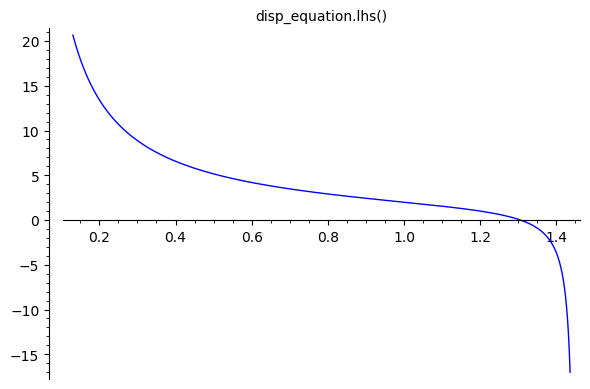

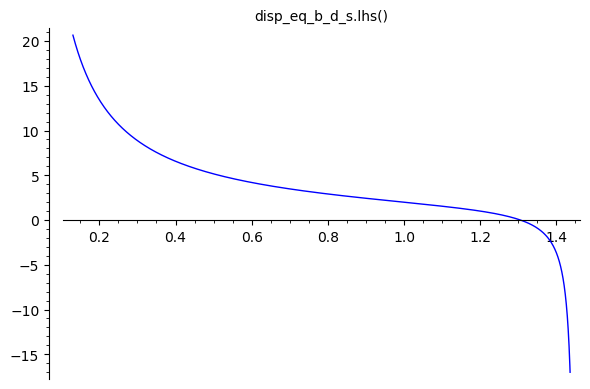

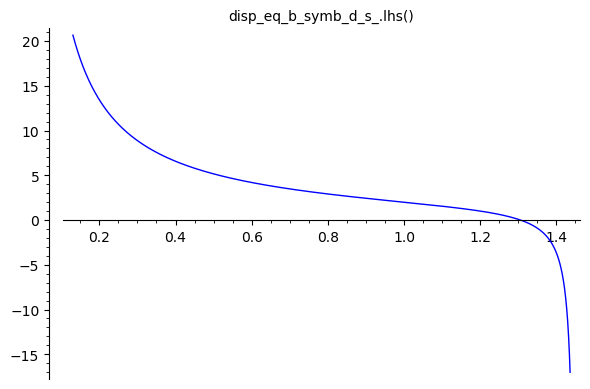

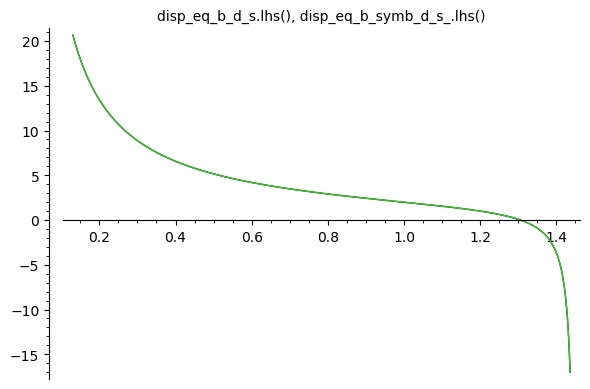


h_s_ [h_0 == 1.17514864077998, h_1 == 0.130572071197776]


h_sol_ [0, 1.17514864077998, 1.30572071197776]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rho)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*varphi)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rho)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*varphi)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rho)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*varphi)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k

[1.07938701754920*(1.00000000000000*(cos(1.17514864077998*k_1)*cos(0.130572071197776*k_1) - sin(1.17514864077998*k_1)*sin(0.130572071197776*k_1))*cos(1.17514864077998*k_0)*sin(k_1*z)/cos(0.130572071197776*k_1) - 1.00000000000000*(cos(1.17514864077998*k_1)*cos(0.130572071197776*k_1) - sin(1.17514864077998*k_1)*sin(0.130572071197776*k_1))*cos(k_1*z)*cos(1.17514864077998*k_0)*sin(1.30572071197776*k_1)/(cos(1.30572071197776*k_1)*cos(0.130572071197776*k_1)))*k_1]

E_rho_s
[2.59702882370340*sin(2.40602191936686*z)]
[(3.18044303624178e-16)*cos(2.40602191936686*z) + 2.59702882370340*sin(2.40602191936686*z)]


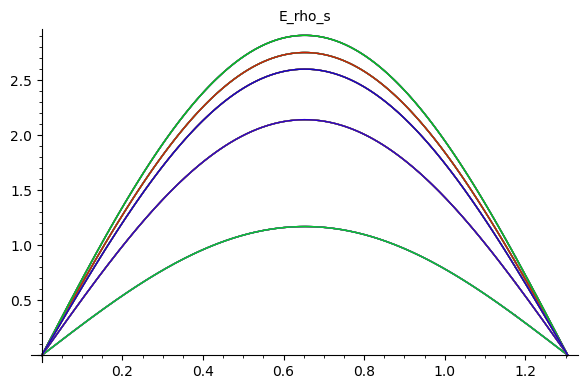

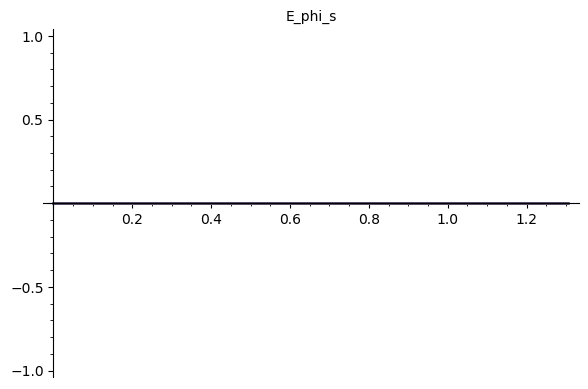

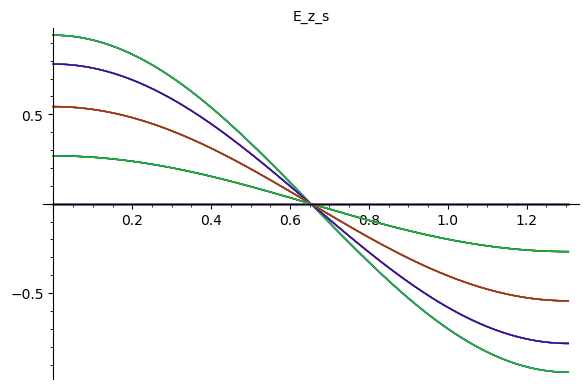

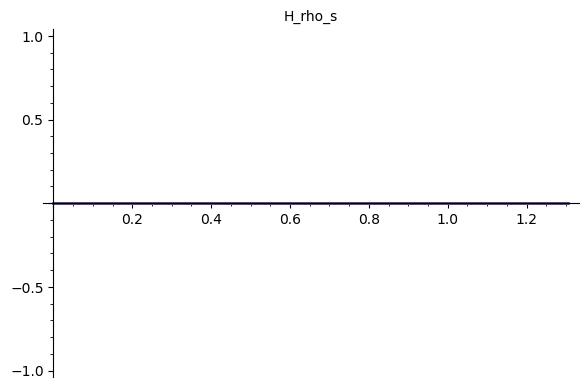

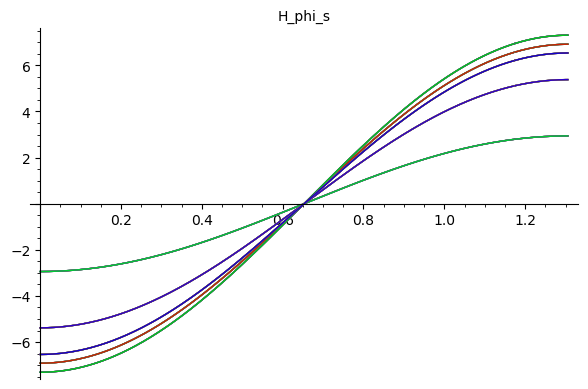

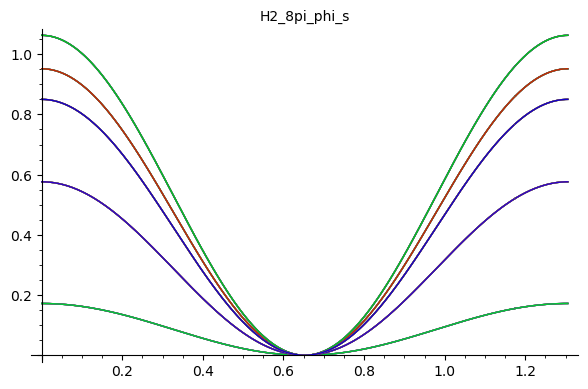

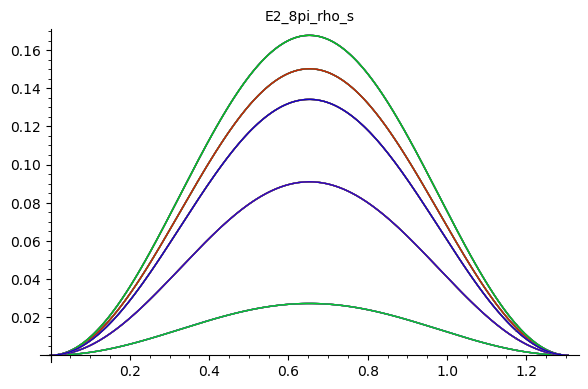


t_metal_dielectric_floor_sol -0.380689000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.380688999999997*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -(2.77555756156289e-15)*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': 2/6241*pi*((1.36424205265939e-12)*pi + (1.54614099301398e-11)/pi),
 'p_metal': (4.73986312939710e-16)*pi^2,
 'p_metal_up': 0.109551467026550*pi^2,
 'p_metal_down': 0.109551467026549*pi^2,
 'f_dielectric': 0,
 'b_sol': 1.30572071197776,
 't_metal_dielectric': -4.99600361081320e-15,
 't_metal_dielectric_floor': -0.677053071363162,
 't_dielectric_metal_ceil': 0.677053071363157,
 't_dielectric': 0,
 'p_dielectric': 0}

In [317]:
calc_f_surf(ra = 1, g1 = 0.1, epsilon_rh_ph_0 = epsilon_z_z_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_z_z_d[0], epsilon_z_z_1 = epsilon_z_z_d[0], debug = True)

In [318]:
#test isotropic

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 2.40602191936686
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 1.39791129439966
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.609980772312129*pi^2 - k_0^2 == 0.231327438517871, 0.221435767505208*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 2.40602191936686, k_1 == 1.39791129439966]

k_values_d_ =  [k_0 == 2.40602191936686, k_1 == 1.39791129439966]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = ((15334505969.423*cos(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1) - 15334505969.423*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b))*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20) + (-42241386292.9059*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1) - 42241386292.9059*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.07

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = ((15334505969.423*cos((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b) - 15334505969.423*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b))*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20) + (42241386292.9059*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b) + 42241386292.9059*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b), 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b)]


<IPython.core.display.Math object>

operand 0.585622669739292*cos(2.16541972743018*b)/sin(2.16541972743018*b)
operand.variables() (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_roots [1.45080079108640, 2.90160158217280, 4.35240237325919, 5.80320316434559, 7.25400395543199, 8.70480474651839, 10.1556055376048, 11.6064063286912, 13.0572071197776, 14.5080079108640, 15.9588087019504, 17.4096094930368, 18.8604102841232, 20.3112110752096, 21.7620118662960, 23.2128126573824, 24.6636134484688, 26.1144142395552, 27.5652150306416, 29.0160158217280, 30.4668166128144, 31.9176174039007, 33.3684181949871, 34.8192189860735, 36.2700197771599, 37.7208205682463, 39.1716213593327, 40.6224221504191, 42.0732229415055, 43.5240237325919, 44.9748245236783, 46.4256253147647, 47.8764261058511, 49.3272268969375, 50.7780276880239, 52.2288284791103, 53.6796292701967, 55.1304300612831, 56.5812308523695, 58.0320316434559

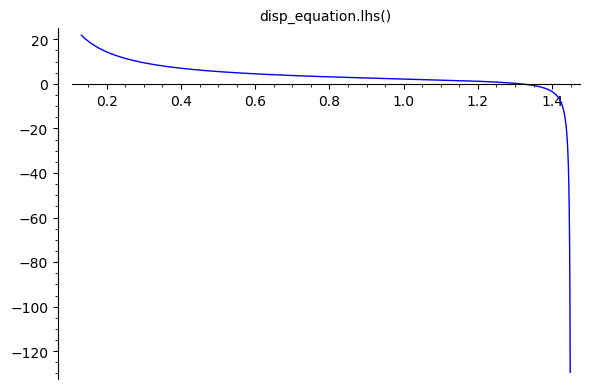

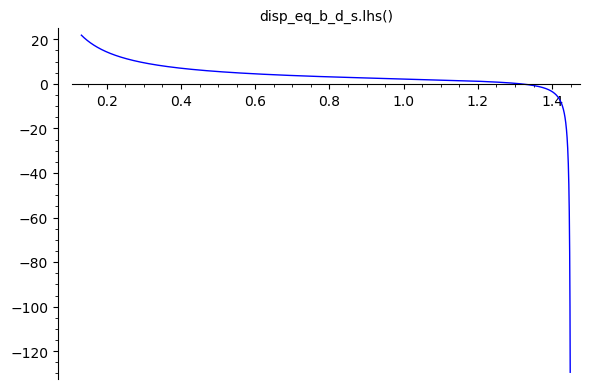

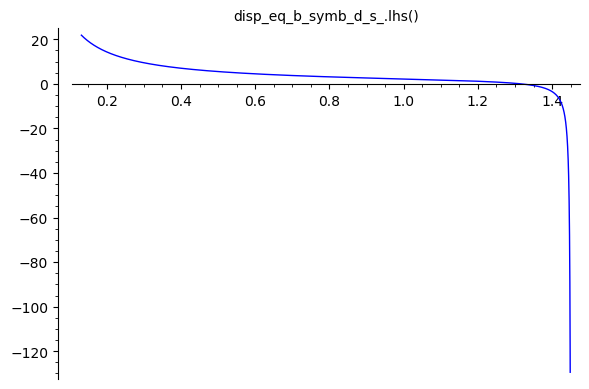

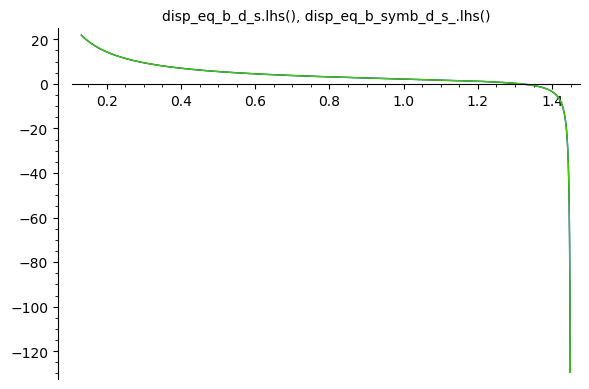


h_s_ [h_0 == 1.18533275926930, h_1 == 0.131703639918811]


h_sol_ [0, 1.18533275926930, 1.31703639918811]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.31703639918811*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.31703639918811*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.31703639918811*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph

[1.07938701754920*(2.75466235280976*(cos(1.18533275926930*k_1)*cos(0.131703639918811*k_1) - sin(1.18533275926930*k_1)*sin(0.131703639918811*k_1))*cos(1.18533275926930*k_0)*sin(k_1*z)/cos(0.131703639918811*k_1) - 2.75466235280976*(cos(1.18533275926930*k_1)*cos(0.131703639918811*k_1) - sin(1.18533275926930*k_1)*sin(0.131703639918811*k_1))*cos(k_1*z)*cos(1.18533275926930*k_0)*sin(1.31703639918811*k_1)/(cos(1.31703639918811*k_1)*cos(0.131703639918811*k_1)))*k_1]

E_rho_s
[2.59702882370340*sin(2.40602191936686*z)]
[3.90468090762616*cos(1.39791129439966*z) + 1.08192912786201*sin(1.39791129439966*z)]


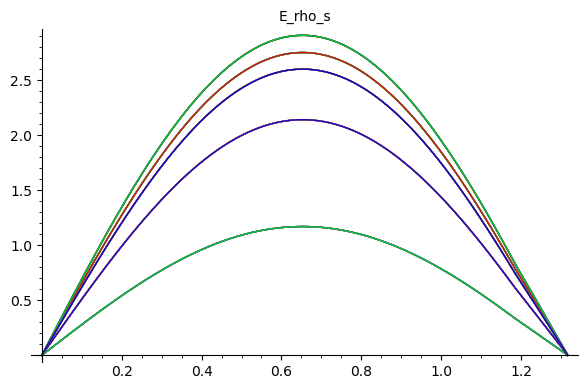

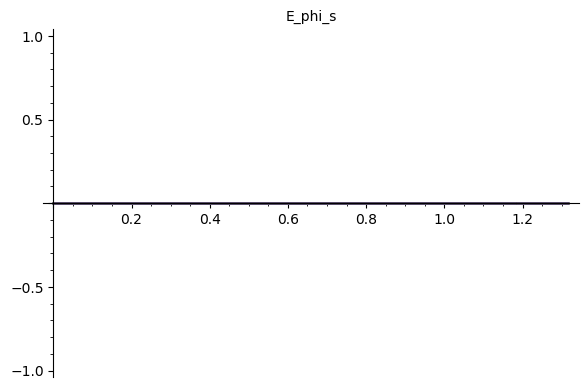

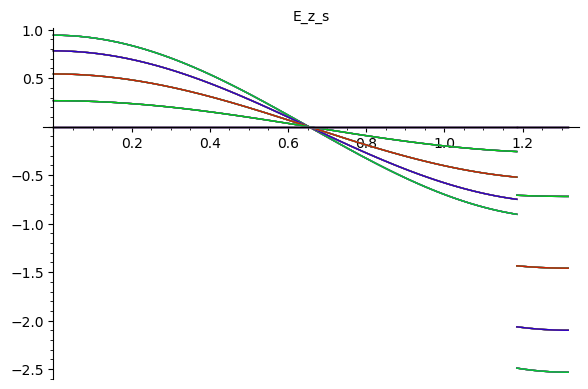

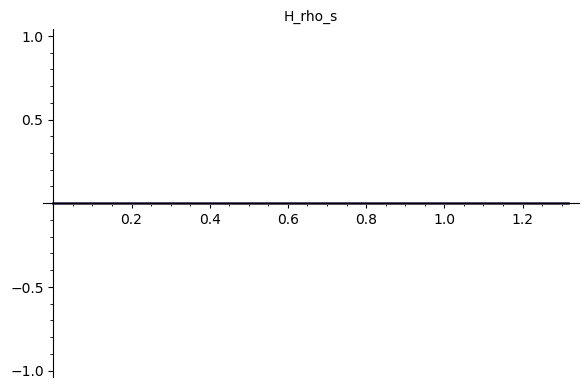

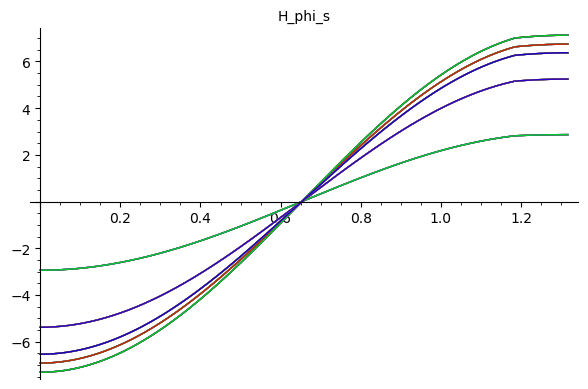

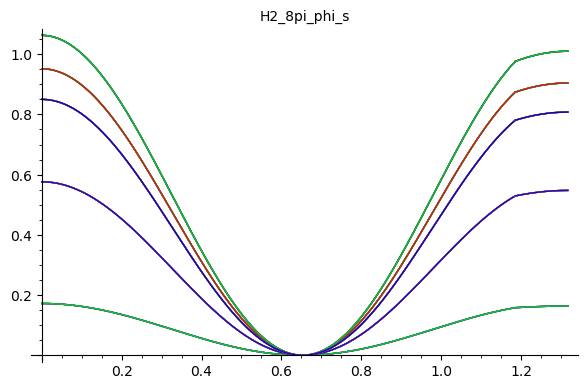

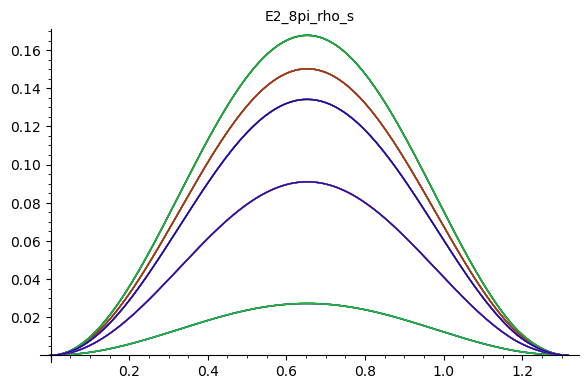


t_metal_dielectric_floor_sol -0.380689000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.996517399281606*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol 0.615828399281606*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': -2/6241*pi*(17.0010910108934*pi - 155.595080399446/pi),
 'p_metal': -0.00544819452359985*pi^2,
 'p_metal_up': 0.104103272502949*pi^2,
 'p_metal_down': 0.109551467026549*pi^2,
 'f_dielectric': -1.14510929033483,
 'b_sol': 1.31703639918811,
 't_metal_dielectric': 1.09524706299964,
 't_metal_dielectric_floor': -0.677053071363162,
 't_dielectric_metal_ceil': 1.77230013436281,
 't_dielectric': -1.09108219707506,
 'p_dielectric': 0.0540270932597662}

In [319]:
calc_f_surf(ra = 1, g1 = 0.1, epsilon_rh_ph_0 = epsilon_z_z_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_z_z_d[1], epsilon_z_z_1 = epsilon_z_z_d[1], debug = True)

In [320]:
# test non isotropic and equial

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 2.40602191936686
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 2.40602191936686
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.609980772312129*pi^2 - k_0^2 == 0.231327438517871, 0.609980772312129*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 2.40602191936686, k_1 == 2.40602191936686]

k_values_d_ =  [k_0 == 2.40602191936686, k_1 == 2.40602191936686]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = 1/2977620295680*(66555*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)^3*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2 - 1048576*(494215757029460*pi^2 + 937125154908117)*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b) + (1048576*(494215757029460*pi^2 + 937125154908117)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2 - 66555*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2)*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1))*sqrt(16730449769452210*pi^2 - 6344809977778931)/(2*(16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b*g_1)^3*cos(16/3747405

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 3.63377465476508*cos(0.240602191936686*b)/sin(0.240602191936686*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = 1/2977620295680*(1048576*(494215757029460*pi^2 + 937125154908117)*cos((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2 - 1048576*(494215757029460*pi^2 + 937125154908117)*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)*sin((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b) + 66555*(cos((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^3 - cos((4.26962041853635e-10)*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b))*cos(16/3747405725*sqrt(2)*sqrt(16730449769452210*pi^2 - 6344809977778931)*b)^2)*sqrt(16730449769452210*pi^2 - 6344809977778931)/((16730449769452210*sqrt(2)*pi^2 - 6344809977778931*sqrt(2))*cos((4.26962041853635e-10)*sqrt(2)*sqrt(167304

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 3.63377465476508*cos(0.240602191936686*b)/sin(0.240602191936686*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b), 3.63377465476508*cos(0.240602191936686*b)/sin(0.240602191936686*b)]


<IPython.core.display.Math object>

operand 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b)
operand.variables() (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_roots [1.45080079108640, 2.90160158217280, 4.35240237325919, 5.80320316434559, 7.25400395543199, 8.70480474651839, 10.1556055376048, 11.6064063286912, 13.0572071197776, 14.5080079108640, 15.9588087019504, 17.4096094930368, 18.8604102841232, 20.3112110752096, 21.7620118662960, 23.2128126573824, 24.6636134484688, 26.1144142395552, 27.5652150306416, 29.0160158217280, 30.4668166128144, 31.9176174039007, 33.3684181949871, 34.8192189860735, 36.2700197771599, 37.7208205682463, 39.1716213593327, 40.6224221504191, 42.0732229415055, 43.5240237325919, 44.9748245236783, 46.4256253147647, 47.8764261058511, 49.3272268969375, 50.7780276880239, 52.2288284791103, 53.6796292701967, 55.1304300612831, 56.5812308523695, 58.0320316434559,

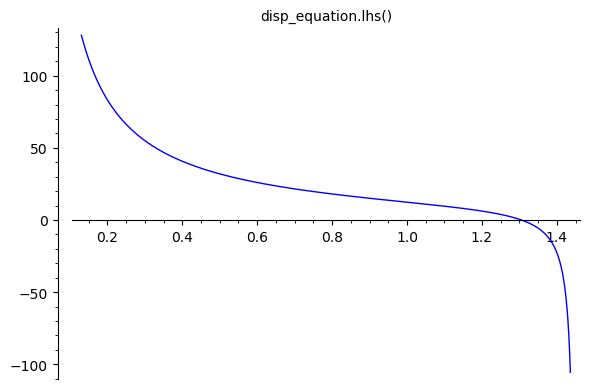

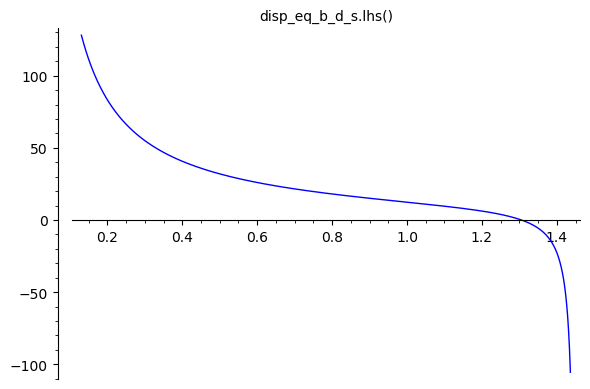

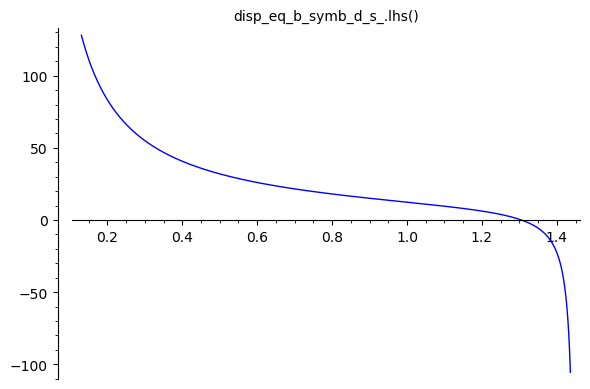

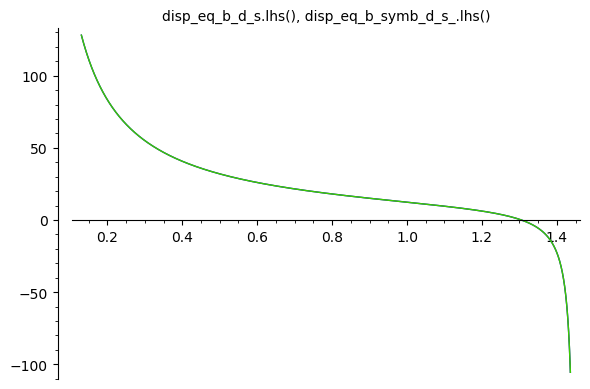


h_s_ [h_0 == 1.17514864077998, h_1 == 0.130572071197776]


h_sol_ [0, 1.17514864077998, 1.30572071197776]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.30572071197776*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph

[-0.600764025544389*epsilon_z_z_1*(-(1.22464679914735e-16)*epsilon_rh_ph_0*(6.02026891499168*epsilon_rh_ph_1 - 5.78894147647381*epsilon_z_z_1)*epsilon_z_z_0*cos(2.40602191936686*z)/((6.02026891499168*epsilon_rh_ph_0 - 5.78894147647381*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1) - 1.00000000000000*epsilon_rh_ph_0*(6.02026891499168*epsilon_rh_ph_1 - 5.78894147647381*epsilon_z_z_1)*epsilon_z_z_0*sin(2.40602191936686*z)/((6.02026891499168*epsilon_rh_ph_0 - 5.78894147647381*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1))/(6.02026891499168*epsilon_rh_ph_1 - 5.78894147647381*epsilon_z_z_1)]

[k_0 == 2.40602191936686, k_1 == 2.40602191936686]
E_rho_s
[-1.52087895312708*k_0*sin(k_0*z)/(-1.21820480000000*k_0^2 - 1.69082517584505)]
[-1.52087895312708*(1.00000000000000*(-1.21820480000000*k_1^2 - 1.69082517584505)*(cos(1.17514864077998*k_1)*cos(0.130572071197776*k_1) - sin(1.17514864077998*k_1)*sin(0.130572071197776*k_1))*cos(1.17514864077998*k_0)*sin(k_1*z)/((-1.21820480000000*k_0^2 - 1.690825175

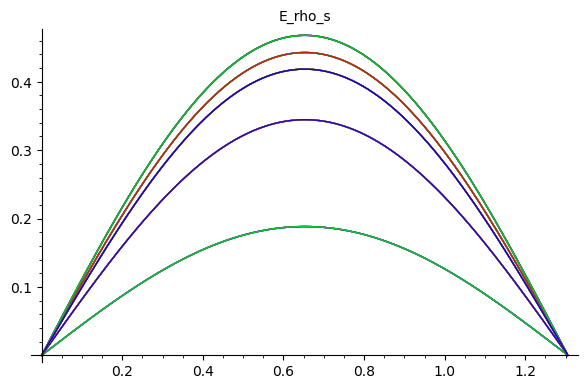

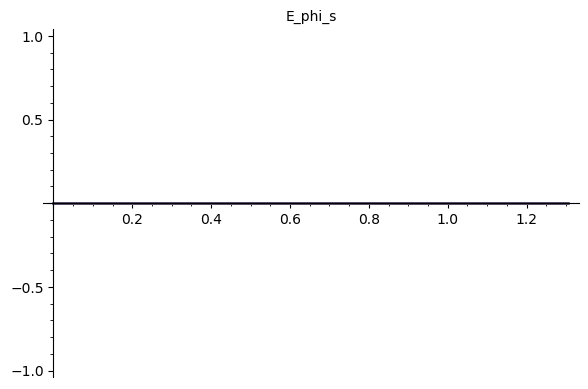

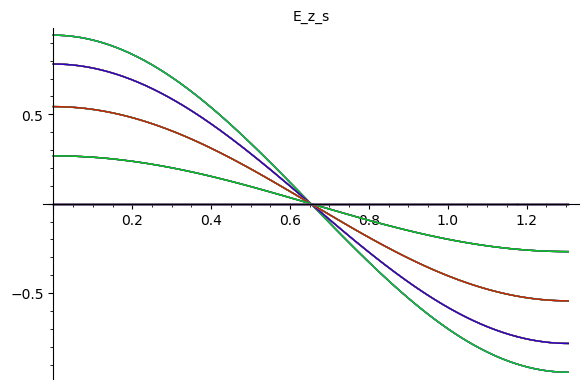

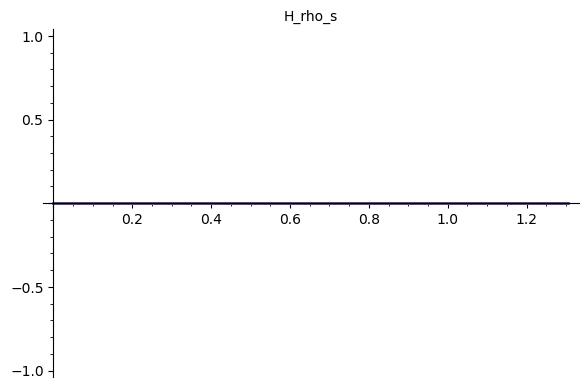

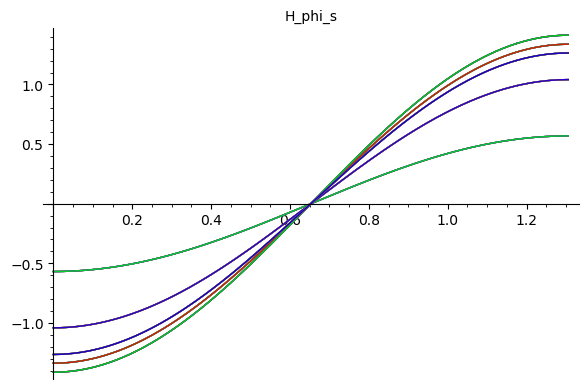

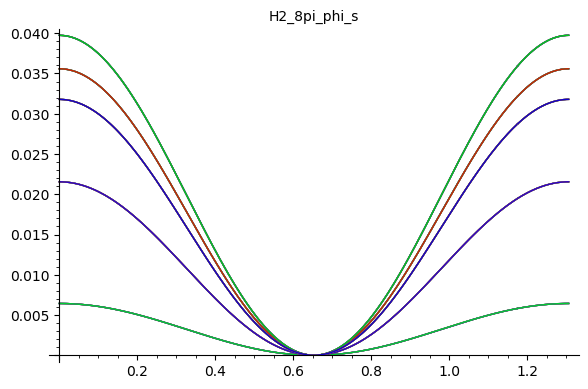

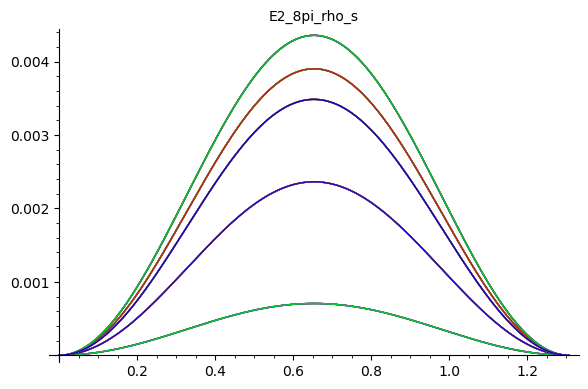


t_metal_dielectric_floor_sol -0.380689000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.380689000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -(1.11022302462516e-16)*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': 2/6241*pi*((2.66453525910038e-14)*pi + (4.54747350886464e-13)/pi),
 'p_metal': (9.52204646530668e-18)*pi^2,
 'p_metal_up': 0.00409732550547513*pi^2,
 'p_metal_down': 0.00409732550547512*pi^2,
 'f_dielectric': 0,
 'b_sol': 1.30572071197776,
 't_metal_dielectric': -2.22044604925031e-16,
 't_metal_dielectric_floor': -0.677053071363162,
 't_dielectric_metal_ceil': 0.677053071363162,
 't_dielectric': 0,
 'p_dielectric': 0}

In [321]:
calc_f_surf(ra = 1, g1 = 0.1, epsilon_rh_ph_0 = epsilon_rh_ph_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_rh_ph_d[0], epsilon_z_z_1 = epsilon_z_z_d[0], debug = True)

In [322]:
# test non isotropic

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 2.40602191936686
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 1.39791129439966
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.609980772312129*pi^2 - k_0^2 == 0.231327438517871, 0.221435767505208*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 2.40602191936686, k_1 == 1.39791129439966]

k_values_d_ =  [k_0 == 2.40602191936686, k_1 == 1.39791129439966]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = ((15334505969.423*cos(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)^2*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2 - 30669011938.846*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b) + 15334505969.423*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2*cos(1/29979245800*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)^2)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = ((15334505969.423*cos((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)^2*cos((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)^2 - 30669011938.846*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b) + 15334505969.423*cos(1/29979245800*sqrt((5.4822337804541e+20)*pi^2 - 2.0790673335186e+20)*b)^2*cos((3.33564095198152e-12)*sqrt((1.99016542802867e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((3.33564095198152e-12)*sqrt((5.4822337804541e+20)*pi^2 - 2.079

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b) + 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b), 0.365905950505817*cos(0.139791129439966*b)/sin(0.139791129439966*b)]


<IPython.core.display.Math object>

operand 3.63377465476508*cos(2.16541972743018*b)/sin(2.16541972743018*b)
operand.variables() (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(2.16541972743018*b)
operand_denominator_roots [1.45080079108640, 2.90160158217280, 4.35240237325919, 5.80320316434559, 7.25400395543199, 8.70480474651839, 10.1556055376048, 11.6064063286912, 13.0572071197776, 14.5080079108640, 15.9588087019504, 17.4096094930368, 18.8604102841232, 20.3112110752096, 21.7620118662960, 23.2128126573824, 24.6636134484688, 26.1144142395552, 27.5652150306416, 29.0160158217280, 30.4668166128144, 31.9176174039007, 33.3684181949871, 34.8192189860735, 36.2700197771599, 37.7208205682463, 39.1716213593327, 40.6224221504191, 42.0732229415055, 43.5240237325919, 44.9748245236783, 46.4256253147647, 47.8764261058511, 49.3272268969375, 50.7780276880239, 52.2288284791103, 53.6796292701967, 55.1304300612831, 56.5812308523695, 58.0320316434559,

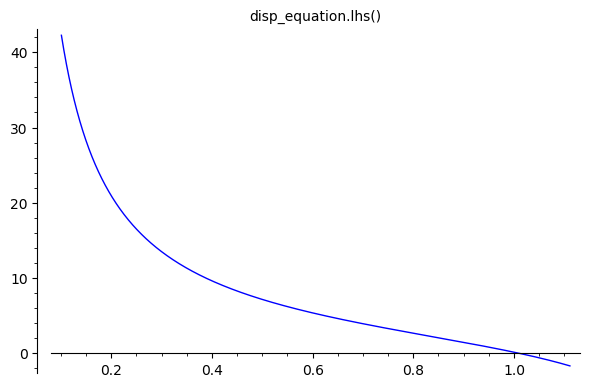

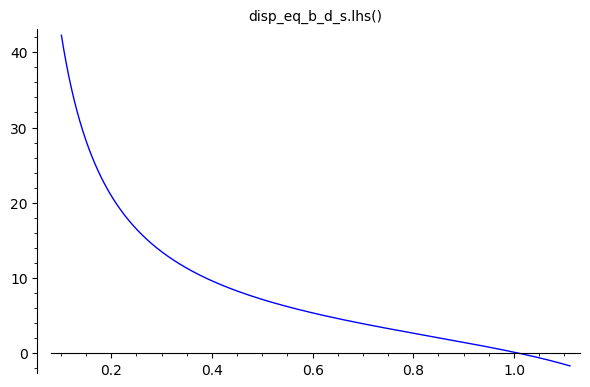

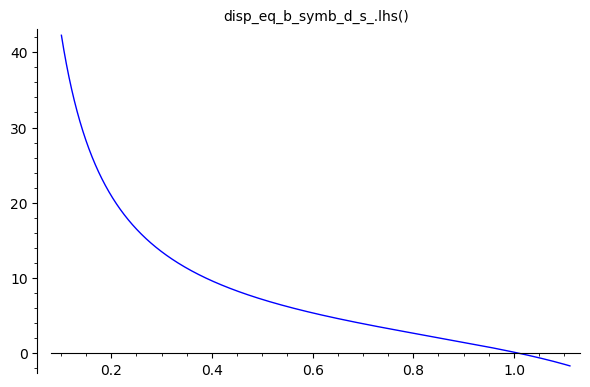

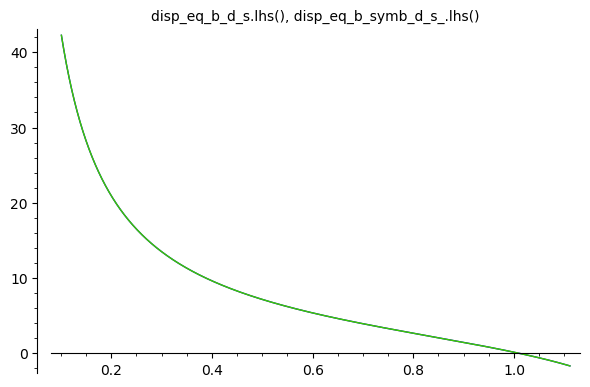


h_s_ [h_0 == 0.909033832452835, h_1 == 0.101003759161426]


h_sol_ [0, 0.909033832452835, 1.01003759161426]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.01003759161426*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.01003759161426*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(1.01003759161426*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_

[-0.349047034782833*epsilon_z_z_1*(-0.576526941512270*epsilon_rh_ph_0*(2.18548342552800*epsilon_rh_ph_1 - 1.95415598701012*epsilon_z_z_1)*epsilon_z_z_0*cos(1.39791129439966*z)/((6.02026891499168*epsilon_rh_ph_0 - 5.78894147647381*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1) + 0.0923614525674133*epsilon_rh_ph_0*(2.18548342552800*epsilon_rh_ph_1 - 1.95415598701012*epsilon_z_z_1)*epsilon_z_z_0*sin(1.39791129439966*z)/((6.02026891499168*epsilon_rh_ph_0 - 5.78894147647381*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1))/(2.18548342552800*epsilon_rh_ph_1 - 1.95415598701012*epsilon_z_z_1)]

[k_0 == 2.40602191936686, k_1 == 1.39791129439966]
E_rho_s
[-1.52087895312708*k_0*sin(k_0*z)/(-1.21820480000000*k_0^2 - 1.69082517584505)]
[1.07938701754920*k_1*(-4.65765245708331*(cos(0.909033832452835*k_1)*cos(0.101003759161426*k_1) - sin(0.909033832452835*k_1)*sin(0.101003759161426*k_1))*cos(0.909033832452835*k_0)*sin(k_1*z)/((-1.21820480000000*k_0^2 - 1.69082517584505)*cos(0.101003759161426*k_1)) + 4.65

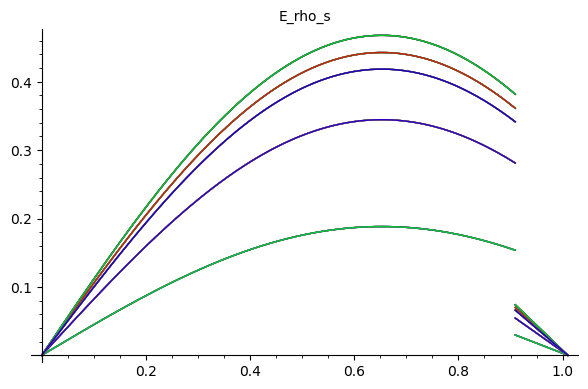

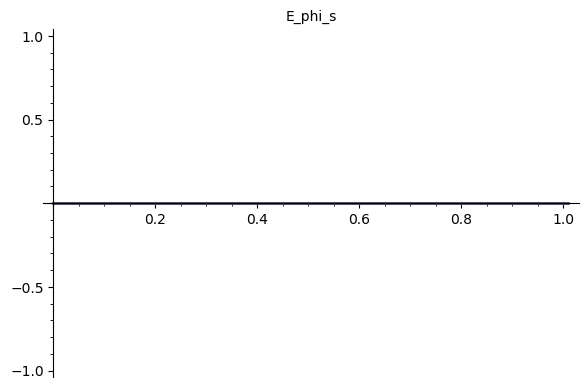

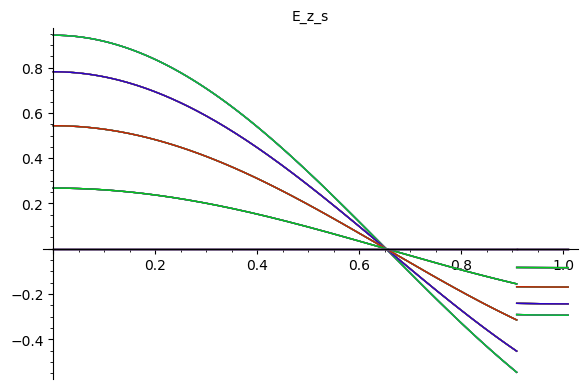

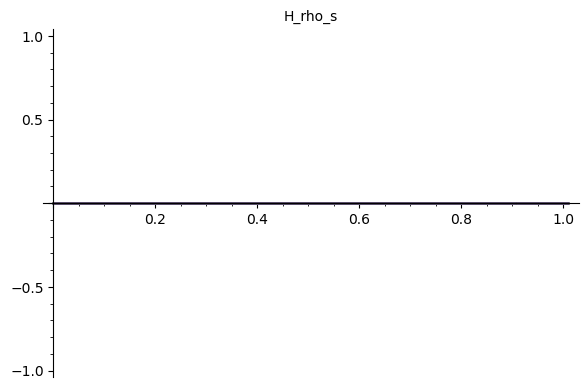

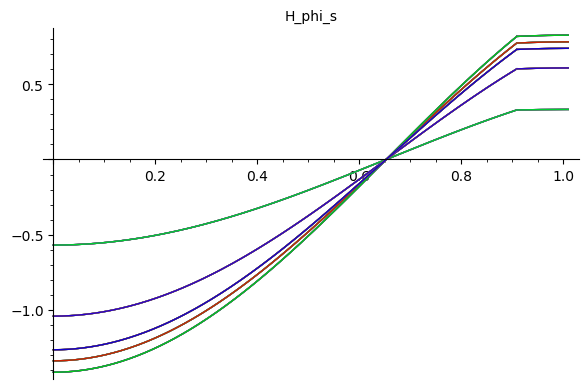

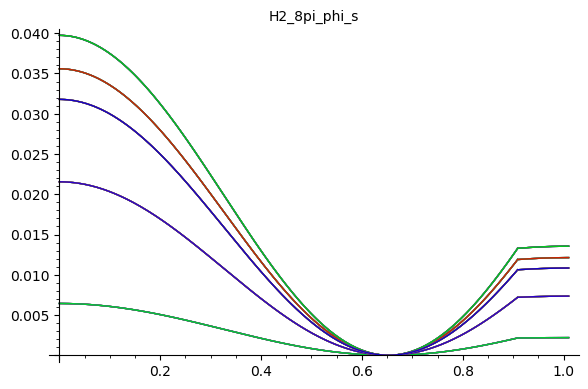

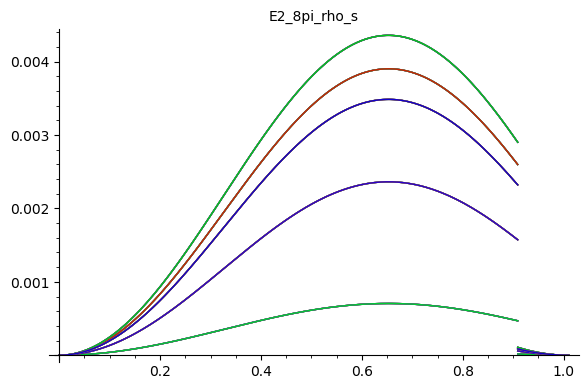


t_metal_dielectric_floor_sol -0.380689000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.0133710572013467*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -0.367317942798653*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': -2/6241*pi*(8.42687927564665*pi - 3324.28924657873/pi),
 'p_metal': -0.00270049007391336*pi^2,
 'p_metal_up': 0.00139683543156176*pi^2,
 'p_metal_down': 0.00409732550547512*pi^2,
 'f_dielectric': -0.412033872963950,
 'b_sol': 1.01003759161426,
 't_metal_dielectric': -0.653272727445833,
 't_metal_dielectric_floor': -0.677053071363162,
 't_dielectric_metal_ceil': 0.0237803439173297,
 't_dielectric': -0.396985006343265,
 'p_dielectric': 0.0150488666206855}

In [323]:
calc_f_surf(ra = 1, g1 = 0.1, epsilon_rh_ph_0 = epsilon_rh_ph_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_rh_ph_d[1], epsilon_z_z_1 = epsilon_z_z_d[1], debug = True)

In [324]:
# test non isotropic and isotropic

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 1.35804210467053
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 1.32115100832284
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.210302836083961*pi^2 - k_0^2 == 0.231327438517871, 1250/6241*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 1.35804210467053, k_1 == 1.32115100832284]

k_values_d_ =  [k_0 == 1.35804210467053, k_1 == 1.32115100832284]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1*k_1*cos

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = 1/9569484800*(319995271439300079*(sqrt(2)*cos(2048/296045052275*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b*g_1)*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*sin(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b*g_1) - sqrt(2)*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b*g_1)*cos(2048/296045052275*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b*g_1)*sin(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b))*sqrt(5768150727340698*pi^2 - 6344809977778931) - 5200*((4532221017383*sqrt(2)*pi^2 + 104691734375467*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b*g_1)*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*sin(2048/296045052275*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b*g_1) + (4532221017383*sqrt(2)*pi^2 + 104691734375467*sqrt(2))*sin(16/3747405725*sqrt(2)*sqrt(576815072

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.350190761026682*cos(0.396345302496851*b)/sin(0.396345302496851*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = 1/9569484800*(319995271439300079*(sqrt(2)*cos((1.2808861255609e-09)*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*cos((2.07535979837716e-09)*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b)*sin(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b) - sqrt(2)*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*cos((2.07535979837716e-09)*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b)*sin((1.2808861255609e-09)*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b))*sqrt(5768150727340698*pi^2 - 6344809977778931) + 5200*((4532221017383*sqrt(2)*pi^2 + 104691734375467*sqrt(2))*cos(16/3747405725*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*cos((1.2808861255609e-09)*sqrt(2)*sqrt(5768150727340698*pi^2 - 6344809977778931)*b)*sin((2.07535979837716e-09)*sqrt(2)*sqrt(2092577467525419*pi^2 - 2416867619099021)*b) + (4532221017383*sqrt(2)*pi^2 + 1046917343754

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.350190761026682*cos(0.396345302496851*b)/sin(0.396345302496851*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b), 0.350190761026682*cos(0.396345302496851*b)/sin(0.396345302496851*b)]


<IPython.core.display.Math object>

operand 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b)
operand.variables() (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_roots [3.30474989670301, 6.60949979340603, 9.91424969010904, 13.2189995868121, 16.5237494835151, 19.8284993802181, 23.1332492769211, 26.4379991736241, 29.7427490703271, 33.0474989670301, 36.3522488637331, 39.6569987604362, 42.9617486571392, 46.2664985538422, 49.5712484505452, 52.8759983472482, 56.1807482439512, 59.4854981406542, 62.7902480373572]
operand 0.350190761026682*cos(0.396345302496851*b)/sin(0.396345302496851*b)
operand.variables() (b,)
operand_denominator sin(0.396345302496851*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.396345302496851*b)
operand_denominator_roots [7.92640314846359, 15.8528062969272, 23.7792094453908, 31.7056125938544, 39.63201574231

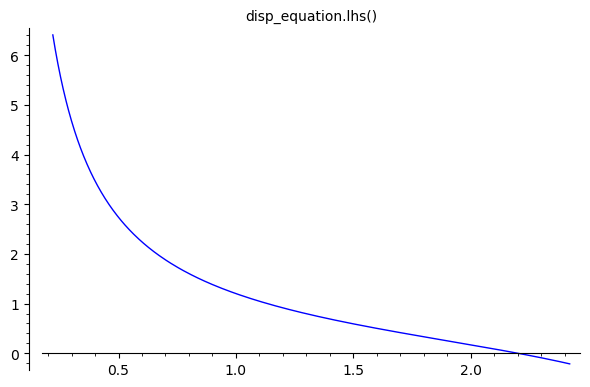

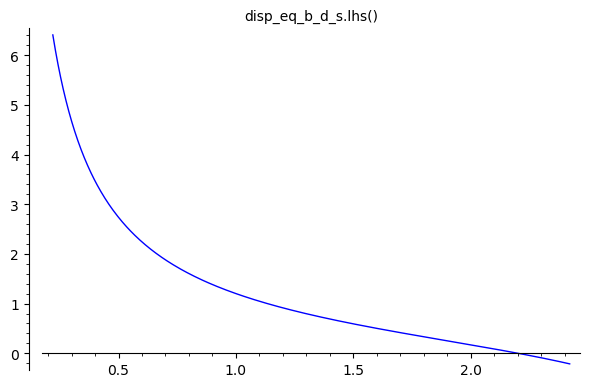

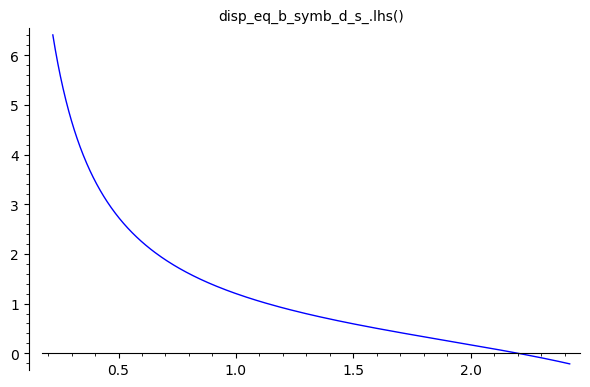

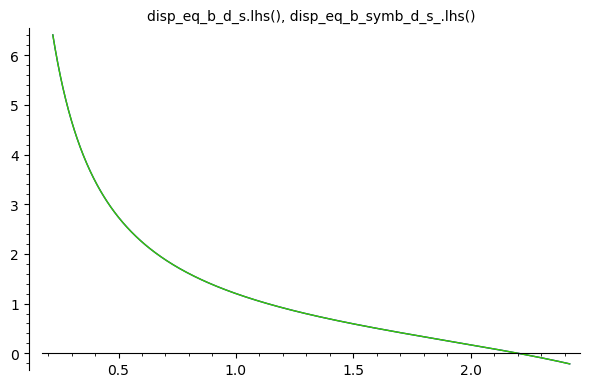


h_s_ [h_0 == 1.54122628712467, h_1 == 0.660525551624859]


h_sol_ [0, 1.54122628712467, 2.20175183874953]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.20175183874953*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.20175183874953*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.20175183874953*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph

[-0.329880618178622*epsilon_z_z_1*(-0.178993748923153*epsilon_rh_ph_0*(1.97676742531032*epsilon_rh_ph_1 - 1.74543998679245*epsilon_z_z_1)*epsilon_z_z_0*cos(1.32115100832284*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1) - 0.755114804726705*epsilon_rh_ph_0*(1.97676742531032*epsilon_rh_ph_1 - 1.74543998679245*epsilon_z_z_1)*epsilon_z_z_0*sin(1.32115100832284*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1))/(1.97676742531032*epsilon_rh_ph_1 - 1.74543998679245*epsilon_z_z_1)]

[k_0 == 1.35804210467053, k_1 == 1.32115100832284]
E_rho_s
[-0.524352851272113*k_0*sin(k_0*z)/(-0.100000000000000*k_0^2 - 0.508920364739317)]
[1.07938701754920*k_1*(-0.534366382976283*(cos(1.54122628712467*k_1)*cos(0.660525551624859*k_1) - sin(1.54122628712467*k_1)*sin(0.660525551624859*k_1))*cos(1.54122628712467*k_0)*sin(k_1*z)/((-0.100000000000000*k_0^2 - 0.508920364739317)*cos(0.660525551624859*k_1)) + 0.

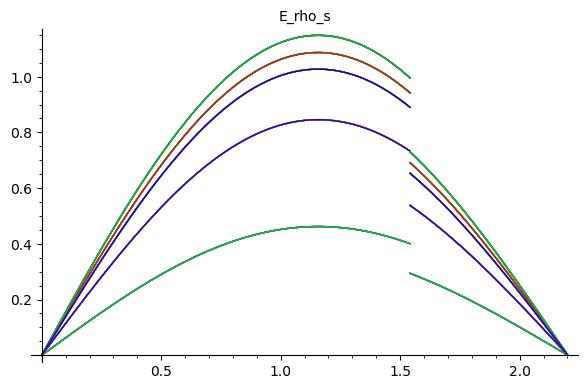

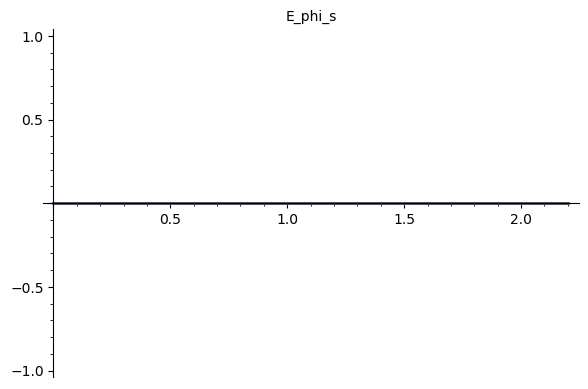

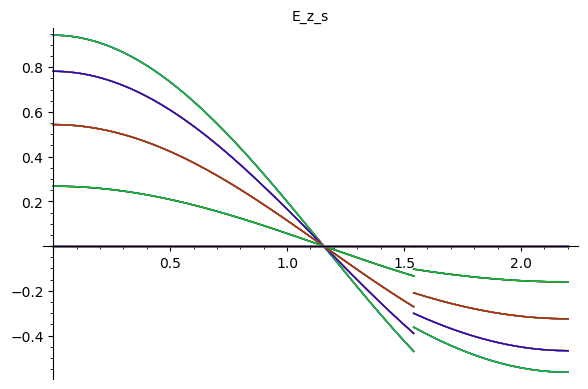

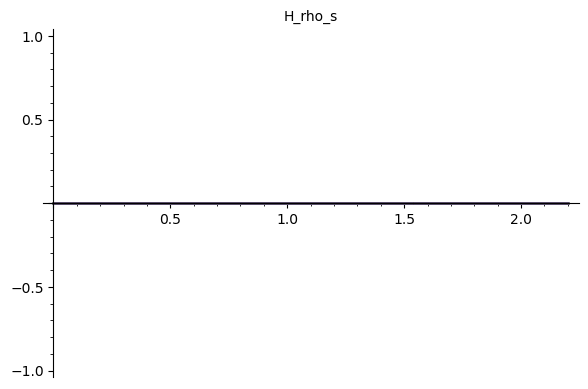

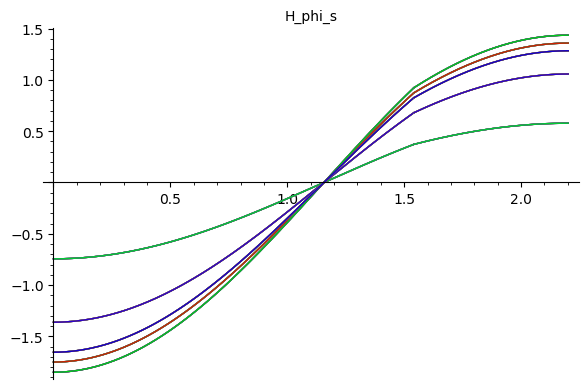

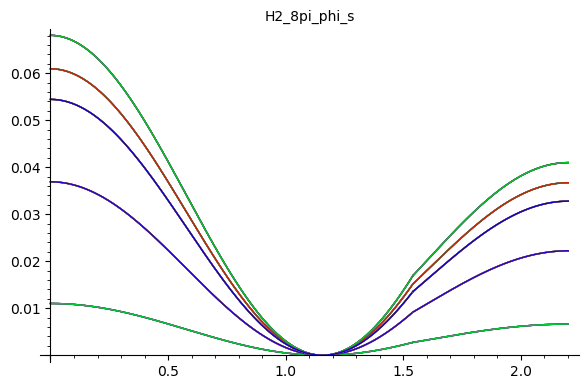

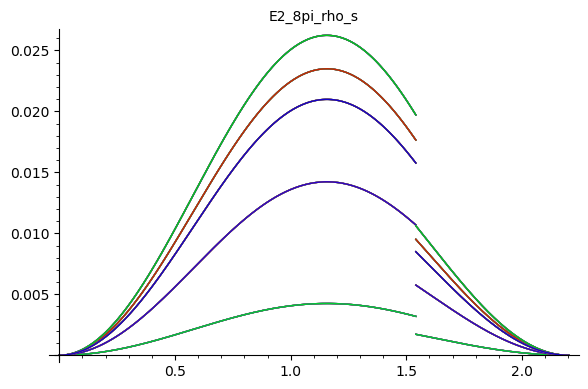


t_metal_dielectric_floor_sol -0.131250000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.0447149771595049*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -0.0865350228404951*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': -5/49928*pi*(317.774461971277*pi - 2432.34972979343/pi),
 'p_metal': -0.0318232717083878*pi^2,
 'p_metal_up': 0.0481823651829376*pi^2,
 'p_metal_down': 0.0800056368913254*pi^2,
 'f_dielectric': -0.0493986117968470,
 'b_sol': 2.20175183874953,
 't_metal_dielectric': -0.194187124642969,
 't_metal_dielectric_floor': -0.294528842459180,
 't_dielectric_metal_ceil': 0.100341717816211,
 't_dielectric': -0.00366447157548300,
 'p_dielectric': 0.0457341402213640}

In [325]:
# calc_f_surf(ra = float("NaN"), g1 = 0.5, epsilon0 = 2, epsilon1 = 2, debug = True)
calc_f_surf(ra = a_val/2, g1 = 0.3, epsilon_rh_ph_0 = 2.2, epsilon_z_z_0 = 2.1, epsilon_rh_ph_1 = 2, epsilon_z_z_1 = 2, debug = True)

In [326]:
# test non isotropic and isotropic equial to epsilon_z_z

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 1.35804210467053
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 1.35804210467053
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.210302836083961*pi^2 - k_0^2 == 0.231327438517871, 0.210302836083961*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 1.35804210467053, k_1 == 1.35804210467053]

k_values_d_ =  [k_0 == 1.35804210467053, k_1 == 1.35804210467053]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = -((-630472041.539817*pi^2 + 14563546493.1846)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) + (630472041.539817*pi^2 + 14563546493.1844)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^3*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) - 14563546493.1845*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^3*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2 + ((630472041.539817*pi^2 - 6.67572021484375e-05)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2 + (-630472041.539817*pi^2 - 14563546493.1844

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.357711752247465*cos(0.407412631401159*b)/sin(0.407412631401159*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = ((-630472041.539817*pi^2 + 6.67572021484375e-05)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2*cos((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2 + ((630472041.539817*pi^2 - 14563546493.1846)*cos((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2*sin((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) + (-630472041.539817*pi^2 - 14563546493.1844)*sin((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^3)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) + ((630472041.539817*pi^2 + 14563546493.1844)*cos((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((1.00069228559

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.357711752247465*cos(0.407412631401159*b)/sin(0.407412631401159*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b), 0.357711752247465*cos(0.407412631401159*b)/sin(0.407412631401159*b)]


<IPython.core.display.Math object>

operand 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b)
operand.variables() (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_roots [3.30474989670301, 6.60949979340603, 9.91424969010904, 13.2189995868121, 16.5237494835151, 19.8284993802181, 23.1332492769211, 26.4379991736241, 29.7427490703271, 33.0474989670301, 36.3522488637331, 39.6569987604362, 42.9617486571392, 46.2664985538422, 49.5712484505452, 52.8759983472482, 56.1807482439512, 59.4854981406542, 62.7902480373572]
operand 0.357711752247465*cos(0.407412631401159*b)/sin(0.407412631401159*b)
operand.variables() (b,)
operand_denominator sin(0.407412631401159*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.407412631401159*b)
operand_denominator_roots [7.71108309230703, 15.4221661846141, 23.1332492769211, 30.8443323692281, 38.55541546153

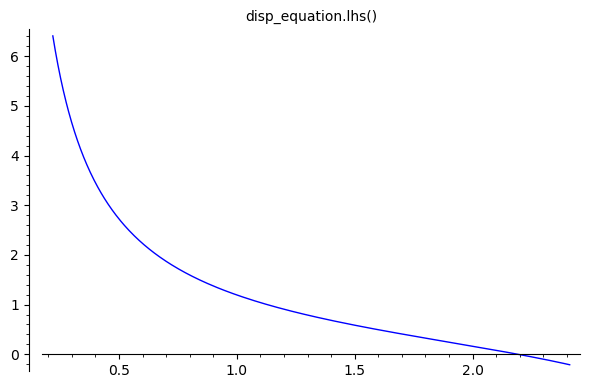

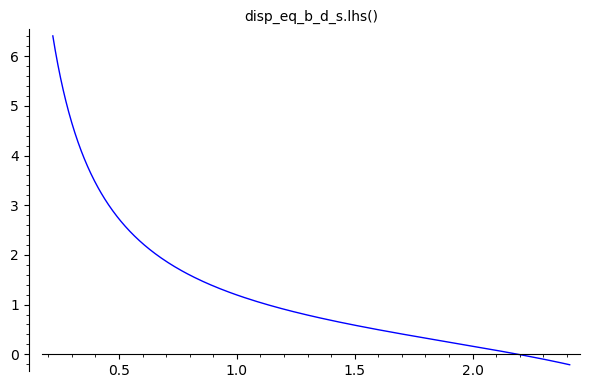

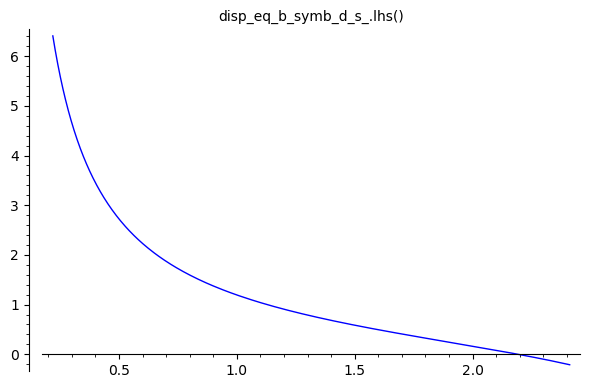

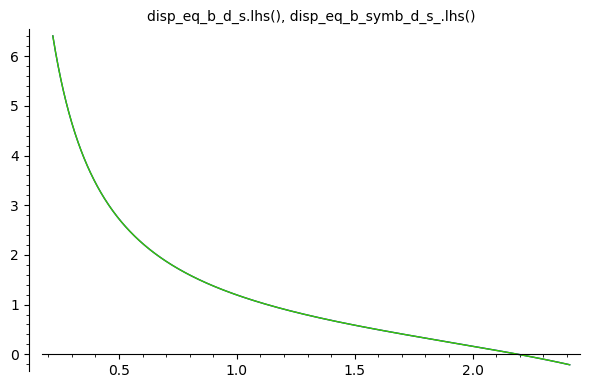


h_s_ [h_0 == 1.53468170616584, h_1 == 0.657720731213932]


h_sol_ [0, 1.53468170616584, 2.19240243737978]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.19240243737978*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.19240243737978*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.19240243737978*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph

[-0.339092023681702*epsilon_z_z_1*(-0.128067924524684*epsilon_rh_ph_0*(2.07560579657583*epsilon_rh_ph_1 - 1.84427835805796*epsilon_z_z_1)*epsilon_z_z_0*cos(1.35804210467053*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1) - 0.772843138885635*epsilon_rh_ph_0*(2.07560579657583*epsilon_rh_ph_1 - 1.84427835805796*epsilon_z_z_1)*epsilon_z_z_0*sin(1.35804210467053*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1))/(2.07560579657583*epsilon_rh_ph_1 - 1.84427835805796*epsilon_z_z_1)]

[k_0 == 1.35804210467053, k_1 == 1.35804210467053]
E_rho_s
[-0.524352851272113*k_0*sin(k_0*z)/(-0.100000000000000*k_0^2 - 0.508920364739317)]
[1.07938701754920*k_1*(-0.508920364739317*(cos(1.53468170616584*k_1)*cos(0.657720731213932*k_1) - sin(1.53468170616584*k_1)*sin(0.657720731213932*k_1))*cos(1.53468170616584*k_0)*sin(k_1*z)/((-0.100000000000000*k_0^2 - 0.508920364739317)*cos(0.657720731213932*k_1)) + 0.

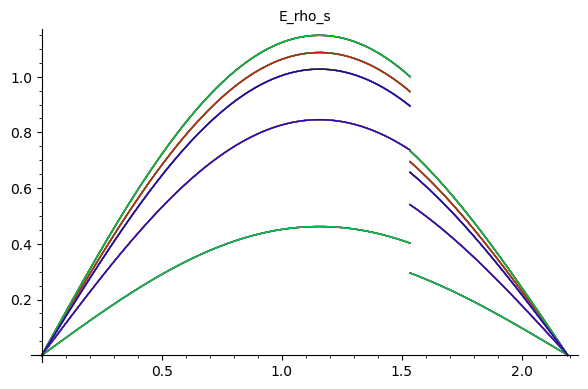

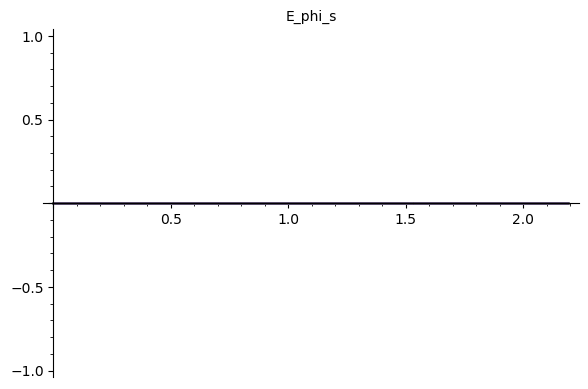

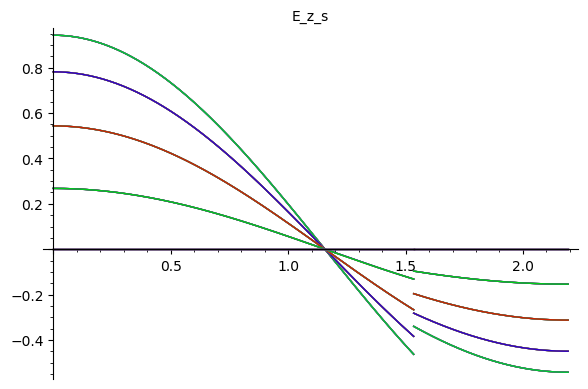

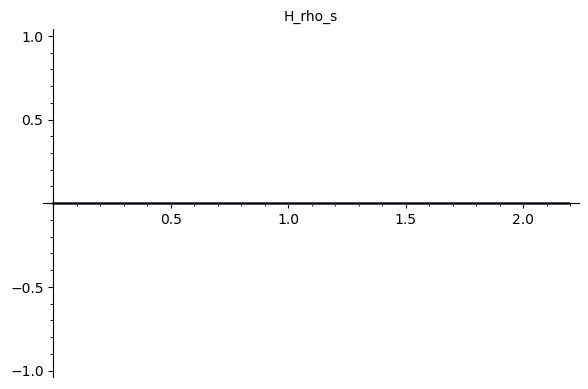

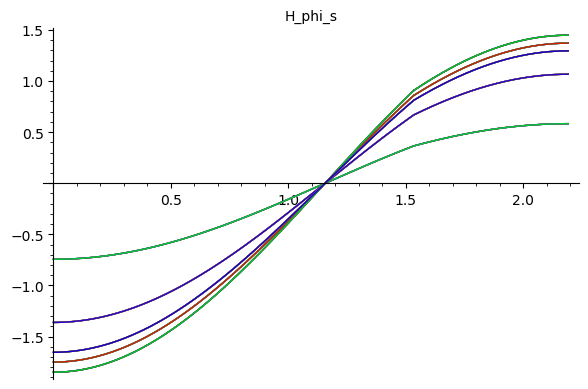

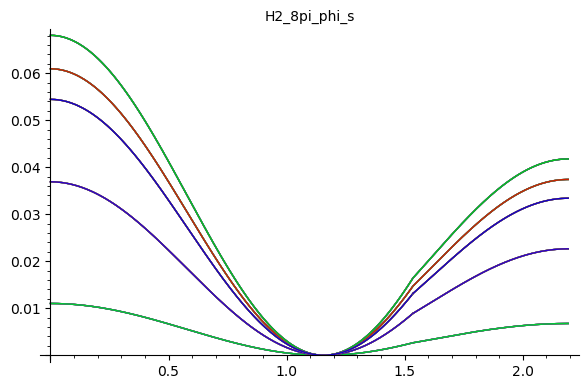

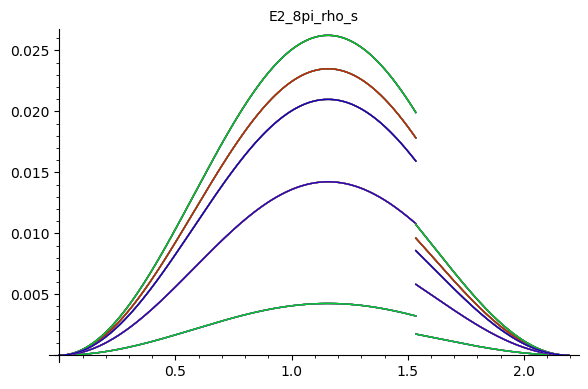


t_metal_dielectric_floor_sol -0.131250000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.0433954058132061*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -0.0878545941867939*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': 5/6241*pi*(-38.5782980770657*pi + 274.913656329795/pi),
 'p_metal': -0.0309071447500927*pi^2,
 'p_metal_up': 0.0490984921412327*pi^2,
 'p_metal_down': 0.0800056368913254*pi^2,
 'f_dielectric': -0.0230998009266756,
 'b_sol': 2.19240243737978,
 't_metal_dielectric': -0.197148281375675,
 't_metal_dielectric_floor': -0.294528842459180,
 't_dielectric_metal_ceil': 0.0973805610835044,
 't_dielectric': 0,
 'p_dielectric': 0.0230998009266756}

In [327]:
calc_f_surf(ra = a_val/2, g1 = 0.3, epsilon_rh_ph_0 = 2.2, epsilon_z_z_0 = 2.1, epsilon_rh_ph_1 = 2.1, epsilon_z_z_1 = 2.1, debug = True)

In [328]:
# test non isotropic and isotropic equial to epsilon_rh_ph

k_values_symbolic[ 0 ] k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c
k_values_symbolic_d_[ 0 ] 1.35804210467053
k_values_symbolic[ 1 ] k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c
k_values_symbolic_d_[ 1 ] 1.39395721933045
eq_kappa =  [-k_0^2 + epsilon_z_z_0*mu_0*omega^2/c^2 == kappa^2, -k_1^2 + epsilon_z_z_1*mu_1*omega^2/c^2 == kappa^2]

eq_kappa_d_ =  [0.210302836083961*pi^2 - k_0^2 == 0.231327438517871, 0.220317256849864*pi^2 - k_1^2 == 0.231327438517871]

k_values_symbolic [k_0 == sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)/c, k_1 == sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)/c]

k_values_symbolic_d_ =  [k_0 == 1.35804210467053, k_1 == 1.39395721933045]

k_values_d_ =  [k_0 == 1.35804210467053, k_1 == 1.39395721933045]

disp_eq_b =  epsilon_rh_ph_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) - epsilon_z_z_0*k_0*cos(-b*(g_1 - 1)*k_0)/sin(-b*(g_1 - 1)*k_0) + epsilon_rh_ph_0*kappa^2*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_rh_ph_1

<IPython.core.display.Math object>

disp_eq_b_symb = c*epsilon_rh_ph_0*kappa^2*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + c*epsilon_rh_ph_1*kappa^2*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*sin(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_rh_ph_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) - sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*epsilon_z_z_0*cos(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)/(c*sin(-sqrt(-c^2*kappa^2 + epsilon_z_z_0*mu_0*omega^2)*b*(g_1 - 1)/c)) + sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*epsilon_rh_ph_1*cos(sqrt(-c^2*kappa^2 + epsilon_z_z_1*mu_1*omega^2)*b*g_1/c)/(c*sin(sqrt(-c^2*kappa^2 + epsilon

<IPython.core.display.Math object>

disp_eq_b_symb_d_ = -((-15257048707.1456*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2 + 30514097414.2912*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) - 15257048707.1456*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*cos(1/29979245800*sqrt((1.98011275558905e+20)*pi^2 - 2.0790673335186e+20)*b*g_1) + ((-630472041.539817*pi^2 - 14563546493.1844)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b*g_1)^2*cos(1/29979245800*sqrt((1.8901076

<IPython.core.display.Math object>


disp_eq_b_symb_d_.variables() = (b, g_1)

disp_eq_b_d_s = 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.365090375573910*cos(0.418187165799135*b)/sin(0.418187165799135*b) == 0


<IPython.core.display.Math object>


disp_eq_b_d_s.variables() = (b,)

disp_eq_b_symb_d_s_ = ((15257048707.1456*cos((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2 - 30514097414.2912*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*cos((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)*sin((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b) + 15257048707.1456*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2*sin((1.00069228559446e-11)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*b)^2)*sqrt((1.890107630335e+20)*pi^2 - 2.0790673335186e+20)*cos((1.00069228559446e-11)*sqrt((1.98011275558905e+20)*pi^2 - 2.0790673335186e+20)*b) + ((-630472041.539817*pi^2 - 14563546493.1844)*cos(1/29979245800*sqrt((1.890107630335e+20)*pi^2 - 2.0

<IPython.core.display.Math object>


disp_eq_b_symb_d_s_.variables() = (b,)

disp_equation.lhs() 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b) + 0.365090375573910*cos(0.418187165799135*b)/sin(0.418187165799135*b)


<IPython.core.display.Math object>

disp_equation.rhs() 0

disp_equation.lhs().operator() <function add_vararg at 0x7f7a21f625e0>
disp_equation.lhs().operands() [0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b), 0.365090375573910*cos(0.418187165799135*b)/sin(0.418187165799135*b)]


<IPython.core.display.Math object>

operand 0.510549855678683*cos(0.950629473269371*b)/sin(0.950629473269371*b)
operand.variables() (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.950629473269371*b)
operand_denominator_roots [3.30474989670301, 6.60949979340603, 9.91424969010904, 13.2189995868121, 16.5237494835151, 19.8284993802181, 23.1332492769211, 26.4379991736241, 29.7427490703271, 33.0474989670301, 36.3522488637331, 39.6569987604362, 42.9617486571392, 46.2664985538422, 49.5712484505452, 52.8759983472482, 56.1807482439512, 59.4854981406542, 62.7902480373572]
operand 0.365090375573910*cos(0.418187165799135*b)/sin(0.418187165799135*b)
operand.variables() (b,)
operand_denominator sin(0.418187165799135*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
operand_denominator sin(0.418187165799135*b)
operand_denominator_roots [7.51240810460160, 15.0248162092032, 22.5372243138048, 30.0496324184064, 37.56204052300

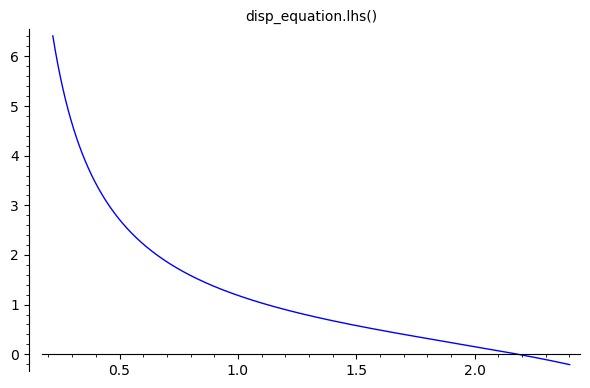

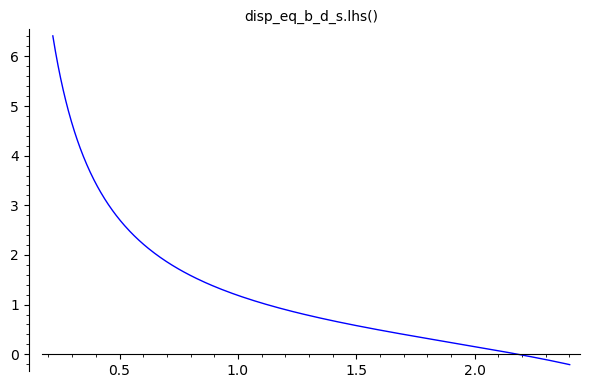

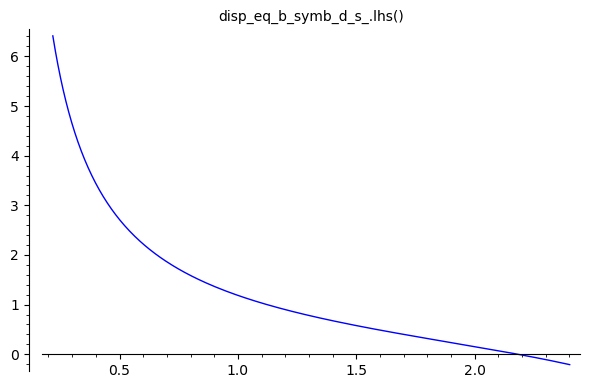

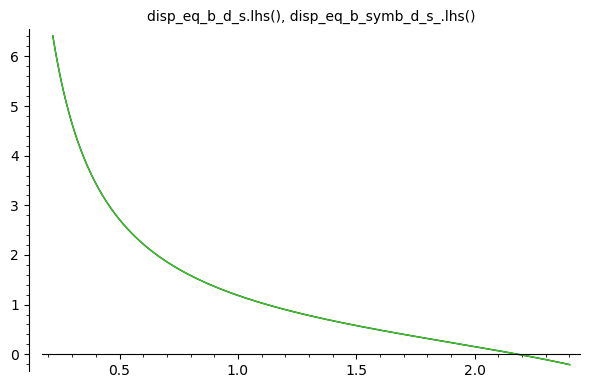


h_s_ [h_0 == 1.52830843938919, h_1 == 0.654989331166794]


h_sol_ [0, 1.52830843938919, 2.18329777055598]


(0.0 - 1/epsilon_z_z[0]) -1/epsilon_z_z_0

(1/epsilon_z_z[n_layers-1] - 0.0) 1/epsilon_z_z_1


t_metal_dielectric_floor_ -1/16*D_z_0^2*epsilon_z_z_0*bessel_J(m, kappa*rh)^2*cos(m*ph)^2/pi

t_dielectric_metal_ceil_ 1/16*(D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.18329777055598*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_rh_ph_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*k_1^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.18329777055598*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2)*epsilon_z_z_1) - D_z_0*epsilon_rh_ph_0*epsilon_z_z_0*kappa^2*bessel_J(m, kappa*rh)*cos(b*(g_1 - 1)*k_0)*cos(b*(g_1 - 1)*k_1)*cos(m*ph)*cos(2.18329777055598*k_1)/((epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph

[-0.348059734527270*epsilon_z_z_1*(-0.0775228426731912*epsilon_rh_ph_0*(2.17444416784135*epsilon_rh_ph_1 - 1.94311672932348*epsilon_z_z_1)*epsilon_z_z_0*cos(1.39395721933045*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1) - 0.787149483006291*epsilon_rh_ph_0*(2.17444416784135*epsilon_rh_ph_1 - 1.94311672932348*epsilon_z_z_1)*epsilon_z_z_0*sin(1.39395721933045*z)/((2.07560579657583*epsilon_rh_ph_0 - 1.84427835805796*epsilon_z_z_0)*epsilon_rh_ph_1*epsilon_z_z_1))/(2.17444416784135*epsilon_rh_ph_1 - 1.94311672932348*epsilon_z_z_1)]

[k_0 == 1.35804210467053, k_1 == 1.39395721933045]
E_rho_s
[-0.524352851272113*k_0*sin(k_0*z)/(-0.100000000000000*k_0^2 - 0.508920364739317)]
[1.07938701754920*k_1*(-0.485787620887530*(cos(1.52830843938919*k_1)*cos(0.654989331166794*k_1) - sin(1.52830843938919*k_1)*sin(0.654989331166794*k_1))*cos(1.52830843938919*k_0)*sin(k_1*z)/((-0.100000000000000*k_0^2 - 0.508920364739317)*cos(0.654989331166794*k_1)) + 0

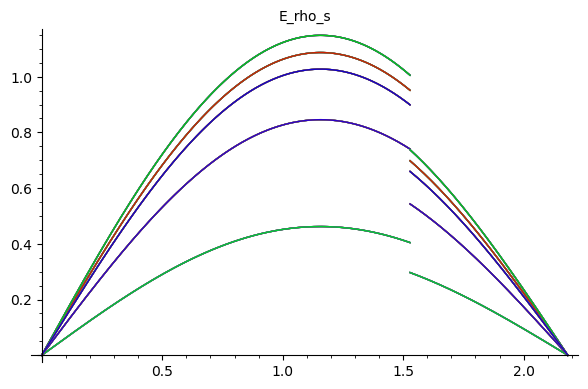

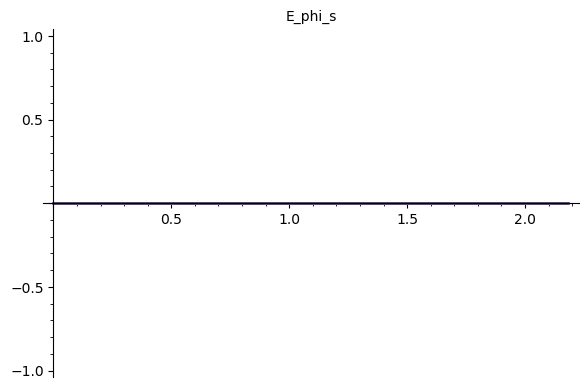

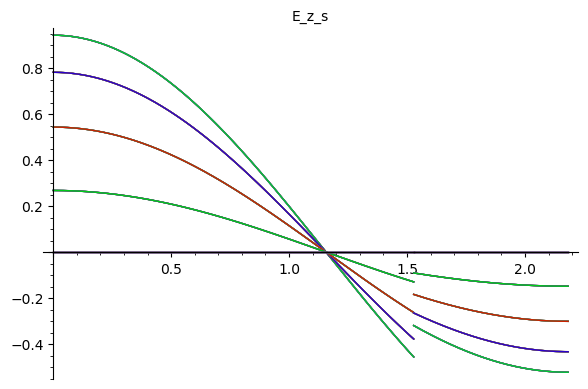

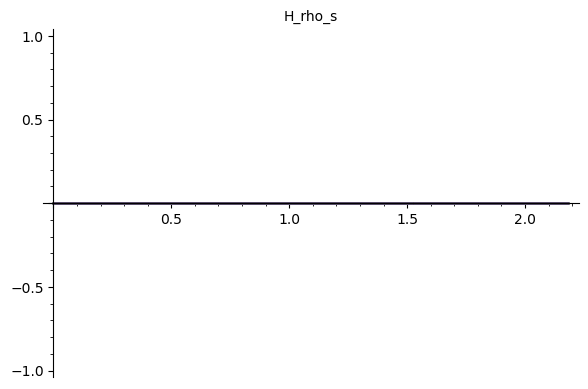

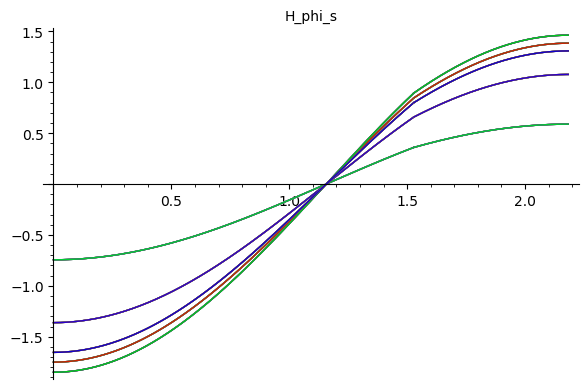

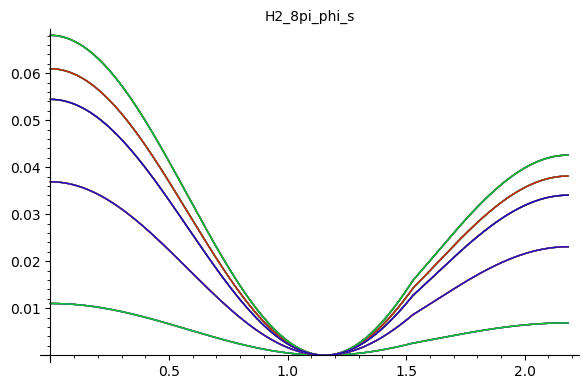

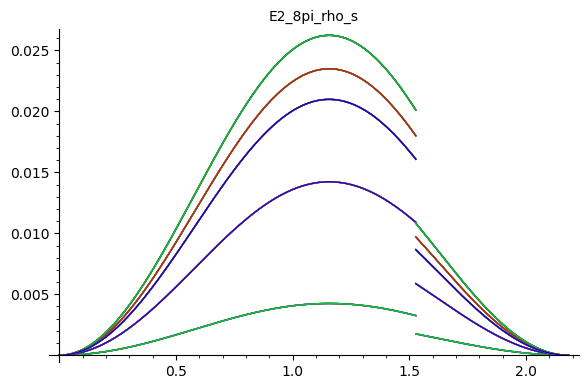


t_metal_dielectric_floor_sol -0.131250000000000*bessel_J(0, 0.480965111539155*rh)^2/pi

t_dielectric_metal_ceil_sol 0.0422278847934194*bessel_J(0, 0.480965111539155*rh)^2/pi

t_metal_dielectric_surf_sol -0.0890221152065806*bessel_J(0, 0.480965111539155*rh)^2/pi



{'f_surf': -5/6241*pi*(37.3873126241620*pi - 245.443378978583/pi),
 'p_metal': -0.0299529823939769*pi^2,
 'p_metal_up': 0.0500526544973484*pi^2,
 'p_metal_down': 0.0800056368913254*pi^2,
 'f_dielectric': 0.00313037102056194,
 'b_sol': 2.18329777055598,
 't_metal_dielectric': -0.199768232724282,
 't_metal_dielectric_floor': -0.294528842459180,
 't_dielectric_metal_ceil': 0.0947606097348983,
 't_dielectric': 0.00313037102056194,
 'p_dielectric': 0}

In [329]:
calc_f_surf(ra = a_val/2, g1 = 0.3, epsilon_rh_ph_0 = 2.2, epsilon_z_z_0 = 2.1, epsilon_rh_ph_1 = 2.2, epsilon_z_z_1 = 2.2, debug = True)

In [330]:
def plot_f_surf(ra, epsilon_rh_ph_0, epsilon_z_z_0, epsilon_rh_ph_1, epsilon_z_z_1):
    import numpy as np
    fs_a = [(g1, calc_f_surf(ra = ra, g1 = g1,
                             epsilon_rh_ph_0 = epsilon_rh_ph_0, epsilon_z_z_0 = epsilon_z_z_0,
                             epsilon_rh_ph_1 = epsilon_rh_ph_1, epsilon_z_z_1 = epsilon_z_z_1,
                             debug = False)) 
              for g1 in np.linspace(0.05, 0.95, 18)]
    #          for g1 in np.linspace(0.01, 0.99, 99)]
    
    fs_plt_f = []
    
    fs_plt_p_metal = []
    fs_plt_p_dielectric = []
    fs_plt_p_metal_plus_p_dielectric = []
    
    min_p_metal_plus_p_dielectric = +Infinity
    max_p_metal_plus_p_dielectric = -Infinity
    
    fs_plt_f_dielectric = []
    fs_plt_f_b = []
    
    fs_plt_t_metal_dielectric_z = []
    fs_plt_t_dielectric_metal_z = []
    fs_plt_t_metal_dielectric = []
  
    
    fs_plt_t_dielectric = []
    fs_plt_t_dielectric_plus_t_metal_dielectric = []
    
    min_t_dielectric_plus_t_metal_dielectric = +Infinity
    max_t_dielectric_plus_t_metal_dielectric = -Infinity

    for (g1,v) in fs_a:
        fs_plt_f                    += [(g1, v["f_surf"])]
        fs_plt_p_metal              += [(g1, v["p_metal"])]
        fs_plt_f_dielectric         += [(g1, v["f_dielectric"])]
        fs_plt_f_b                  += [(g1, v["b_sol"])]
        fs_plt_t_metal_dielectric   += [(g1, v["t_metal_dielectric"])]
        fs_plt_t_metal_dielectric_floor += [(g1, v["t_metal_dielectric_floor"])]
        fs_plt_t_dielectric_metal_ceil  += [(g1, v["t_dielectric_metal_ceil"])]
        fs_plt_t_dielectric         += [(g1, v["t_dielectric"])]
        fs_plt_p_dielectric         += [(g1, v["p_dielectric"])]
        
        p_metal_plus_p_dielectric = v["p_metal"] + v["p_dielectric"]
        fs_plt_p_metal_plus_p_dielectric += [(g1, p_metal_plus_p_dielectric)]
        
        if  min_p_metal_plus_p_dielectric > p_metal_plus_p_dielectric:
            min_p_metal_plus_p_dielectric = p_metal_plus_p_dielectric
            
        if  max_p_metal_plus_p_dielectric < p_metal_plus_p_dielectric:
            max_p_metal_plus_p_dielectric = p_metal_plus_p_dielectric
        
        t_dielectric_plus_t_metal_dielectric = v["t_dielectric"] + v["t_metal_dielectric"]
        fs_plt_t_dielectric_plus_t_metal_dielectric += [(g1, t_dielectric_plus_t_metal_dielectric)]
        
        if  min_t_dielectric_plus_t_metal_dielectric > t_dielectric_plus_t_metal_dielectric:
            min_t_dielectric_plus_t_metal_dielectric = t_dielectric_plus_t_metal_dielectric
            
        if  max_t_dielectric_plus_t_metal_dielectric < t_dielectric_plus_t_metal_dielectric:
            max_t_dielectric_plus_t_metal_dielectric = t_dielectric_plus_t_metal_dielectric
        
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_f)
    plt += plot(0, (x, 0, 1))
    plt.show (title="f")
    
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_p_metal)
    plt += plot(0, (x, 0, 1))
    plt.show (title="p_metal")
    
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_p_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="p_dielectric")
    
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_p_metal_plus_p_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="p_metal + p_dielectric"
             + str(min_p_metal_plus_p_dielectric.n()) + ".."
             + str(max_p_metal_plus_p_dielectric.n())
             )    

    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_t_metal_dielectric_floor)
    plt += plot(0, (x, 0, 1))
    plt.show (title="t_metal_dielectric_floor")

    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_t_dielectric_metal_ceil)
    plt += plot(0, (x, 0, 1))
    plt.show (title="t_dielectric_metal_ceil")

    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_t_metal_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="t_metal_dielectric")

    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_t_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="t_dielectric")
    
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_t_dielectric_plus_t_metal_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="t_dielectric + t_metal_dielectric "
              + str(min_t_dielectric_plus_t_metal_dielectric.n()) + ".."
              + str(max_t_dielectric_plus_t_metal_dielectric.n())
             )

    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_f_dielectric)
    plt += plot(0, (x, 0, 1))
    plt.show (title="fs_a_plt_f_dielectric")
    
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_plt_f_b)
    plt.show (title="fs_plt_f_b")
    
    return fs_a

In [331]:
plot_f_surf(ra=a_val/2, epsilon_rh_ph_0 = epsilon_rh_ph_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_rh_ph_d[1], epsilon_z_z_1 = epsilon_z_z_d[1])

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(1.32801572967967*b)*cos(0.0698955647199828*b) - sin(1.32801572967967*b)*sin(0.0698955647199828*b))*cos(2.28572082339852*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.0698955647199828*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(2.28572082339852*b) == -1.453235651

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(1.18000159262559*b)*cos(0.217909701774064*b) - sin(1.18000159262559*b)*sin(0.217909701774064*b))*cos(2.03096556134791*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.217909701774064*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(2.03096556134791*b) == -1.453235651465

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(1.03198745557151*b)*cos(0.365923838828145*b) - sin(1.03198745557151*b)*sin(0.365923838828145*b))*cos(1.77621029929730*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.365923838828145*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(1.77621029929730*b) == -1.453235651465

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(0.883973318517430*b)*cos(0.513937975882227*b) - sin(0.883973318517430*b)*sin(0.513937975882227*b))*cos(1.52145503724669*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.513937975882227*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(1.52145503724669*b) == -1.4532356514

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(0.735959181463349*b)*cos(0.661952112936308*b) - sin(0.735959181463349*b)*sin(0.661952112936308*b))*cos(1.26669977519608*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.661952112936308*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(1.26669977519608*b) == -1.4532356514

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(0.809966249990389*b)*cos(0.587945044409268*b) - sin(0.809966249990389*b)*sin(0.587945044409268*b))*cos(1.01194451314548*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.809966249990389*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(1.01194451314548*b) == -1.4532356514

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(0.957980387044471*b)*cos(0.439930907355186*b) - sin(0.957980387044471*b)*sin(0.439930907355186*b))*cos(0.757189251094866*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(0.957980387044471*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(0.757189251094866*b) == -1.45323565

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(1.10599452409855*b)*cos(0.291916770301105*b) - sin(1.10599452409855*b)*sin(0.291916770301105*b))*cos(0.502433989044257*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(1.10599452409855*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(0.502433989044257*b) == -1.45323565146

boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_0 == 0
boundary_conductor_i
C_z_1 == D_z_1*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1)
boundary_conductor_i
C_z_1 == 0.532732887825285*(cos(1.25400866115263*b)*cos(0.143902633247024*b) - sin(1.25400866115263*b)*sin(0.143902633247024*b))*cos(0.247678726993648*b)*sin(1.3979112943996568*b)/(cos(1.3979112943996568*b)*cos(1.25400866115263*b))

bc_i
1/2*D_z_0*epsilon_z_z_0*k_0*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/(epsilon_rh_ph_0*k_0^2 - epsilon_z_z_0*k_0^2 + epsilon_rh_ph_0*kappa^2) == -1/2*(D_z_1*cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - D_z_1*sin(h_0*k_1))*epsilon_z_z_1*k_1*kappa*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(epsilon_rh_ph_1*k_1^2 - epsilon_z_z_1*k_1^2 + epsilon_rh_ph_1*kappa^2)

bci
0.403102877294005*(bessel_J(1, 0.480965111539155*rho) - bessel_J(-1, 0.480965111539155*rho))*sin(0.247678726993648*b) == -1.45323565146

UnboundLocalError: local variable 'fs_plt_t_metal_dielectric_floor' referenced before assignment

In [ ]:
if False == E_mode:
    fs_a_250 = [(g1, calc_f_surf(ra = rh, g1 = g1, epsilon_rh_ph_0 = epsilon_rh_ph_d[0], epsilon_z_z_0 = epsilon_z_z_d[0], epsilon_rh_ph_1 = epsilon_rh_ph_d[1], epsilon_z_z_1 = epsilon_z_z_d[1])) 
                for g1 in np.linspace(0.0001, 0.0250, 250) 
                for rh in [int(a_val/2)]]
    fs_a_250_plt_f   = []
    fs_a_250_plt_f_H = []
    fs_a_250_plt_f_E = []
    fs_a_250_plt_f_b = []
    for (g1,v) in fs_a_2:
        fs_a_250_plt_f   += [(g1, v[0])]
        fs_a_250_plt_f_H += [(g1, v[2])]
        fs_a_250_plt_f_E += [(g1, v[5])]
        fs_a_250_plt_f_b += [(g1, v[6])]

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f)
    plt.show ()

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f[170:190])
    plt.show ()

In [ ]:
if False == E_mode:
    plt = sage.plot.graphics.Graphics()
    plt += list_plot (fs_a_250_plt_f[40:130])
    plt.show ()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
if True == E_mode:
    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
else:
    ga_linspace = np.linspace(0.001, 0.250, 250)

epsilon0_linspace = np.linspace(1, 2*epsilon_d[0].n(), 12)

ga_list = ga_linspace.tolist()
epsilon0_list = epsilon0_linspace.tolist()

ga_grid,epsilon0_grid = np.meshgrid(ga_linspace, epsilon0_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep0 in np.arange(0, len(epsilon0_linspace), 1):
        Ga = ga_list[ig]
        Ep0 = epsilon0_list[iep0]
        u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = epsilon_d[1], g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon0_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
ax.plot_surface(ga_grid,epsilon0_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ga_linspace = np.linspace(0.05, 0.95, 18)
#if True == E_mode:
#    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
#else:
#    ga_linspace = np.linspace(0.001, 0.250, 250)

#epsilon1_linspace = np.linspace(1, 2*epsilon_d[1].n(), 2*12)
epsilon1_linspace = np.linspace(1, 4.0, 12)

ga_list = ga_linspace.tolist()
epsilon1_list = epsilon1_linspace.tolist()

ga_grid,epsilon1_grid = np.meshgrid(ga_linspace, epsilon1_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep1 in np.arange(0, len(epsilon1_linspace), 1):
        Ga = ga_list[ig]
        Ep1 = epsilon1_list[iep1]
        u[iep1][ig] = calc_f_surf(ra=a_val/2, epsilon0 = epsilon_d[0], epsilon1 = Ep1, g1=Ga)[0]
        #u[iep1][ig] = calc_f_surf(ra=a_val/2, epsilon0 = 2.0, epsilon1 = Ep1, g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon1_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_1')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_1')
ax.plot_surface(ga_grid,epsilon1_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ga_linspace = np.linspace(0.05, 0.95, 18)
#if True == E_mode:
#    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
#else:
#    ga_linspace = np.linspace(0.001, 0.250, 250)

#epsilon0_linspace = np.linspace(1.0, 2.0*epsilon_d[0].n(), 2*12)
epsilon0_linspace = np.linspace(1.0, 4.0, 12)

ga_list = ga_linspace.tolist()
epsilon0_list = epsilon0_linspace.tolist()

ga_grid,epsilon0_grid = np.meshgrid(ga_linspace, epsilon0_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for iep0 in np.arange(0, len(epsilon0_linspace), 1):
        Ga = ga_list[ig]
        Ep0 = epsilon0_list[iep0]
        u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = epsilon_d[1], g1=Ga)[0]
        #u[iep0][ig] = calc_f_surf(ra=a_val/2, epsilon0 = Ep0, epsilon1 = 2.0, g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,epsilon0_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('epsilon_0')
ax.plot_surface(ga_grid,epsilon0_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#ga_linspace = np.linspace(0.01, 0.99, 99)
ga_linspace = np.linspace(0.05, 0.95, 18)
#if True == E_mode:
#    ga_linspace = np.linspace(0.58, 0.63, 63-58+1)
#else:
#    ga_linspace = np.linspace(0.001, 0.250, 250)

ra_linspace = np.linspace(1, a_val, 12)

ga_list = ga_linspace.tolist()
ra_list = ra_linspace.tolist()

ga_grid,ra_grid = np.meshgrid(ga_linspace, ra_linspace)

u = ga_grid * np.nan
v = ga_grid * np.nan

for ig in np.arange(0, len(ga_linspace), 1):
    for ir in np.arange(0, len(ra_linspace), 1):
        Ga = ga_list[ig]
        Ra = ra_list[ir]
        u[ir][ig] = calc_f_surf(ra=Ra, epsilon0 = epsilon_d[0], epsilon1 = epsilon_d[1], g1=Ga)[0]

In [ ]:
fig,ax=plt.subplots(1,1)

cp = ax.contourf(ga_grid,ra_grid, u)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
plt.show()

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('g')
ax.set_ylabel('r (cm)')
ax.plot_surface(ga_grid,ra_grid, u, cmap='viridis', edgecolor='none')
ax.set_title('f_surf_sol_diff_g_1_rh_int_ph_sa0')
plt.show()

In [ ]:
g_values = []

if 1 < n_layers:
    if True == E_mode:
        #g_values += [g[1] == 0.620]
        #g_values += [g[1] == 0.95]
        g_values += [g[1] == 0.05]
    else:
        g_values += [g[1] == 0.018]
    
#if 2 < n_layers:
#    g_values += [g[2] == 0.05]


In [ ]:
disp_eq_b

In [ ]:
disp_eq_b_d

In [ ]:
disp_eq_b_s = disp_eq_b_d.subs(g_values)
disp_eq_b_s

In [ ]:
disp_eq_brakes = [0]
for operand in disp_eq_b_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print("operand2", operand2)
            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
            operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, 10*lambda_d)
            operand_denominator_roots.sort()
            print("operand_denominator_roots", operand_denominator_roots)
            #disp_eq_brakes += operand_denominator_roots
            for rt in operand_denominator_roots:
                if rt not in disp_eq_brakes:
                    disp_eq_brakes += [rt]
            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            #    M_det_num_factor_operands += (operand,)
            print ("")
    else:
        print("operand_denominator", operand_denominator)
        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
        operand_denominator_roots = find_root_recursive(operand_denominator, lambda_d/32, 10*lambda_d)
        operand_denominator_roots.sort()
        print("operand_denominator_roots", operand_denominator_roots)
        #disp_eq_brakes += operand_denominator_roots
        for rt in operand_denominator_roots:
            if rt not in disp_eq_brakes:
                disp_eq_brakes += [rt]
        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
        #    M_det_num_factor_operands += (operand,)
        print ("")       

disp_eq_brakes.sort()

In [ ]:
disp_eq_brakes

In [ ]:
plt = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
plt += plot(disp_eq_b_s.lhs(), xeps, disp_eq_brakes[0])
disp_eq_brakes_plot_range = min(len(disp_eq_brakes), 7)
for i in range(disp_eq_brakes_plot_range-1):
    plt += plot (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(disp_eq_brakes_plot_range):
    plt += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

plt.show()

In [ ]:
b_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        b_lst += find_root_recursive (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
b_lst.sort()

In [ ]:
b_lst 

In [ ]:
b_lst, h_val

In [ ]:
b_sol = b_lst[h_val]

In [ ]:
b_sol, h_val

In [ ]:
disp_eq_b_s.subs(b == b_sol)

In [ ]:
b_sol = find_newton_root(f = disp_eq_b_s.lhs(), x = b, xn = b_sol)

In [ ]:
disp_eq_b_s.subs(b == b_sol)

In [ ]:
h_s = []
for i in range(n_layers):
    h_s += [b_s[i].subs(digit_values).subs(b == b_sol).subs(g_values)]
    
h_s

In [ ]:
h_sol = [0]
for i in range(n_layers):
    h_sol += [h_sol[i] + h_s[i].rhs()]
h_sol

In [ ]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda r,p,z, a0, i=i: E_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda r,p,z, a0, i=i: E_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda r,p,z, a0, i=i: E_z_s[i](r,p,z)
                .subs(digit_values)
                .subs(epsilon_values)
                .subs(g_values)
                .subs(b == b_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
               ]

In [ ]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda r,p,z, a0, i=i: H_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda r,p,z, a0, i=i: H_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda r,p,z, a0, i=i: H_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
display(Math(latex(E_rho_s [1](rho,ph,z))))

In [ ]:
[E_rho_s [0](rho,ph,z,1) for rho in [1..int(a_val)]]

In [ ]:
if E_mode:
    print([E_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

In [ ]:
[H_rho_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

In [ ]:
[H_phi_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]]

In [ ]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [1..int(a_val)]])

In [ ]:
digit_values

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
if E_mode:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1).imag_part(),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1).imag_part()),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()
else:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1)),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()

In [ ]:
if E_mode:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()
else:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1),
        name='H1')

    print(H1.display())
    #H1.plot()


In [ ]:
def get_integrand_view(f):
    return f(x)

#class my_dummy_integral:
#    f = None
#    a = None
#    b = None
#    def __init__(self, f, a, b):
#        print ("my_dummy_integral ", f, a, b)
#        self.f = f
#        self.a = a
#        self.b = b

def num_int(f, a, b):
    from scipy import integrate
    
    #try:
    #    print ("integrand = ", get_integrand_view(f))
    #except Exception as ex1:
    #    print ("Exception ex1 = ", ex1)
    #print ("a, b = ", a, b)
    
    #to_call_integration = True

    #if type(f) is my_dummy_integral:
    #    to_call_integration = False

    #import inspect
    #stack = inspect.stack()
    #for frame in stack:
    #    func_name = frame[3]
    #    #print ("func_name = ", func_name)
    #    if ('get_integrand_view' == func_name):
    #        to_call_integration = False
    #        break;

    #if not to_call_integration:
    #    return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a, b = ", a, b)

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
            #if ('get_integrand_view' == func_name):
                #to_call_integration = False
                #break;

        
        raise ex

In [ ]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda r,p,z, a0, i=i: E2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda r,p,z, a0, i=i: E2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda r,p,z, a0, i=i: E2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
D2_8pi_z_sol = []
for i in range(n_layers):
    D2_8pi_z_sol += [lambda r,p,z, a0, i=i: D2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
E2_8pi_rho_sol[0](r,p,z, a0)

In [ ]:
E2_8pi_phi_sol[0](r,p,z, a0)

In [ ]:
E2_8pi_z_sol[0](r,p,z, a0)

In [ ]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_rho_sol[i](r,p,z, a0) * r]

In [ ]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_phi_sol[i](r,p,z, a0) * r]

In [ ]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_z_sol[i](r,p,z, a0) * r]

In [ ]:
D2_8pi_z_sol_rh = []
for i in range(n_layers):
    D2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: D2_8pi_z_sol[i](r,p,z, a0) * r]

In [ ]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

In [ ]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

In [ ]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

In [ ]:
E2_8pi_rho_sol_rh[1](r,p,z, a0)

In [ ]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

In [ ]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
[E2_8pi_phi_sol_rh_int_ph [0](r,h_sol[1], 1) for r in [1..int(a_val)]]

In [ ]:
if 1 < n_layers:
    print([E2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[1], 1) for rho in [1..int(a_val)]])

In [ ]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
D2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    D2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : D2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]])

In [ ]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)])
            for rho in [1..int(a_val)] ])
plt.show ()

In [ ]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
D2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    D2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : D2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
p_dielectric_surf_rho = []
for i in range(n_layers - 1):
    p_dielectric_surf_rho += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, h_sol[i+1], 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [ ]:
p_dielectric_surf_phi = []
for i in range(n_layers - 1):
    p_dielectric_surf_phi += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [ ]:
f_dielectric_surf_z = []
t_dielectric_surf_z = []
for i in range(n_layers - 1):
    epsilon_d[i]*E_z_sol[i](rh,ph,z,1)
    f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1])*E2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i+1]/epsilon_d[i])*E2_8pi_z_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]
    
    t_dielectric_surf_z += [(1/epsilon_d[i]-1/epsilon_d[i+1])*D2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]


In [ ]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol[1], 1))

In [ ]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[1], 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[2], 1))

In [ ]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda r,p,z, a0, i=i: H2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda r,p,z, a0, i=i: H2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda r,p,z, a0, i=i: H2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

In [ ]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

In [ ]:
H2_8pi_z_sol[0](rh,ph,z, a0)

In [ ]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(1.0-epsilon_d[0]) * 
            (E2_8pi_rho_sol[0](rh,ph,h_sol[0],1) + 
             E2_8pi_phi_sol[0](rh,ph,h_sol[0],1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))

plt += plot ([(epsilon_d[n_layers - 1] - 1.0) * 
            (E2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             E2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1)
            ).subs(rh == rho, ph == phi)  for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_rho_sol[i](r,p,z, a0) * r]

In [ ]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_phi_sol[i](r,p,z, a0) * r]

In [ ]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_z_sol[i](r,p,z, a0) * r]

In [ ]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

In [ ]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

In [ ]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,z,1)

In [ ]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,0,1) - H2_8pi_phi_sol_rh[0](rh,ph,b_sol,1)

In [ ]:
plot(H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) - H2_8pi_phi_sol_rh[0](rh,ph,0,1),(rh,0,a_val))

In [ ]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            .subs(rh == rho, ph == phi) for phi in [0 .. 2*pi]],(rho, 0, a_val))
plt.show ()

In [ ]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

In [ ]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

In [ ]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

In [ ]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

In [ ]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [1..int(a_val)]]

In [ ]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [1..int(a_val)]])

In [ ]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,b_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon_d[i]-epsilon_d[i+1]) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)]))
    for rho in [1..int(a_val)] ])
plt.show ()

In [ ]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

In [ ]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

In [ ]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

In [ ]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_rho

In [ ]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_phi

In [ ]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_z

In [ ]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [ ]:
surf_f_z

In [ ]:
f_dielectric_surf_rho

In [ ]:
f_dielectric_surf_phi

In [ ]:
f_dielectric_surf_z

In [ ]:
f_dielectric_surf = 0
print(f_dielectric_surf)
for i in range(n_layers - 1):
    f_dielectric_surf += f_dielectric_surf_rho[i] + f_dielectric_surf_phi[i] + f_dielectric_surf_z[i]
    print(f_dielectric_surf)

In [ ]:
sum_surf_f_z = surf_f_z + f_dielectric_surf

In [ ]:
sum_surf_f_z

In [ ]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon_d[i] * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i], h_sol[i+1], 1)]

In [ ]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

In [ ]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon_d[i] * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

In [ ]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon_d[i] * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

In [ ]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu_d[i] * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

In [ ]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu_d[i] * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

In [ ]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu_d[i] * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

In [ ]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

In [ ]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [ ]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [ ]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda r,p,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re(E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im(E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re(E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im(E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [ ]:
print(Abraham_Minkovsky_f_z[0](rh, ph, z))

In [ ]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

In [ ]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z).expand())))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z).expand())))

In [ ]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda r,p,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re(E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im(E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re(E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im(E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [ ]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

In [ ]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z).expand())))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z).expand())))

In [ ]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [ ]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [ ]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

In [ ]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [ ]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

In [ ]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

In [ ]:
calc_Abraham_force = False

In [ ]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda r,p,z, a0, i=i: Abraham_f_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [ ]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [1..int(a_val)]]

In [ ]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [1..int(a_val)]]

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

In [ ]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

In [ ]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

In [ ]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

In [ ]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda r,p,z, a0, i=i: Abraham_f_z_sol[i](r,p,z, a0) * r]

In [ ]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho).subs(ph == phi) for rho in [1..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [ ]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda r,z,a0, i=i: 
                                  num_int(
                                      lambda p : Abraham_f_z_sol_rh[i](r,p,z,a0), 
                                      0, 2*pi)
                                 ]

In [ ]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : Abraham_f_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [ ]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [ ]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [ ]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [ ]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [ ]:
#Abraham_f_z_0 + Abraham_f_z_1

In [ ]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [ ]:
sum_f_z

In [ ]:
sum_f_z / (field_energy)

In [ ]:
S = pi.n() * a_val^2
S

In [ ]:
V = b_sol * S
V

In [ ]:
h_sol

In [ ]:
# мкм
b_sol*10*1000 

In [ ]:
field_energy

In [ ]:
# эрг / куб см
(field_energy)/V

In [ ]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

https://iopscience.iop.org/article/10.1088/1367-2630/18/5/053042

A uniform electric field $E={10}^{6}$ V m−1 along the $z$ direction is applied. This electric field corresponds to an average laser intensity of ${I}_{0}=1.33\ \mathrm{mW}\;\mu {{\rm{m}}}^{-2}$ as used under typical experiment conditions

In [ ]:
# 1.33 мВт / 1 мкм^2
# 1.33 * 10^4 эрг в сек / 0.0001 см
w = (1.33 * 10^4 /(0.0001^2*c)).subs(c_value)
w # эрг в куб см

In [ ]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

In [ ]:
# Ньютон
F_z / 10^5

In [ ]:
# gramm
F_z / 10^5 *101

In [ ]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

In [ ]:
omega_value[0].rhs().n()

In [ ]:
# число ячеек в #сантиметре
nLayers_per_sm = 1/(15e-06 + b_sol)
nLayers_per_sm

In [ ]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

In [ ]:
# кг / см толщины
1.0/(15e-06 + b_sol) * F_z / 10^5 *101/1000